In [1]:
%load_ext autoreload
%autoreload 2
# this only works on startup!
from jax import config
config.update("jax_enable_x64", True)

import os
os.environ["CUDA_DEVICE_ORDER"] = "PCI_BUS_ID" 
os.environ["CUDA_VISIBLE_DEVICES"] = '2'

from encoding_information.gpu_utils import limit_gpu_memory_growth
limit_gpu_memory_growth()

from cleanplots import *
from tqdm import tqdm
from encoding_information.information_estimation import *
from encoding_information.image_utils import *
from encoding_information.models.gaussian_process import *


from encoding_information.bsccm_utils import *
from bsccm import BSCCM
from jax import jit
import numpy as onp
import jax.numpy as np

bsccm = BSCCM('/home/hpinkard_waller/data/BSCCM/')

2023-11-13 19:59:50.620181: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Opening BSCCM
Opened BSCCM


## Do the entropy estimators give correct values for gaussian processes

In [2]:
# Generate a ground truth covariance matrix for each channel, and then noiseless samples from it
from encoding_information.models.gaussian_process import StationaryGaussianProcess

num_images = 10000
num_patches = 10000
# num_images = 1000
# num_patches = 1000
edge_crop = 24

patch_size = 15

channel = 'LED119'


images = load_bsccm_images(bsccm, channel=channel, num_images=num_images, edge_crop=edge_crop, median_filter=False)
patches = extract_patches(images, patch_size, num_patches=num_patches)

cov_mat = estimate_full_cov_mat(patches)
gp = StationaryGaussianProcess(patches)
gp.fit(patches)
true_cov_mat_px = gp.get_cov_mat()
true_mean_px = np.mean(images)
samples = gp.generate_samples(num_samples=num_patches, sample_shape=patch_size, ensure_nonnegative=True)

2023-11-13 20:03:45.893940: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.


Initial validation NLL: 12877.00


Epoch 1: 100%|████████████████████████████████████████████████| 1/1 [00:05<00:00,  5.40s/it]


Epoch 1: validation NLL: 8849.95


Epoch 2: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.51it/s]


Epoch 2: validation NLL: 4.97


Epoch 3: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 37.93it/s]


Epoch 3: validation NLL: 4.93


Epoch 4: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.65it/s]


Epoch 4: validation NLL: 4.92


Epoch 5: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.24it/s]


Epoch 5: validation NLL: 4.92


Epoch 6: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 41.44it/s]


Epoch 6: validation NLL: 4.91


Epoch 7: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.66it/s]


Epoch 7: validation NLL: 4.91


Epoch 8: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.47it/s]


Epoch 8: validation NLL: 4.91


Epoch 9: 100%|████████████████████████████████████████████████| 1/1 [00:00<00:00, 40.90it/s]


Epoch 9: validation NLL: 4.91


Epoch 10: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.68it/s]


Epoch 10: validation NLL: 4.91


Epoch 11: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.94it/s]


Epoch 11: validation NLL: 4.91


Epoch 12: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.02it/s]


Epoch 12: validation NLL: 4.91


Epoch 13: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.71it/s]


Epoch 13: validation NLL: 4.91


Epoch 14: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.28it/s]


Epoch 14: validation NLL: 4.91


Epoch 15: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.14it/s]


Epoch 15: validation NLL: 4.91


Epoch 16: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.02it/s]


Epoch 16: validation NLL: 4.91


Epoch 17: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.71it/s]


Epoch 17: validation NLL: 4.91


Epoch 18: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.27it/s]


Epoch 18: validation NLL: 4.91


Epoch 19: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.15it/s]


Epoch 19: validation NLL: 4.91


Epoch 20: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 33.37it/s]


Epoch 20: validation NLL: 4.91


Epoch 21: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.74it/s]


Epoch 21: validation NLL: 4.91


Epoch 22: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.63it/s]


Epoch 22: validation NLL: 4.91


Epoch 23: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.36it/s]


Epoch 23: validation NLL: 4.91


Epoch 24: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.10it/s]


Epoch 24: validation NLL: 4.91


Epoch 25: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.47it/s]


Epoch 25: validation NLL: 4.91


Epoch 26: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.79it/s]


Epoch 26: validation NLL: 4.91


Epoch 27: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.29it/s]


Epoch 27: validation NLL: 4.91


Epoch 28: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.33it/s]


Epoch 28: validation NLL: 4.91


Epoch 29: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.96it/s]


Epoch 29: validation NLL: 4.91


Epoch 30: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 37.02it/s]


Epoch 30: validation NLL: 4.91


Epoch 31: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.99it/s]


Epoch 31: validation NLL: 4.91


Epoch 32: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.99it/s]


Epoch 32: validation NLL: 4.91


Epoch 33: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.73it/s]


Epoch 33: validation NLL: 4.91


Epoch 34: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.98it/s]


Epoch 34: validation NLL: 4.91


Epoch 35: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.28it/s]


Epoch 35: validation NLL: 4.91


Epoch 36: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.67it/s]


Epoch 36: validation NLL: 4.91


Epoch 37: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.77it/s]


Epoch 37: validation NLL: 4.91


Epoch 38: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.10it/s]


Epoch 38: validation NLL: 4.91


Epoch 39: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.93it/s]


Epoch 39: validation NLL: 4.91


Epoch 40: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.89it/s]


Epoch 40: validation NLL: 4.91


Epoch 41: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.53it/s]


Epoch 41: validation NLL: 4.91


Epoch 42: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.57it/s]


Epoch 42: validation NLL: 4.91


Epoch 43: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.18it/s]


Epoch 43: validation NLL: 4.91


Epoch 44: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 38.98it/s]


Epoch 44: validation NLL: 4.91


Epoch 45: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.01it/s]


Epoch 45: validation NLL: 4.91


Epoch 46: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.79it/s]


Epoch 46: validation NLL: 4.91


Epoch 47: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.42it/s]


Epoch 47: validation NLL: 4.91


Epoch 48: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.44it/s]


Epoch 48: validation NLL: 4.91


Epoch 49: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.07it/s]


Epoch 49: validation NLL: 4.91


Epoch 50: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.26it/s]


Epoch 50: validation NLL: 4.91


Epoch 51: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.60it/s]


Epoch 51: validation NLL: 4.91


Epoch 52: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.02it/s]


Epoch 52: validation NLL: 4.91


Epoch 53: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 40.94it/s]


Epoch 53: validation NLL: 4.91


Epoch 54: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.22it/s]


Epoch 54: validation NLL: 4.91


Epoch 55: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.30it/s]


Epoch 55: validation NLL: 4.91


Epoch 56: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.15it/s]


Epoch 56: validation NLL: 4.91


Epoch 57: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.03it/s]


Epoch 57: validation NLL: 4.91


Epoch 58: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 39.39it/s]


Epoch 58: validation NLL: 4.91


Epoch 59: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 41.32it/s]


Epoch 59: validation NLL: 4.91


Epoch 60: 100%|███████████████████████████████████████████████| 1/1 [00:00<00:00, 32.18it/s]


Epoch 60: validation NLL: 4.91


### Verify that entrpoy and mutual information estimates are consistent: they converge to the correct value given enough samples
Of course, this is on data that is sampled form a stationary gaussian process, so its only really showing that the gaussian approximation estimator can estimate gaussian entropy and MI. 


This all uses additive gaussian noise, which has an easy analytic formula for h(y | x)

In [3]:
from encoding_information.models.gaussian_process import gaussian_likelihood, nll_per_pixel_from_cov_mat
from encoding_information.models.pixel_cnn import PixelCNN

# num_samples_to_use = np.array([10, 40, 160,]).astype(int)
num_bootstrap_samples = 80

# num_samples_to_use = np.array([10, 40, 160, 640, 2560, 10240]).astype(int)
num_samples_to_use = np.array([10, 20, 40, 80, 160, 320, 640, 1280, 2560]).astype(int)


gaussian_sigma = 50
confidence_interval = 90


def gaussian_entropy_estimate(data, stationary=False, eigenvalue_floor=1e-1, optimize=True):
    num_train = int(max(2, min(1000, 0.1 * data.shape[0])))
    train_data = data[:num_train]
    test_data = data[num_train:]
    if stationary:
        gp = StationaryGaussianProcess(train_data, eigenvalue_floor=eigenvalue_floor)
        if optimize:
            num_val_samples = max(1, min(1000, 0.1 * train_data.shape[0]))
            gp.fit(train_data, num_val_samples=num_val_samples, patience=50, max_epochs=100, verbose=False)
        nll_per_pixel = gp.compute_negative_log_likelihood(test_data, verbose=False)
        
    else:
        cov_mat = estimate_full_cov_mat(train_data)
        cov_mat = make_positive_definite(cov_mat, eigenvalue_floor=eigenvalue_floor)
        nll_per_pixel = nll_per_pixel_from_cov_mat(cov_mat, train_data.mean(axis=0).reshape(-1), train_data, np.prod(onp.array(test_data.shape)[1:]))
    return nll_per_pixel

def pixelcnn_entropy_estimate(data):
    num_train = int(max(2, min(1000, 0.1 * data.shape[0])))
    num_val_samples = int(max(1, min(1000, 0.1 * num_train)))
    train_data = data[:num_train]
    test_data = data[num_train:]
    model = PixelCNN()
    model.fit(train_data, num_val_samples=num_val_samples, max_epochs=25, verbose=False)
    nll_per_pixel = model.compute_negative_log_likelihood(test_data)
    return nll_per_pixel


h_x_analytic = analytic_multivariate_gaussian_entropy(true_cov_mat_px) 
true_cov_mat_py = true_cov_mat_px + gaussian_sigma**2 * np.eye(patch_size**2)
h_y_analytic = analytic_multivariate_gaussian_entropy(true_cov_mat_py) 
# Constant conditional entropy for Gaussian noise
h_y_given_x_analytic = analytic_multivariate_gaussian_entropy(np.eye(patch_size**2) * gaussian_sigma**2) 
mi_analytic_per_pixel = (h_y_analytic - h_y_given_x_analytic) / np.log(2)

noisy_samples = add_noise(samples, gaussian_sigma=gaussian_sigma, ensure_positive=True)


full_cov_h_y_estimates_mean = []
full_cov_h_y_estimates_conf_int = []
stationary_h_y_estimates_mean = []
stationary_h_y_estimates_conf_int = []
stationary_h_y_estimates_optimized_mean = []
stationary_h_y_estimates_optimized_conf_int = []
pixelcnn_h_y_estimates_mean = []
pixelcnn_h_y_estimates_conf_int = []


h_y_given_x_estimates_mean = []
h_y_given_x_estimates_conf_int = []


ev_floor = 1e-1
for num_to_use in tqdm(num_samples_to_use):
    # check for a cached version of this
    # create cache folder if it doesn't exist
    if not os.path.exists('.cache'):
        os.mkdir('.cache')
    if os.path.exists('.cache/entropy_estimates_{}_cache_{}_samples.npz'.format(channel, num_to_use)):
        print('loading cached version of entropy estimates')
        loaded = onp.load('.cache/entropy_estimates_{}_cache_{}_samples.npz'.format(channel, num_to_use))
        # append to the list of estimates
        full_cov_h_y_estimates_conf_int.append(loaded['full_cov_h_y_estimates_conf_int'])
        full_cov_h_y_estimates_mean.append(loaded['full_cov_h_y_estimates_mean'])
        stationary_h_y_estimates_conf_int.append(loaded['stationary_h_y_estimates_conf_int'])
        stationary_h_y_estimates_mean.append(loaded['stationary_h_y_estimates_mean'])
        stationary_h_y_estimates_optimized_conf_int.append(loaded['stationary_h_y_estimates_optimized_conf_int'])
        stationary_h_y_estimates_optimized_mean.append(loaded['stationary_h_y_estimates_optimized_mean'])
        pixelcnn_h_y_estimates_conf_int.append(loaded['pixelcnn_h_y_estimates_conf_int'])
        pixelcnn_h_y_estimates_mean.append(loaded['pixelcnn_h_y_estimates_mean'])
        h_y_given_x_estimates_conf_int.append(loaded['h_y_given_x_estimates_conf_int'])
        h_y_given_x_estimates_mean.append(loaded['h_y_given_x_estimates_mean'])
    else:

        print(f'Computing with {num_to_use} samples')

        print('full covariance gp')
        mean, conf_int = run_bootstrap(noisy_samples[:num_to_use], num_bootstrap_samples=num_bootstrap_samples, estimation_fn=
                        lambda data: gaussian_entropy_estimate(data, stationary=False, eigenvalue_floor=ev_floor, ), confidence_interval=confidence_interval, verbose=True )
        full_cov_h_y_estimates_mean.append(mean)
        full_cov_h_y_estimates_conf_int.append(conf_int)

        print('stationary gp')
        mean, conf_int = run_bootstrap(noisy_samples[:num_to_use], num_bootstrap_samples=num_bootstrap_samples, estimation_fn=
                        lambda data: gaussian_entropy_estimate(data, stationary=True, eigenvalue_floor=ev_floor, optimize=False), confidence_interval=confidence_interval, verbose=True)
        stationary_h_y_estimates_mean.append(mean)
        stationary_h_y_estimates_conf_int.append(conf_int)

        print('optimized stationary gp')
        mean, conf_int = run_bootstrap(noisy_samples[:num_to_use], num_bootstrap_samples=num_bootstrap_samples, estimation_fn=
                        lambda data: gaussian_entropy_estimate(data, stationary=True, eigenvalue_floor=ev_floor, optimize=True), confidence_interval=confidence_interval, verbose=True )
        stationary_h_y_estimates_optimized_mean.append(mean)
        stationary_h_y_estimates_optimized_conf_int.append(conf_int)

        print('pixelcnn')
        mean, conf_int = run_bootstrap(noisy_samples[:num_to_use], num_bootstrap_samples=num_bootstrap_samples, estimation_fn=
                        lambda data: pixelcnn_entropy_estimate(data), confidence_interval=confidence_interval, verbose=True )
        pixelcnn_h_y_estimates_mean.append(mean)
        pixelcnn_h_y_estimates_conf_int.append(conf_int)


        # estimate conditional entropy
        mean, conf_int = run_bootstrap(samples[:num_to_use], num_bootstrap_samples=num_bootstrap_samples, estimation_fn=
                        lambda data: estimate_conditional_entropy(data), confidence_interval=confidence_interval, verbose=True )
        h_y_given_x_estimates_mean.append(mean)
        h_y_given_x_estimates_conf_int.append(conf_int)


        # save all these results to a numpy file
        onp.savez('.cache/entropy_estimates_{}_cache_{}_samples'.format(channel, num_to_use),
                    full_cov_h_y_estimates_conf_int=onp.array(full_cov_h_y_estimates_conf_int[-1]),
                    full_cov_h_y_estimates_mean=onp.array(full_cov_h_y_estimates_mean[-1]),
                    stationary_h_y_estimates_conf_int=onp.array(stationary_h_y_estimates_conf_int[-1]),
                    stationary_h_y_estimates_mean=onp.array(stationary_h_y_estimates_mean[-1]),
                    stationary_h_y_estimates_optimized_conf_int=onp.array(stationary_h_y_estimates_optimized_conf_int[-1]),
                    stationary_h_y_estimates_optimized_mean=onp.array(stationary_h_y_estimates_optimized_mean[-1]),
                    pixelcnn_h_y_estimates_conf_int=onp.array(pixelcnn_h_y_estimates_conf_int[-1]),
                    pixelcnn_h_y_estimates_mean=onp.array(pixelcnn_h_y_estimates_mean[-1]),
                    h_y_given_x_estimates_conf_int=onp.array(h_y_given_x_estimates_conf_int[-1]),
                    h_y_given_x_estimates_mean=onp.array(h_y_given_x_estimates_mean[-1]),
                    )
                

full_cov_h_y_estimates_conf_int = np.array(full_cov_h_y_estimates_conf_int)
full_cov_h_y_estimates_mean = np.array(full_cov_h_y_estimates_mean)
stationary_h_y_estimates_conf_int = np.array(stationary_h_y_estimates_conf_int)
stationary_h_y_estimates_mean = np.array(stationary_h_y_estimates_mean)
stationary_h_y_estimates_optimized_conf_int = np.array(stationary_h_y_estimates_optimized_conf_int)
stationary_h_y_estimates_optimized_mean = np.array(stationary_h_y_estimates_optimized_mean)

pixelcnn_h_y_estimates_conf_int = np.array(pixelcnn_h_y_estimates_conf_int)
pixelcnn_h_y_estimates_mean = np.array(pixelcnn_h_y_estimates_mean)

h_y_given_x_estimates_conf_int = np.array(h_y_given_x_estimates_conf_int)
h_y_given_x_estimates_mean = np.array(h_y_given_x_estimates_mean)


 11%|██████▎                                                  | 1/9 [00:00<00:00,  9.63it/s]

loading cached version of entropy estimates
Computing with 20 samples
full covariance gp



Running bootstraps:   0%|                                            | 0/80 [00:00<?, ?it/s]

key [1830438845 1611391688] 




Running bootstraps:   6%|██▎                                 | 5/80 [00:02<00:23,  3.14it/s]

key [2654345006 1621413270] 

key [2017866598 3978318812] 

key [ 551609575 1027887063] 

key [ 982203983 1166433049] 

key [1015808869 1265718690] 

key [2808876272 3687045762] 

key [ 861656195 3480052425] 

key [3906340372 2746338112] 




Running bootstraps:  16%|█████▋                             | 13/80 [00:02<00:06,  9.94it/s]

key [3252575941 2775476625] 

key [1262187916 3567742726] 

key [2928161509 3773866222] 

key [2480494507 2719906077] 

key [ 221563110 3032194297] 

key [2465598278 2252599691] 

key [2837443981 3440304314] 

key [ 642807119 3460100155] 




Running bootstraps:  26%|█████████▏                         | 21/80 [00:02<00:03, 17.73it/s]

key [4234720851 2925623778] 

key [461375695  72854537] 

key [   2060076 4261254030] 

key [1099882353 1106781459] 

key [1272689116  213838504] 

key [3870915567 1155538790] 

key [3356166019 1022570968] 

key [3393880519 1399415388] 




Running bootstraps:  36%|████████████▋                      | 29/80 [00:02<00:02, 25.26it/s]


key [2514737015  512416326] 

key [2166174548  898434107] 

key [3568767927 1031374244] 

key [ 176225204 1749475945] 

key [4038748740 1163157378] 

key [ 613380083 3900775872] 

key [1694326909 1690676158] 

key [3486716457  971914578] 



Running bootstraps:  46%|████████████████▏                  | 37/80 [00:02<00:01, 30.79it/s]

key [2044634834  969278938] 

key [1024809929 2640924985] 

key [ 193091133 3803504768] 

key [2295507168 1296855144] 

key [2959718112 1217537823] 

key [2648620138  142960089] 

key [4161456181 3554513183] 

key [ 290233887 2550628363] 




Running bootstraps:  56%|███████████████████▋               | 45/80 [00:03<00:01, 34.05it/s]

key [1921557510 2425035959] 

key [  17008724 3668842962] 

key [1990033797 1672982628] 

key [ 944412555 3021337183] 

key [3861460822 2550308252] 

key [ 384349460 4106140004] 

key [ 522870622 1488144796] 

key [868755329 511037399] 




Running bootstraps:  66%|███████████████████████▏           | 53/80 [00:03<00:00, 34.73it/s]

key [3590996131 3311397234] 

key [ 127762993 2624518556] 

key [2877648813 2486323870] 

key [3745651487 3724667251] 

key [ 600282055 1726422214] 

key [2057789271 2339285814] 

key [699134195 837057433] 

key [1744970188 1954962611] 




Running bootstraps:  78%|███████████████████████████▏       | 62/80 [00:03<00:00, 38.31it/s]

key [1994396574  711276462] 

key [1877020789  494986475] 

key [3152604803 2679179914] 

key [2881249544 4035663326] 

key [ 790142944 3721757300] 

key [3197511999 2692396504] 

key [4039146317 3450063867] 

key [1154683368  119993617] 

key [1913924743  445717877] 




Running bootstraps:  90%|███████████████████████████████▌   | 72/80 [00:03<00:00, 40.03it/s]

key [3484918809 3626721572] 

key [2410988142 2794885859] 

key [ 327090012 4176190889] 

key [3446686048 2696201500] 

key [2166033274 3463281718] 

key [1947353306 3290315154] 

key [1142172170 2316162678] 

key [3997062431  367650136] 

key [264984623 344598476] 




Running bootstraps: 100%|███████████████████████████████████| 80/80 [00:04<00:00, 19.82it/s]


key [3715850483  121442788] 

key [1781487379 2756526884] 

key [1295285986 4067934847] 

key [ 672925760 3842867957] 

key [2073687157 3694291495] 

stationary gp



Running bootstraps:   0%|                                            | 0/80 [00:00<?, ?it/s]

key [1876266239 3360705561] 




Running bootstraps:   1%|▍                                   | 1/80 [00:01<02:01,  1.53s/it]

key [3192574732 3820798604] 




Running bootstraps:   2%|▉                                   | 2/80 [00:01<01:06,  1.17it/s]

key [1977964686 3703713037] 




Running bootstraps:   4%|█▎                                  | 3/80 [00:02<00:49,  1.54it/s]

key [2783552795 1629288342] 




Running bootstraps:   5%|█▊                                  | 4/80 [00:02<00:42,  1.78it/s]

key [211107226 785678650] 




Running bootstraps:   6%|██▎                                 | 5/80 [00:03<00:39,  1.90it/s]

key [2717893705 4042442468] 




Running bootstraps:   8%|██▋                                 | 6/80 [00:03<00:36,  2.02it/s]

key [1979957196 2967223662] 




Running bootstraps:   9%|███▏                                | 7/80 [00:04<00:34,  2.11it/s]

key [2202048403 2944367667] 




Running bootstraps:  10%|███▌                                | 8/80 [00:04<00:33,  2.16it/s]

key [1630601269 1922906384] 




Running bootstraps:  11%|████                                | 9/80 [00:04<00:32,  2.20it/s]

key [4014685782 3507805891] 




Running bootstraps:  12%|████▍                              | 10/80 [00:05<00:31,  2.22it/s]

key [2692253741  107384131] 




Running bootstraps:  14%|████▊                              | 11/80 [00:05<00:30,  2.29it/s]

key [ 219762712 3476812727] 




Running bootstraps:  15%|█████▎                             | 12/80 [00:06<00:29,  2.29it/s]

key [  84816721 1771338144] 




Running bootstraps:  16%|█████▋                             | 13/80 [00:06<00:29,  2.29it/s]

key [3171563741  705150408] 




Running bootstraps:  18%|██████▏                            | 14/80 [00:07<00:29,  2.25it/s]

key [855370680 224257304] 




Running bootstraps:  19%|██████▌                            | 15/80 [00:07<00:28,  2.25it/s]

key [2479821131  415260415] 




Running bootstraps:  20%|███████                            | 16/80 [00:07<00:27,  2.36it/s]

key [3634008190 3086012247] 




Running bootstraps:  21%|███████▍                           | 17/80 [00:08<00:25,  2.44it/s]

key [4232213371 1860228522] 




Running bootstraps:  22%|███████▉                           | 18/80 [00:08<00:25,  2.48it/s]

key [3191614896 2402738152] 




Running bootstraps:  24%|████████▎                          | 19/80 [00:09<00:24,  2.52it/s]

key [2046058386  918375287] 




Running bootstraps:  25%|████████▊                          | 20/80 [00:09<00:24,  2.50it/s]

key [3103227572 1666781697] 




Running bootstraps:  26%|█████████▏                         | 21/80 [00:09<00:23,  2.53it/s]

key [2877944712  339696752] 




Running bootstraps:  28%|█████████▋                         | 22/80 [00:10<00:23,  2.52it/s]

key [3229530619 1582171998] 




Running bootstraps:  29%|██████████                         | 23/80 [00:10<00:22,  2.48it/s]

key [ 285599774 2336602844] 




Running bootstraps:  30%|██████████▌                        | 24/80 [00:11<00:22,  2.49it/s]

key [2854253432 1583406899] 




Running bootstraps:  31%|██████████▉                        | 25/80 [00:11<00:21,  2.58it/s]

key [2784247645 3816196950] 




Running bootstraps:  32%|███████████▍                       | 26/80 [00:11<00:20,  2.59it/s]

key [3366175612 1803812927] 




Running bootstraps:  34%|███████████▊                       | 27/80 [00:12<00:20,  2.56it/s]

key [4113303141 3536537508] 




Running bootstraps:  35%|████████████▎                      | 28/80 [00:12<00:20,  2.56it/s]

key [2116001609  997650589] 




Running bootstraps:  36%|████████████▋                      | 29/80 [00:13<00:19,  2.57it/s]

key [1657367609 2635377024] 




Running bootstraps:  38%|█████████████▏                     | 30/80 [00:13<00:19,  2.56it/s]

key [1418924726 2245576444] 




Running bootstraps:  39%|█████████████▌                     | 31/80 [00:13<00:19,  2.52it/s]

key [2025687633  941138198] 




Running bootstraps:  40%|██████████████                     | 32/80 [00:14<00:18,  2.54it/s]

key [ 362102522 3375666465] 




Running bootstraps:  41%|██████████████▍                    | 33/80 [00:14<00:18,  2.53it/s]

key [2123261172 1525583732] 




Running bootstraps:  42%|██████████████▉                    | 34/80 [00:15<00:18,  2.50it/s]

key [1578994768 4051262472] 




Running bootstraps:  44%|███████████████▎                   | 35/80 [00:15<00:17,  2.51it/s]

key [4271438962 3394958127] 




Running bootstraps:  45%|███████████████▊                   | 36/80 [00:15<00:17,  2.53it/s]

key [4114731213 1979670026] 




Running bootstraps:  46%|████████████████▏                  | 37/80 [00:16<00:17,  2.50it/s]

key [1351185293 1414558717] 




Running bootstraps:  48%|████████████████▋                  | 38/80 [00:16<00:17,  2.44it/s]

key [3904588732 1162360417] 




Running bootstraps:  49%|█████████████████                  | 39/80 [00:17<00:16,  2.47it/s]

key [2068215058 1952211017] 




Running bootstraps:  50%|█████████████████▌                 | 40/80 [00:17<00:16,  2.49it/s]

key [3040565484 1617750628] 




Running bootstraps:  51%|█████████████████▉                 | 41/80 [00:17<00:15,  2.47it/s]

key [3578922865 3379687387] 




Running bootstraps:  52%|██████████████████▍                | 42/80 [00:18<00:15,  2.44it/s]

key [3204360333 2686510198] 




Running bootstraps:  54%|██████████████████▊                | 43/80 [00:18<00:15,  2.46it/s]

key [3780127366 2250707666] 




Running bootstraps:  55%|███████████████████▎               | 44/80 [00:19<00:14,  2.47it/s]

key [1148886134 3515753578] 




Running bootstraps:  56%|███████████████████▋               | 45/80 [00:19<00:14,  2.49it/s]

key [ 783460830 1068595263] 




Running bootstraps:  57%|████████████████████▏              | 46/80 [00:19<00:13,  2.50it/s]

key [ 245204585 2686519293] 




Running bootstraps:  59%|████████████████████▌              | 47/80 [00:20<00:13,  2.44it/s]

key [545813949   2132511] 




Running bootstraps:  60%|█████████████████████              | 48/80 [00:20<00:12,  2.48it/s]

key [2778294419   36433938] 




Running bootstraps:  61%|█████████████████████▍             | 49/80 [00:21<00:12,  2.45it/s]

key [2728664989 1901481399] 




Running bootstraps:  62%|█████████████████████▉             | 50/80 [00:21<00:12,  2.37it/s]

key [2910630272 3505169164] 




Running bootstraps:  64%|██████████████████████▎            | 51/80 [00:21<00:12,  2.34it/s]

key [3905482601 1226800276] 




Running bootstraps:  65%|██████████████████████▊            | 52/80 [00:22<00:11,  2.36it/s]

key [2457665160 2924231900] 




Running bootstraps:  66%|███████████████████████▏           | 53/80 [00:22<00:11,  2.37it/s]

key [ 769621864 2833428076] 




Running bootstraps:  68%|███████████████████████▋           | 54/80 [00:23<00:10,  2.38it/s]

key [1925117534 2396565613] 




Running bootstraps:  69%|████████████████████████           | 55/80 [00:23<00:10,  2.45it/s]

key [1595992346 1282077778] 




Running bootstraps:  70%|████████████████████████▌          | 56/80 [00:24<00:09,  2.40it/s]

key [1397813557 1890109102] 




Running bootstraps:  71%|████████████████████████▉          | 57/80 [00:24<00:09,  2.48it/s]

key [2045742759 2761046665] 




Running bootstraps:  72%|█████████████████████████▍         | 58/80 [00:24<00:08,  2.51it/s]

key [3845843879  443612685] 




Running bootstraps:  74%|█████████████████████████▊         | 59/80 [00:25<00:08,  2.50it/s]

key [ 381579984 2178717790] 




Running bootstraps:  75%|██████████████████████████▎        | 60/80 [00:25<00:07,  2.57it/s]

key [ 158561692 3280154036] 




Running bootstraps:  76%|██████████████████████████▋        | 61/80 [00:25<00:07,  2.62it/s]

key [ 486925983 3979971647] 




Running bootstraps:  78%|███████████████████████████▏       | 62/80 [00:26<00:06,  2.61it/s]

key [1356865051 1607782310] 




Running bootstraps:  79%|███████████████████████████▌       | 63/80 [00:26<00:06,  2.59it/s]

key [ 260911875 1639954815] 




Running bootstraps:  80%|████████████████████████████       | 64/80 [00:27<00:06,  2.55it/s]

key [4233309885  642678434] 




Running bootstraps:  81%|████████████████████████████▍      | 65/80 [00:27<00:05,  2.54it/s]

key [ 509439454 2750710560] 




Running bootstraps:  82%|████████████████████████████▉      | 66/80 [00:27<00:05,  2.54it/s]

key [1740358226 3945411042] 




Running bootstraps:  84%|█████████████████████████████▎     | 67/80 [00:28<00:05,  2.56it/s]

key [1593440598 1840117170] 




Running bootstraps:  85%|█████████████████████████████▊     | 68/80 [00:28<00:04,  2.60it/s]

key [ 933885075 1289881408] 




Running bootstraps:  86%|██████████████████████████████▏    | 69/80 [00:29<00:04,  2.63it/s]

key [3933041581 3161533835] 




Running bootstraps:  88%|██████████████████████████████▋    | 70/80 [00:29<00:03,  2.62it/s]

key [3849048940 3186212438] 




Running bootstraps:  89%|███████████████████████████████    | 71/80 [00:29<00:03,  2.65it/s]

key [3711281194 2353103450] 




Running bootstraps:  90%|███████████████████████████████▌   | 72/80 [00:30<00:03,  2.67it/s]

key [2145628153  353584599] 




Running bootstraps:  91%|███████████████████████████████▉   | 73/80 [00:30<00:02,  2.59it/s]

key [2378438521 3265160887] 




Running bootstraps:  92%|████████████████████████████████▍  | 74/80 [00:31<00:02,  2.45it/s]

key [2337623498  316137946] 




Running bootstraps:  94%|████████████████████████████████▊  | 75/80 [00:31<00:02,  2.39it/s]

key [3993794355 1248910095] 




Running bootstraps:  95%|█████████████████████████████████▎ | 76/80 [00:31<00:01,  2.39it/s]

key [2161623264 3819819726] 




Running bootstraps:  96%|█████████████████████████████████▋ | 77/80 [00:32<00:01,  2.44it/s]

key [2567971872 1387939829] 




Running bootstraps:  98%|██████████████████████████████████▏| 78/80 [00:32<00:00,  2.48it/s]

key [3137512028 3804428046] 




Running bootstraps:  99%|██████████████████████████████████▌| 79/80 [00:33<00:00,  2.44it/s]

key [ 500666140 3285541820] 




Running bootstraps: 100%|███████████████████████████████████| 80/80 [00:33<00:00,  2.39it/s]


optimized stationary gp



Running bootstraps:   0%|                                            | 0/80 [00:00<?, ?it/s]

key [1584385503 1953736958] 




Running bootstraps:   1%|▍                                   | 1/80 [00:10<13:14, 10.05s/it]

key [4127955875  478355556] 




Running bootstraps:   2%|▉                                   | 2/80 [00:19<12:47,  9.84s/it]

key [ 651243902 1339796016] 




Running bootstraps:   4%|█▎                                  | 3/80 [00:29<12:38,  9.85s/it]

key [641941015 674373803] 




Running bootstraps:   5%|█▊                                  | 4/80 [00:39<12:37,  9.97s/it]

key [3525683696 1226579139] 




Running bootstraps:   6%|██▎                                 | 5/80 [00:49<12:24,  9.92s/it]

key [2813987312 2659936546] 




Running bootstraps:   8%|██▋                                 | 6/80 [00:59<12:08,  9.84s/it]

key [1276305446 3498963922] 




Running bootstraps:   9%|███▏                                | 7/80 [01:08<11:51,  9.74s/it]

key [3672144211 3536264780] 




Running bootstraps:  10%|███▌                                | 8/80 [01:18<11:44,  9.78s/it]

key [2217204142 1376463183] 




Running bootstraps:  11%|████                                | 9/80 [01:28<11:30,  9.72s/it]

key [2384744541 2089958729] 




Running bootstraps:  12%|████▍                              | 10/80 [01:38<11:24,  9.78s/it]

key [1309858731 2319332901] 




Running bootstraps:  14%|████▊                              | 11/80 [01:47<11:12,  9.74s/it]

key [1175195914 1762877003] 




Running bootstraps:  15%|█████▎                             | 12/80 [01:57<11:00,  9.71s/it]

key [2947812795 3051754755] 




Running bootstraps:  16%|█████▋                             | 13/80 [02:07<10:49,  9.70s/it]

key [ 577294765 2717539649] 




Running bootstraps:  18%|██████▏                            | 14/80 [02:16<10:31,  9.57s/it]

key [3731808251 2076815740] 




Running bootstraps:  19%|██████▌                            | 15/80 [02:25<10:20,  9.54s/it]

key [3196132078 1426454436] 




Running bootstraps:  20%|███████                            | 16/80 [02:35<10:04,  9.45s/it]

key [1177352477 1895722382] 




Running bootstraps:  21%|███████▍                           | 17/80 [02:44<09:50,  9.37s/it]

key [ 28385653 688538768] 




Running bootstraps:  22%|███████▉                           | 18/80 [02:53<09:40,  9.36s/it]

key [1195762128 2701721289] 




Running bootstraps:  24%|████████▎                          | 19/80 [03:02<09:27,  9.31s/it]

key [3645885491 3506884088] 




Running bootstraps:  25%|████████▊                          | 20/80 [03:12<09:27,  9.46s/it]

key [4173131236  380026278] 




Running bootstraps:  26%|█████████▏                         | 21/80 [03:22<09:30,  9.67s/it]

key [1092031306  440496683] 




Running bootstraps:  28%|█████████▋                         | 22/80 [03:32<09:20,  9.67s/it]

key [4057583932 1545858291] 




Running bootstraps:  29%|██████████                         | 23/80 [03:42<09:14,  9.73s/it]

key [1241354301  183092870] 




Running bootstraps:  30%|██████████▌                        | 24/80 [03:52<09:05,  9.75s/it]

key [1144951257  196297451] 




Running bootstraps:  31%|██████████▉                        | 25/80 [04:01<08:56,  9.76s/it]

key [2000882002 3363396685] 




Running bootstraps:  32%|███████████▍                       | 26/80 [04:11<08:46,  9.76s/it]

key [3956030308 4231356132] 




Running bootstraps:  34%|███████████▊                       | 27/80 [04:21<08:43,  9.88s/it]

key [1839285012  961045131] 




Running bootstraps:  35%|████████████▎                      | 28/80 [04:31<08:23,  9.68s/it]

key [3754239297 2087322717] 




Running bootstraps:  36%|████████████▋                      | 29/80 [04:40<08:08,  9.57s/it]

key [2128080504  471771957] 




Running bootstraps:  38%|█████████████▏                     | 30/80 [04:49<07:54,  9.49s/it]

key [2932891513 3972398495] 




Running bootstraps:  39%|█████████████▌                     | 31/80 [04:58<07:42,  9.44s/it]

key [ 316363690 4183270427] 




Running bootstraps:  40%|██████████████                     | 32/80 [05:09<07:43,  9.65s/it]

key [3554171281  292990708] 




Running bootstraps:  41%|██████████████▍                    | 33/80 [05:19<07:45,  9.91s/it]

key [1984116934 3608420935] 




Running bootstraps:  42%|██████████████▉                    | 34/80 [05:30<07:43, 10.07s/it]

key [1824168852 3472761981] 




Running bootstraps:  44%|███████████████▎                   | 35/80 [05:40<07:38, 10.20s/it]

key [1847139866 2083637925] 




Running bootstraps:  45%|███████████████▊                   | 36/80 [05:51<07:33, 10.31s/it]

key [1923708487 2070163455] 




Running bootstraps:  46%|████████████████▏                  | 37/80 [06:01<07:26, 10.39s/it]

key [1007173501 3203181547] 




Running bootstraps:  48%|████████████████▋                  | 38/80 [06:12<07:18, 10.43s/it]

key [ 520596658 2080615465] 




Running bootstraps:  49%|█████████████████                  | 39/80 [06:22<07:09, 10.48s/it]

key [2097288174  443414911] 




Running bootstraps:  50%|█████████████████▌                 | 40/80 [06:33<06:59, 10.49s/it]

key [3633927294  656733183] 




Running bootstraps:  51%|█████████████████▉                 | 41/80 [06:44<06:51, 10.54s/it]

key [3741014933 3432100728] 




Running bootstraps:  52%|██████████████████▍                | 42/80 [06:54<06:37, 10.46s/it]

key [1978002633 2525428877] 




Running bootstraps:  54%|██████████████████▊                | 43/80 [07:04<06:28, 10.49s/it]

key [1450648723 3901502288] 




Running bootstraps:  55%|███████████████████▎               | 44/80 [07:15<06:18, 10.51s/it]

key [4265334538 1702943468] 




Running bootstraps:  56%|███████████████████▋               | 45/80 [07:26<06:10, 10.60s/it]

key [ 445002103 3872390704] 




Running bootstraps:  57%|████████████████████▏              | 46/80 [07:36<05:59, 10.57s/it]

key [1001754771  893435932] 




Running bootstraps:  59%|████████████████████▌              | 47/80 [07:47<05:47, 10.53s/it]

key [2499419576 2850648808] 




Running bootstraps:  60%|█████████████████████              | 48/80 [07:57<05:36, 10.53s/it]

key [3237411862 1500378774] 




Running bootstraps:  61%|█████████████████████▍             | 49/80 [08:08<05:26, 10.55s/it]

key [ 621644004 1533720288] 




Running bootstraps:  62%|█████████████████████▉             | 50/80 [08:18<05:16, 10.54s/it]

key [3036429868 3525826142] 




Running bootstraps:  64%|██████████████████████▎            | 51/80 [08:29<05:07, 10.59s/it]

key [ 190811180 3197854080] 




Running bootstraps:  65%|██████████████████████▊            | 52/80 [08:40<04:55, 10.56s/it]

key [  27317337 1012071201] 




Running bootstraps:  66%|███████████████████████▏           | 53/80 [08:50<04:44, 10.56s/it]

key [1175299497 3716885687] 




Running bootstraps:  68%|███████████████████████▋           | 54/80 [09:01<04:34, 10.54s/it]

key [718922493 303763862] 




Running bootstraps:  69%|████████████████████████           | 55/80 [09:11<04:22, 10.52s/it]

key [2885678665 1635691577] 




Running bootstraps:  70%|████████████████████████▌          | 56/80 [09:22<04:12, 10.51s/it]

key [2587565759  203575848] 




Running bootstraps:  71%|████████████████████████▉          | 57/80 [09:32<04:04, 10.64s/it]

key [ 850330723 2167681788] 




Running bootstraps:  72%|█████████████████████████▍         | 58/80 [09:43<03:53, 10.62s/it]

key [3373451592 2108410047] 




Running bootstraps:  74%|█████████████████████████▊         | 59/80 [09:54<03:42, 10.58s/it]

key [2769819436  478459076] 




Running bootstraps:  75%|██████████████████████████▎        | 60/80 [10:04<03:31, 10.59s/it]

key [3806803579 3659903074] 




Running bootstraps:  76%|██████████████████████████▋        | 61/80 [10:15<03:20, 10.54s/it]

key [1639872109 2712604879] 




Running bootstraps:  78%|███████████████████████████▏       | 62/80 [10:26<03:12, 10.67s/it]

key [2724827961 4122247048] 




Running bootstraps:  79%|███████████████████████████▌       | 63/80 [10:37<03:04, 10.86s/it]

key [1256216858 2517026895] 




Running bootstraps:  80%|████████████████████████████       | 64/80 [10:47<02:52, 10.78s/it]

key [2266902491 3526713424] 




Running bootstraps:  81%|████████████████████████████▍      | 65/80 [10:58<02:40, 10.71s/it]

key [2352847933 1786071866] 




Running bootstraps:  82%|████████████████████████████▉      | 66/80 [11:08<02:28, 10.61s/it]

key [1078428978 1292963471] 




Running bootstraps:  84%|█████████████████████████████▎     | 67/80 [11:19<02:16, 10.52s/it]

key [ 317667994 1934689735] 




Running bootstraps:  85%|█████████████████████████████▊     | 68/80 [11:29<02:05, 10.49s/it]

key [4161941693 2899835983] 




Running bootstraps:  86%|██████████████████████████████▏    | 69/80 [11:39<01:54, 10.40s/it]

key [1450821708 2862295881] 




Running bootstraps:  88%|██████████████████████████████▋    | 70/80 [11:50<01:44, 10.43s/it]

key [1828166182 1353709611] 




Running bootstraps:  89%|███████████████████████████████    | 71/80 [12:00<01:34, 10.49s/it]

key [4113423295 2973254480] 




Running bootstraps:  90%|███████████████████████████████▌   | 72/80 [12:11<01:23, 10.41s/it]

key [ 419726257 3063372487] 




Running bootstraps:  91%|███████████████████████████████▉   | 73/80 [12:20<01:11, 10.23s/it]

key [3498561342  510454567] 




Running bootstraps:  92%|████████████████████████████████▍  | 74/80 [12:30<01:00, 10.15s/it]

key [1726200937 1682871146] 




Running bootstraps:  94%|████████████████████████████████▊  | 75/80 [12:41<00:50, 10.19s/it]

key [3025447138 1733506068] 




Running bootstraps:  95%|█████████████████████████████████▎ | 76/80 [12:51<00:41, 10.26s/it]

key [ 344708505 1580968722] 




Running bootstraps:  96%|█████████████████████████████████▋ | 77/80 [13:01<00:30, 10.29s/it]

key [3202474425  440407749] 




Running bootstraps:  98%|██████████████████████████████████▏| 78/80 [13:12<00:20, 10.39s/it]

key [2207325101 3861828186] 




Running bootstraps:  99%|██████████████████████████████████▌| 79/80 [13:23<00:10, 10.48s/it]

key [2701628129 2897178211] 




Running bootstraps: 100%|███████████████████████████████████| 80/80 [13:33<00:00, 10.17s/it]


pixelcnn



Running bootstraps:   0%|                                            | 0/80 [00:00<?, ?it/s]

key [2968515444 2330220629] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:02<00:00,  1.40s/it]

Running bootstraps:   1%|▍                                 | 1/80 [01:00<1:20:08, 60.86s/it]

key [1466065010 2957353259] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.57it/s]

Running bootstraps:   2%|▊                                 | 2/80 [01:45<1:07:05, 51.60s/it]

key [2352079001 2604631545] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.83it/s]

Running bootstraps:   4%|█▎                                | 3/80 [02:44<1:10:03, 54.60s/it]

key [1451114599 3369166210] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]

Running bootstraps:   5%|█▋                                | 4/80 [03:29<1:04:39, 51.04s/it]

key [1604024199 2851590916] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.86it/s]

Running bootstraps:   6%|██▏                               | 5/80 [04:14<1:01:05, 48.88s/it]

key [3333390004 3183133924] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]

Running bootstraps:   8%|██▋                                 | 6/80 [05:01<59:12, 48.01s/it]

key [2390418399 4086833378] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.88it/s]

Running bootstraps:   9%|██▉                               | 7/80 [05:54<1:00:24, 49.65s/it]

key [2183992353 1048637042] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.88it/s]

Running bootstraps:  10%|███▌                                | 8/80 [06:40<58:25, 48.68s/it]

key [ 362302141 1763089523] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]

Running bootstraps:  11%|████                                | 9/80 [07:26<56:40, 47.90s/it]

key [3456033487 2177669946] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]

Running bootstraps:  12%|████▍                              | 10/80 [08:17<56:48, 48.70s/it]

key [3005135847 3422562141] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]

Running bootstraps:  14%|████▌                            | 11/80 [09:31<1:04:56, 56.47s/it]

key [3452390472 2726123337] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]

Running bootstraps:  15%|████▉                            | 12/80 [10:49<1:11:17, 62.90s/it]

key [1447969509  390256327] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]

Running bootstraps:  16%|█████▎                           | 13/80 [11:38<1:05:36, 58.75s/it]

key [ 137488011 3176049297] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.89it/s]

Running bootstraps:  18%|█████▊                           | 14/80 [12:33<1:03:32, 57.77s/it]

key [2577138402  589341705] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.91it/s]

Running bootstraps:  19%|██████▌                            | 15/80 [13:20<58:48, 54.28s/it]

key [  63044072 2038566355] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]

Running bootstraps:  20%|██████▌                          | 16/80 [14:53<1:10:38, 66.22s/it]

key [3567422507 2634798791] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.90it/s]

Running bootstraps:  21%|███████                          | 17/80 [15:41<1:03:31, 60.50s/it]

key [2075144822 2421190755] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.92it/s]

Running bootstraps:  22%|███████▍                         | 18/80 [16:37<1:01:10, 59.21s/it]

key [3164908219 2537724864] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]

Running bootstraps:  24%|████████▎                          | 19/80 [17:21<55:30, 54.59s/it]

key [1677900955 2602760390] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.89it/s]

Running bootstraps:  25%|████████▎                        | 20/80 [18:55<1:06:24, 66.41s/it]

key [3398750034 1189987255] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]

Running bootstraps:  26%|████████▋                        | 21/80 [19:45<1:00:36, 61.64s/it]

key [2711093421 4166695280] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.87it/s]

Running bootstraps:  28%|█████████▋                         | 22/80 [20:35<56:02, 57.98s/it]

key [4269043146 2810372159] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]

Running bootstraps:  29%|█████████▍                       | 23/80 [22:07<1:04:45, 68.16s/it]

key [3068461661  846451145] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]

Running bootstraps:  30%|██████████▌                        | 24/80 [22:58<58:57, 63.18s/it]

key [ 230865594 2994511843] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.85it/s]

Running bootstraps:  31%|██████████▉                        | 25/80 [24:03<58:30, 63.83s/it]

key [2564741949 2398523194] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.80it/s]

Running bootstraps:  32%|███████████▍                       | 26/80 [24:54<53:47, 59.76s/it]

key [3099528837  317638086] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]

Running bootstraps:  34%|███████████▊                       | 27/80 [25:55<53:08, 60.16s/it]

key [1719711396 1471903728] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]

Running bootstraps:  35%|███████████▌                     | 28/80 [27:32<1:01:50, 71.35s/it]

key [ 195854162 1926871664] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Running bootstraps:  36%|████████████▋                      | 29/80 [28:21<54:56, 64.64s/it]

key [4251127291 1389056273] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.78it/s]

Running bootstraps:  38%|████████████▍                    | 30/80 [30:03<1:03:07, 75.75s/it]

key [ 835244843 3692020450] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.86it/s]

Running bootstraps:  39%|█████████████▌                     | 31/80 [30:54<55:53, 68.44s/it]

key [ 106815386 2737692714] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]

Running bootstraps:  40%|██████████████                     | 32/80 [31:45<50:28, 63.09s/it]

key [ 953082718 3469651258] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.70it/s]

Running bootstraps:  41%|██████████████▍                    | 33/80 [33:15<55:53, 71.35s/it]

key [3865463046 2039035405] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.72it/s]

Running bootstraps:  42%|██████████████▉                    | 34/80 [34:04<49:30, 64.58s/it]

key [ 601315104 3235601539] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]

Running bootstraps:  44%|███████████████▎                   | 35/80 [34:53<44:54, 59.88s/it]

key [2161329496 1591634911] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.83it/s]

Running bootstraps:  45%|███████████████▊                   | 36/80 [35:43<41:47, 57.00s/it]

key [610426552 729941282] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.88it/s]

Running bootstraps:  46%|████████████████▏                  | 37/80 [36:31<38:53, 54.27s/it]

key [ 214605434 2200689347] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.79it/s]

Running bootstraps:  48%|████████████████▋                  | 38/80 [38:15<48:19, 69.04s/it]

key [1815652238  894393343] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.81it/s]

Running bootstraps:  49%|█████████████████                  | 39/80 [39:04<43:05, 63.05s/it]

key [637923182 369328005] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.84it/s]

Running bootstraps:  50%|█████████████████▌                 | 40/80 [39:57<40:00, 60.01s/it]

key [3626972632 1854128027] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Running bootstraps:  51%|█████████████████▉                 | 41/80 [40:45<36:36, 56.32s/it]

key [3229492177  345427583] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.75it/s]

Running bootstraps:  52%|██████████████████▍                | 42/80 [41:32<33:55, 53.56s/it]

key [1702061342 2600377698] 





Computing loss:   0%|                                                 | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|█████████████████████████████████████████| 2/2 [00:01<00:00,  1.74it/s]

Running bootstraps:  54%|██████████████████▊                | 43/80 [43:06<40:33, 65.78s/it]

key [1811007622 2757634358] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.21it/s]

Running bootstraps:  55%|███████████████████▎               | 44/80 [43:52<35:54, 59.86s/it]

key [1736163504 1930244366] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.98it/s]

Running bootstraps:  56%|███████████████████▋               | 45/80 [44:31<31:16, 53.62s/it]

key [1340251196 3591911310] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.19it/s]

Running bootstraps:  57%|████████████████████▏              | 46/80 [45:08<27:34, 48.67s/it]

key [4263340680 1619287129] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.97it/s]

Running bootstraps:  59%|████████████████████▌              | 47/80 [45:53<26:05, 47.43s/it]

key [2974289646 2055117341] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.99it/s]

Running bootstraps:  60%|█████████████████████              | 48/80 [46:31<23:53, 44.79s/it]

key [3997212950 2117942416] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.92it/s]

Running bootstraps:  61%|█████████████████████▍             | 49/80 [47:11<22:19, 43.21s/it]

key [2972572685 2899039551] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.19it/s]

Running bootstraps:  62%|█████████████████████▉             | 50/80 [48:27<26:34, 53.17s/it]

key [ 2115762 36998862] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.09it/s]

Running bootstraps:  64%|██████████████████████▎            | 51/80 [49:04<23:21, 48.32s/it]

key [2432356301 3286468685] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.17it/s]

Running bootstraps:  65%|██████████████████████▊            | 52/80 [49:46<21:38, 46.38s/it]

key [1971913202  116772438] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.11it/s]

Running bootstraps:  66%|███████████████████████▏           | 53/80 [50:25<19:52, 44.15s/it]

key [ 378825277 3176148619] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.90it/s]

Running bootstraps:  68%|███████████████████████▋           | 54/80 [51:04<18:25, 42.51s/it]

key [1069178120 1891786435] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.98it/s]

Running bootstraps:  69%|████████████████████████           | 55/80 [51:43<17:14, 41.38s/it]

key [1950397059 1402419586] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.94it/s]

Running bootstraps:  70%|████████████████████████▌          | 56/80 [52:57<20:29, 51.23s/it]

key [1192279938 2338574965] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.90it/s]

Running bootstraps:  71%|████████████████████████▉          | 57/80 [53:54<20:22, 53.15s/it]

key [ 666380963 4053748938] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.10it/s]

Running bootstraps:  72%|█████████████████████████▍         | 58/80 [54:32<17:49, 48.61s/it]

key [4140458146 2153178035] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.16it/s]

Running bootstraps:  74%|█████████████████████████▊         | 59/80 [55:27<17:35, 50.26s/it]

key [1882030946 2837292249] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.26it/s]

Running bootstraps:  75%|██████████████████████████▎        | 60/80 [56:03<15:23, 46.16s/it]

key [3551901919 1123022383] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.99it/s]

Running bootstraps:  76%|██████████████████████████▋        | 61/80 [57:20<17:30, 55.30s/it]

key [2574207061 3570639277] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Running bootstraps:  78%|███████████████████████████▏       | 62/80 [58:00<15:12, 50.71s/it]

key [1432432052 3132019957] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.88it/s]

Running bootstraps:  79%|███████████████████████████▌       | 63/80 [58:36<13:07, 46.35s/it]

key [3861802294 2067038782] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.09it/s]

Running bootstraps:  80%|████████████████████████████       | 64/80 [59:16<11:51, 44.45s/it]

key [4230441639 3477917667] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.08it/s]

Running bootstraps:  81%|████████████████████████████▍      | 65/80 [59:54<10:39, 42.63s/it]

key [1442506804 2664432416] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.90it/s]

Running bootstraps:  82%|███████████████████████████▏     | 66/80 [1:00:35<09:48, 42.04s/it]

key [3254190500 1044417090] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.84it/s]

Running bootstraps:  84%|███████████████████████████▋     | 67/80 [1:01:13<08:52, 40.97s/it]

key [3986761321 1954669461] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.97it/s]

Running bootstraps:  85%|████████████████████████████     | 68/80 [1:02:25<10:02, 50.17s/it]

key [1676441681  340080431] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.16it/s]

Running bootstraps:  86%|████████████████████████████▍    | 69/80 [1:03:06<08:42, 47.54s/it]

key [1754341539 2920159438] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.07it/s]

Running bootstraps:  88%|████████████████████████████▉    | 70/80 [1:03:51<07:45, 46.56s/it]

key [1966556275 2225656185] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.09it/s]

Running bootstraps:  89%|█████████████████████████████▎   | 71/80 [1:04:30<06:39, 44.39s/it]

key [1506338194 3070913045] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.03it/s]

Running bootstraps:  90%|█████████████████████████████▋   | 72/80 [1:05:13<05:51, 43.96s/it]

key [459043508 726356562] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.99it/s]

Running bootstraps:  91%|██████████████████████████████   | 73/80 [1:05:54<05:02, 43.18s/it]

key [2758362918  631824452] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.11it/s]

Running bootstraps:  92%|██████████████████████████████▌  | 74/80 [1:06:38<04:20, 43.38s/it]

key [2202882598 1534316843] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.89it/s]

Running bootstraps:  94%|██████████████████████████████▉  | 75/80 [1:07:34<03:55, 47.04s/it]

key [1798620891 2329932138] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:00<00:00,  2.06it/s]

Running bootstraps:  95%|███████████████████████████████▎ | 76/80 [1:08:14<02:59, 44.85s/it]

key [2043075926 2506413274] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.82it/s]

Running bootstraps:  96%|███████████████████████████████▊ | 77/80 [1:09:16<02:30, 50.09s/it]

key [ 607023841 3893432900] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.88it/s]

Running bootstraps:  98%|████████████████████████████████▏| 78/80 [1:09:54<01:32, 46.41s/it]

key [1768973514 2066569018] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.93it/s]

Running bootstraps:  99%|████████████████████████████████▌| 79/80 [1:10:40<00:46, 46.46s/it]

key [320609808 687165668] 





Computing loss:   0%|                                   | 0/2 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 2/2 [00:01<00:00,  1.96it/s]

Running bootstraps: 100%|█████████████████████████████████| 80/80 [1:11:19<00:00, 53.49s/it]

Running bootstraps:   1%|▎                     | 1/80 [00:00<00:10,  7.45it/s]

key [4116105436 1161540227] 

key [3550623540 1930617422] 

key [3934719585 3055362214] 

key [2465487955 2452214094] 

key [3487781866 3082510260] 

key [2135348045 3650608915] 

key [765875244 120951080] 

key [3626537297  941737780] 

key [3104966258 2593499684] 

key [3938042985 2462888732] 

key [1171067388 2898915625] 

key [ 536940529 1158605213] 

key [1732933059 4276177098] 

key [ 653335869 1803326826] 

key [4049761848 2057544409] 

key [ 220216631 1708561861] 

key [4149184085 1459218436] 

key [1671556808 1594302049] 




Running bootstraps:  68%|█████████████▌      | 54/80 [00:00<00:00, 190.49it/s]

key [ 918328309 2758674163] 

key [720044930 356958832] 

key [1751329044 4084108014] 

key [1896973042 1343306775] 

key [2727364739 1473717299] 

key [2291267692 3446675334] 

key [3581613266 3317316534] 

key [3635441537 3984289473] 

key [ 244668208 2346775597] 

key [  15770478 3241519188] 

key [3319130287 2770239189] 

key [2620171139 2599216266] 

key [1721353880 4038936645] 

key [2097027829 1498716181] 

key [2451571418  857110431] 

key [ 575511610 2739196649] 

key [3219169473 1288994209] 

key [4232879928   39306074] 

key [1402727030 1636537863] 

key [ 70115506 187064182] 

key [ 915309034 2530785990] 

key [2445255331 3345044132] 

key [1730312531 3685132033] 

key [4195111419 2259642810] 

key [2598478215 3082523805] 

key [2451888129  830151818] 

key [3514367043 3266722606] 

key [2416726223 2151032972] 

key [1819024006  600555693] 

key [3076433906  146412164] 

key [ 719638600 1533558981] 

key [1763254731 2384869538] 

key [1861029879 3249898977] 

key [240668963

 22%|███████████▎                                       | 2/9 [1:25:31<5:52:11, 3018.78s/it]

key [2843675947  163030762] 

key [ 820446115 2877595342] 

key [3749032070 3085694521] 

key [1103146357 3315243460] 

key [1025394490 2552781671] 

key [2479160036 2161982072] 

key [2449425735  221744682] 

Computing with 40 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2659431280 3906648571] 




Running bootstraps:   5%|█                     | 4/80 [00:01<00:19,  3.82it/s]

key [1184242914 2540443879] 

key [2053715314 2456757774] 

key [468133491 300943126] 

key [3537427207 1518449913] 

key [3379154570  780349579] 

key [4181549359 2505451941] 




Running bootstraps:  12%|██▋                  | 10/80 [00:01<00:06, 10.39it/s]

key [ 596193838 3322502767] 

key [3561336445 2991487354] 

key [894696024 832515863] 

key [2522737194   99616870] 

key [1691536505 2319205833] 

key [2997770999 1003135962] 




Running bootstraps:  20%|████▏                | 16/80 [00:01<00:03, 16.33it/s]

key [4229582554 2868171535] 

key [4108071426 1290875491] 

key [1726159154 3162984991] 

key [ 503579544 3258769345] 

key [1714023795 1262765826] 

key [ 642271409 2019220026] 




Running bootstraps:  28%|█████▊               | 22/80 [00:02<00:02, 20.62it/s]

key [4135285031 4199153276] 

key [4124367121 1522752387] 

key [3927251104 3851452559] 

key [ 779923941 3344387589] 

key [2755527671  536821362] 

key [2555933887 3735069117] 




Running bootstraps:  35%|███████▎             | 28/80 [00:02<00:02, 23.09it/s]

key [3533283878 2740090614] 

key [538209084 574328582] 

key [2732757324 1470701212] 

key [ 441779522 1353105544] 

key [2488652600 3041202730] 

key [3965085037  337029590] 




Running bootstraps:  42%|████████▉            | 34/80 [00:02<00:01, 24.86it/s]

key [1468056121 2802536071] 

key [4264467544  174914225] 

key [1167496225 3794380060] 

key [2976003919 2580246340] 

key [3030233098  893010819] 

key [3794432185 4188714608] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:02<00:01, 25.31it/s]

key [3628998009 1346871293] 

key [1258292202 3989851432] 

key [1740592091 3099732814] 

key [1860184193 2194903171] 

key [ 785527130 3971805935] 

key [1008468049 3990399782] 




Running bootstraps:  57%|████████████         | 46/80 [00:02<00:01, 25.76it/s]

key [3163556348 1806344757] 

key [4067134016 2594893461] 

key [2072956694   78782971] 

key [1581004835 3116590751] 

key [2239829202 3448806348] 

key [4161607792  628239363] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:03<00:01, 25.75it/s]

key [1544457049 3188449039] 

key [3206537046 1220605729] 

key [1549643691 1293642846] 

key [3962098770 2278401383] 

key [2730684405  101066717] 

key [1591731708 2591775799] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:03<00:00, 25.94it/s]

key [1100453971 2845081135] 

key [3358097934 2332461672] 

key [2721598656 1096100168] 

key [3110246361 2910871653] 

key [3631081479 4007438482] 

key [485290963  71966944] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:03<00:00, 25.76it/s]

key [1945081551 4281026515] 

key [1470096577 2752723210] 

key [3952424432  636121076] 

key [4256500980  194721573] 

key [ 430500002 2200298525] 

key [1574264464 1139969716] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:03<00:00, 25.85it/s]

key [2403776238  239690550] 

key [1343345616  487108826] 

key [3004178253  632450664] 

key [3597550458 3549304772] 

key [2834366914 2306589925] 

key [4076587999 2790898117] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:04<00:00, 25.41it/s]

key [ 252605293 1852115036] 

key [ 651429787 2966106031] 

key [1290738148 1421248191] 

key [2081777779 3678076201] 

key [1360557200 2107041034] 

key [3818590541  276402247] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:04<00:00, 18.81it/s]


key [2815699576 4015792764] 

stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1308720636  342883717] 




Running bootstraps:   1%|▎                     | 1/80 [00:01<01:22,  1.05s/it]

key [3484035272 2988750366] 




Running bootstraps:   2%|▌                     | 2/80 [00:01<00:58,  1.32it/s]

key [3368616885 1069490488] 




Running bootstraps:   4%|▊                     | 3/80 [00:02<00:51,  1.50it/s]

key [ 819828143 2924298813] 




Running bootstraps:   5%|█                     | 4/80 [00:02<00:47,  1.59it/s]

key [ 572742632 1018313059] 




Running bootstraps:   6%|█▍                    | 5/80 [00:03<00:45,  1.65it/s]

key [ 165031099 2778625140] 




Running bootstraps:   8%|█▋                    | 6/80 [00:03<00:43,  1.69it/s]

key [ 650611248 1695374023] 




Running bootstraps:   9%|█▉                    | 7/80 [00:04<00:42,  1.72it/s]

key [715232773 887996895] 




Running bootstraps:  10%|██▏                   | 8/80 [00:04<00:41,  1.73it/s]

key [2233333257 1091348891] 




Running bootstraps:  11%|██▍                   | 9/80 [00:05<00:39,  1.79it/s]

key [ 807709691 2382954995] 




Running bootstraps:  12%|██▋                  | 10/80 [00:06<00:38,  1.80it/s]

key [ 702846456 2814291241] 




Running bootstraps:  14%|██▉                  | 11/80 [00:06<00:38,  1.82it/s]

key [ 259787508 3407785070] 




Running bootstraps:  15%|███▏                 | 12/80 [00:07<00:37,  1.84it/s]

key [3120967302 2188425801] 




Running bootstraps:  16%|███▍                 | 13/80 [00:07<00:36,  1.82it/s]

key [2143244554  264545213] 




Running bootstraps:  18%|███▋                 | 14/80 [00:08<00:36,  1.80it/s]

key [313468658 226841504] 




Running bootstraps:  19%|███▉                 | 15/80 [00:08<00:36,  1.80it/s]

key [2455773550 2334918894] 




Running bootstraps:  20%|████▏                | 16/80 [00:09<00:35,  1.79it/s]

key [1705703124 2691442997] 




Running bootstraps:  21%|████▍                | 17/80 [00:09<00:35,  1.78it/s]

key [2136262947  173852372] 




Running bootstraps:  22%|████▋                | 18/80 [00:10<00:34,  1.78it/s]

key [1179828574 2691829992] 




Running bootstraps:  24%|████▉                | 19/80 [00:11<00:34,  1.78it/s]

key [2661428961 3708340640] 




Running bootstraps:  25%|█████▎               | 20/80 [00:11<00:34,  1.76it/s]

key [963966477 336112833] 




Running bootstraps:  26%|█████▌               | 21/80 [00:12<00:33,  1.77it/s]

key [4292536690 2832548018] 




Running bootstraps:  28%|█████▊               | 22/80 [00:12<00:32,  1.77it/s]

key [  26124506 2142067310] 




Running bootstraps:  29%|██████               | 23/80 [00:13<00:32,  1.77it/s]

key [3031318409  831197248] 




Running bootstraps:  30%|██████▎              | 24/80 [00:13<00:31,  1.76it/s]

key [3499275532 4053761111] 




Running bootstraps:  31%|██████▌              | 25/80 [00:14<00:30,  1.78it/s]

key [2241303680 2140101072] 




Running bootstraps:  32%|██████▊              | 26/80 [00:15<00:30,  1.78it/s]

key [3162932566 4033907828] 




Running bootstraps:  34%|███████              | 27/80 [00:15<00:29,  1.79it/s]

key [ 715797145 3201364849] 




Running bootstraps:  35%|███████▎             | 28/80 [00:16<00:29,  1.76it/s]

key [2271310456  699602869] 




Running bootstraps:  36%|███████▌             | 29/80 [00:16<00:28,  1.77it/s]

key [1041272795 2102802026] 




Running bootstraps:  38%|███████▉             | 30/80 [00:17<00:28,  1.76it/s]

key [ 429309142 2111507171] 




Running bootstraps:  39%|████████▏            | 31/80 [00:17<00:28,  1.74it/s]

key [1471513022 2801668188] 




Running bootstraps:  40%|████████▍            | 32/80 [00:18<00:27,  1.74it/s]

key [2469267088 4082657151] 




Running bootstraps:  41%|████████▋            | 33/80 [00:19<00:26,  1.75it/s]

key [1803751444 1462984199] 




Running bootstraps:  42%|████████▉            | 34/80 [00:19<00:26,  1.73it/s]

key [3384133088 1158275989] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:20<00:25,  1.74it/s]

key [3013676429 2931184436] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:20<00:25,  1.75it/s]

key [3280069975 1145164469] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:21<00:24,  1.76it/s]

key [ 800418249 4102901787] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:21<00:24,  1.75it/s]

key [1091186039  995832058] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:22<00:23,  1.77it/s]

key [1884726440 2819898078] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:23<00:22,  1.75it/s]

key [4075239530 1144181387] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:23<00:21,  1.79it/s]

key [ 662056817 2119032370] 




Running bootstraps:  52%|███████████          | 42/80 [00:24<00:21,  1.77it/s]

key [2120729600 2516137751] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:24<00:20,  1.77it/s]

key [122061007 550528111] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:25<00:20,  1.76it/s]

key [ 317264124 2196843317] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:25<00:19,  1.78it/s]

key [4256528159 2852535671] 




Running bootstraps:  57%|████████████         | 46/80 [00:26<00:19,  1.78it/s]

key [3114643046 3350390737] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:26<00:18,  1.78it/s]

key [2891858858 2093868701] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:27<00:18,  1.76it/s]

key [ 675123241 3586356450] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:28<00:17,  1.76it/s]

key [1894292730  573993299] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:28<00:17,  1.76it/s]

key [3888973352 2642276096] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:29<00:16,  1.76it/s]

key [3883880683 1523588866] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:29<00:15,  1.76it/s]

key [  53188220 3296147050] 




Running bootstraps:  66%|█████████████▉       | 53/80 [00:30<00:15,  1.77it/s]

key [ 674607249 3582510947] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:30<00:14,  1.74it/s]

key [3735460146 3578358616] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:31<00:14,  1.74it/s]

key [974604785 414605641] 




Running bootstraps:  70%|██████████████▋      | 56/80 [00:32<00:14,  1.71it/s]

key [4207285061 1261214989] 




Running bootstraps:  71%|██████████████▉      | 57/80 [00:32<00:13,  1.72it/s]

key [3130262938  895928206] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:33<00:12,  1.73it/s]

key [ 813075828 3555614863] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:33<00:12,  1.73it/s]

key [3768321371 4200576374] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:34<00:11,  1.74it/s]

key [2423327832  480854650] 




Running bootstraps:  76%|████████████████     | 61/80 [00:34<00:10,  1.77it/s]

key [1133892927  327390926] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:35<00:09,  1.82it/s]

key [2205401090 3556820950] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:36<00:09,  1.82it/s]

key [3813412464 1754439655] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:36<00:08,  1.86it/s]

key [2433416826 3423741563] 




Running bootstraps:  81%|█████████████████    | 65/80 [00:37<00:07,  1.91it/s]

key [2506773150 2885909090] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:37<00:07,  1.92it/s]

key [2133410625 3114978082] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:38<00:06,  1.88it/s]

key [3699835116 1567855239] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:38<00:06,  1.84it/s]

key [3081903395 3150231595] 




Running bootstraps:  86%|██████████████████   | 69/80 [00:39<00:06,  1.83it/s]

key [3529834646 4229510565] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:39<00:05,  1.82it/s]

key [3036040350 2055444389] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:40<00:04,  1.80it/s]

key [ 226621085 3788408627] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:40<00:04,  1.80it/s]

key [1387976972  179096919] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [00:41<00:03,  1.78it/s]

key [2654211571  869668950] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [00:42<00:03,  1.77it/s]

key [1324487252 1132905145] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [00:42<00:02,  1.78it/s]

key [1103364602 2263744519] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:43<00:02,  1.79it/s]

key [3291117979 1542907598] 




Running bootstraps:  96%|████████████████████▏| 77/80 [00:43<00:01,  1.79it/s]

key [3310124465 2476463121] 




Running bootstraps:  98%|████████████████████▍| 78/80 [00:44<00:01,  1.78it/s]

key [1357324002 2729167348] 




Running bootstraps:  99%|████████████████████▋| 79/80 [00:44<00:00,  1.81it/s]

key [1033400529 3824283107] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:45<00:00,  1.76it/s]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3380759661 3752768213] 




Running bootstraps:   1%|▎                     | 1/80 [00:09<12:39,  9.61s/it]

key [4195283239 2595583573] 




Running bootstraps:   2%|▌                     | 2/80 [00:19<12:19,  9.49s/it]

key [1536599633 3814429431] 




Running bootstraps:   4%|▊                     | 3/80 [00:28<12:19,  9.60s/it]

key [ 942043719 1393374065] 




Running bootstraps:   5%|█                     | 4/80 [00:38<12:03,  9.52s/it]

key [ 407595587 2176640287] 




Running bootstraps:   6%|█▍                    | 5/80 [00:47<11:49,  9.45s/it]

key [ 783571283 2193505904] 




Running bootstraps:   8%|█▋                    | 6/80 [00:56<11:38,  9.44s/it]

key [486901219 337021496] 




Running bootstraps:   9%|█▉                    | 7/80 [01:06<11:32,  9.48s/it]

key [511992178 172007763] 




Running bootstraps:  10%|██▏                   | 8/80 [01:16<11:29,  9.58s/it]

key [1452261328  403382417] 




Running bootstraps:  11%|██▍                   | 9/80 [01:25<11:19,  9.57s/it]

key [1312699613 1411850812] 




Running bootstraps:  12%|██▋                  | 10/80 [01:35<11:08,  9.55s/it]

key [ 227863259 4212499113] 




Running bootstraps:  14%|██▉                  | 11/80 [01:44<10:54,  9.49s/it]

key [3601326822 3817285797] 




Running bootstraps:  15%|███▏                 | 12/80 [01:54<10:44,  9.48s/it]

key [3116436135  976510906] 




Running bootstraps:  16%|███▍                 | 13/80 [02:03<10:32,  9.44s/it]

key [2862528185  209045565] 




Running bootstraps:  18%|███▋                 | 14/80 [02:12<10:20,  9.41s/it]

key [1604518317 2835926857] 




Running bootstraps:  19%|███▉                 | 15/80 [02:22<10:14,  9.45s/it]

key [3600391653  209916468] 




Running bootstraps:  20%|████▏                | 16/80 [02:31<10:00,  9.39s/it]

key [4129732945 2655351623] 




Running bootstraps:  21%|████▍                | 17/80 [02:40<09:51,  9.39s/it]

key [2886458805 2437486019] 




Running bootstraps:  22%|████▋                | 18/80 [02:50<09:42,  9.39s/it]

key [2725860969 4198838460] 




Running bootstraps:  24%|████▉                | 19/80 [03:00<09:40,  9.51s/it]

key [4155318903 2992049135] 




Running bootstraps:  25%|█████▎               | 20/80 [03:09<09:28,  9.47s/it]

key [3186123969 3085534683] 




Running bootstraps:  26%|█████▌               | 21/80 [03:18<09:14,  9.39s/it]

key [383597565 329300213] 




Running bootstraps:  28%|█████▊               | 22/80 [03:28<09:02,  9.35s/it]

key [1845615625 1744128014] 




Running bootstraps:  29%|██████               | 23/80 [03:37<08:52,  9.34s/it]

key [1083090069  133969103] 




Running bootstraps:  30%|██████▎              | 24/80 [03:47<09:03,  9.71s/it]

key [217000550 162844417] 




Running bootstraps:  31%|██████▌              | 25/80 [03:57<08:44,  9.54s/it]

key [  31363569 1325770893] 




Running bootstraps:  32%|██████▊              | 26/80 [04:06<08:31,  9.47s/it]

key [1849906236 1832832733] 




Running bootstraps:  34%|███████              | 27/80 [04:15<08:22,  9.48s/it]

key [2025026440 2406335220] 




Running bootstraps:  35%|███████▎             | 28/80 [04:25<08:11,  9.46s/it]

key [3084048891 4016683655] 




Running bootstraps:  36%|███████▌             | 29/80 [04:34<08:01,  9.43s/it]

key [ 629304682 3285472748] 




Running bootstraps:  38%|███████▉             | 30/80 [04:44<07:50,  9.42s/it]

key [2713358914 4284560231] 




Running bootstraps:  39%|████████▏            | 31/80 [04:53<07:39,  9.37s/it]

key [2355442405  602144096] 




Running bootstraps:  40%|████████▍            | 32/80 [05:02<07:32,  9.43s/it]

key [4015376619 3138087331] 




Running bootstraps:  41%|████████▋            | 33/80 [05:12<07:24,  9.45s/it]

key [ 694334027 4129404020] 




Running bootstraps:  42%|████████▉            | 34/80 [05:21<07:13,  9.43s/it]

key [1176969044  290880036] 




Running bootstraps:  44%|█████████▏           | 35/80 [05:31<07:04,  9.44s/it]

key [4197487084  998740568] 




Running bootstraps:  45%|█████████▍           | 36/80 [05:40<06:55,  9.44s/it]

key [3865725049 2245344452] 




Running bootstraps:  46%|█████████▋           | 37/80 [05:50<06:48,  9.51s/it]

key [2319413138 3104140701] 




Running bootstraps:  48%|█████████▉           | 38/80 [05:59<06:37,  9.45s/it]

key [2308227818  750119687] 




Running bootstraps:  49%|██████████▏          | 39/80 [06:08<06:25,  9.39s/it]

key [2617499291 1660656573] 




Running bootstraps:  50%|██████████▌          | 40/80 [06:18<06:16,  9.42s/it]

key [ 615766694 3041847906] 




Running bootstraps:  51%|██████████▊          | 41/80 [06:27<06:06,  9.39s/it]

key [4007798513  221753558] 




Running bootstraps:  52%|███████████          | 42/80 [06:37<05:58,  9.44s/it]

key [4268900872 1926054427] 




Running bootstraps:  54%|███████████▎         | 43/80 [06:46<05:48,  9.43s/it]

key [2151974798 1728937146] 




Running bootstraps:  55%|███████████▌         | 44/80 [06:55<05:37,  9.37s/it]

key [ 798668957 1792238595] 




Running bootstraps:  56%|███████████▊         | 45/80 [07:05<05:28,  9.37s/it]

key [1841491096 1984853364] 




Running bootstraps:  57%|████████████         | 46/80 [07:14<05:20,  9.41s/it]

key [2991947182 1715730282] 




Running bootstraps:  59%|████████████▎        | 47/80 [07:24<05:10,  9.41s/it]

key [2388964787 2172983996] 




Running bootstraps:  60%|████████████▌        | 48/80 [07:33<05:00,  9.40s/it]

key [2615237983  549532231] 




Running bootstraps:  61%|████████████▊        | 49/80 [07:43<05:01,  9.71s/it]

key [ 925240275 2689046586] 




Running bootstraps:  62%|█████████████▏       | 50/80 [07:53<04:45,  9.52s/it]

key [4280571016 2962278617] 




Running bootstraps:  64%|█████████████▍       | 51/80 [08:02<04:34,  9.45s/it]

key [2439343347 3768820241] 




Running bootstraps:  65%|█████████████▋       | 52/80 [08:12<04:27,  9.54s/it]

key [1420003066 2277493551] 




Running bootstraps:  66%|█████████████▉       | 53/80 [08:21<04:15,  9.46s/it]

key [ 937043422 2754614286] 




Running bootstraps:  68%|██████████████▏      | 54/80 [08:30<04:06,  9.49s/it]

key [ 286421411 3504228455] 




Running bootstraps:  69%|██████████████▍      | 55/80 [08:40<03:56,  9.45s/it]

key [1724674442   81614076] 




Running bootstraps:  70%|██████████████▋      | 56/80 [08:49<03:46,  9.43s/it]

key [1123392852  914003420] 




Running bootstraps:  71%|██████████████▉      | 57/80 [08:59<03:37,  9.45s/it]

key [2027159575 1488067720] 




Running bootstraps:  72%|███████████████▏     | 58/80 [09:08<03:25,  9.36s/it]

key [2304769374  877663204] 




Running bootstraps:  74%|███████████████▍     | 59/80 [09:17<03:16,  9.36s/it]

key [3565251325   65354758] 




Running bootstraps:  75%|███████████████▊     | 60/80 [09:27<03:08,  9.45s/it]

key [1494930666 4217710266] 




Running bootstraps:  76%|████████████████     | 61/80 [09:36<02:58,  9.42s/it]

key [2253762531 3893868960] 




Running bootstraps:  78%|████████████████▎    | 62/80 [09:45<02:48,  9.38s/it]

key [1552287259 2789908631] 




Running bootstraps:  79%|████████████████▌    | 63/80 [09:55<02:39,  9.36s/it]

key [3243174729 1610486500] 




Running bootstraps:  80%|████████████████▊    | 64/80 [10:04<02:31,  9.44s/it]

key [2326149174 2108878859] 




Running bootstraps:  81%|█████████████████    | 65/80 [10:14<02:21,  9.40s/it]

key [ 480547024 2748567786] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [10:23<02:11,  9.41s/it]

key [4274078422 1348349936] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [10:33<02:02,  9.44s/it]

key [4212933515 3448128349] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [10:43<01:54,  9.57s/it]

key [1219215419 2880521492] 




Running bootstraps:  86%|██████████████████   | 69/80 [10:52<01:44,  9.49s/it]

key [ 794317879 3694238929] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [11:01<01:34,  9.47s/it]

key [2101312026  381130816] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [11:11<01:24,  9.43s/it]

key [2115545598 1073424400] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [11:20<01:15,  9.44s/it]

key [1868698304 3408280095] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [11:30<01:06,  9.49s/it]

key [3030741501 1699804852] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [11:41<00:59,  9.90s/it]

key [3283961723 3760640043] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [11:50<00:49,  9.87s/it]

key [ 186883284 1526206102] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [12:00<00:38,  9.72s/it]

key [2977322053 3720654753] 




Running bootstraps:  96%|████████████████████▏| 77/80 [12:09<00:28,  9.63s/it]

key [ 541422716 1892486255] 




Running bootstraps:  98%|████████████████████▍| 78/80 [12:19<00:19,  9.57s/it]

key [1883465118  900993513] 




Running bootstraps:  99%|████████████████████▋| 79/80 [12:28<00:09,  9.50s/it]

key [2323072344 1960087050] 




Running bootstraps: 100%|█████████████████████| 80/80 [12:36<00:00,  9.45s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [4086340793 1596458880] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:02<00:00,  1.08it/s]

Running bootstraps:   1%|▎                     | 1/80 [00:43<57:09, 43.42s/it]

key [3236723287 2645282622] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.10it/s]

Running bootstraps:   2%|▌                     | 2/80 [01:23<53:59, 41.53s/it]

key [  94217942 1540134448] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:   4%|▊                     | 3/80 [02:13<58:11, 45.35s/it]

key [1793568225 2858645768] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.86it/s]

Running bootstraps:   5%|█                     | 4/80 [02:53<54:53, 43.34s/it]

key [  15528546 4271558268] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.11it/s]

Running bootstraps:   6%|█▍                    | 5/80 [03:31<51:31, 41.21s/it]

key [1093410925 4021371015] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.12it/s]

Running bootstraps:   8%|█▋                    | 6/80 [04:12<50:59, 41.34s/it]

key [3611851882  819384869] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.80it/s]

Running bootstraps:   9%|█▊                  | 7/80 [05:32<1:05:38, 53.96s/it]

key [ 771832310 1748247292] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.92it/s]

Running bootstraps:  10%|██                  | 8/80 [06:16<1:00:41, 50.58s/it]

key [3497006948 1607328215] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.83it/s]

Running bootstraps:  11%|██▍                   | 9/80 [06:54<55:28, 46.88s/it]

key [3174859713 1117001600] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.89it/s]

Running bootstraps:  12%|██▋                  | 10/80 [07:34<52:13, 44.77s/it]

key [   9384193 3866966363] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:  14%|██▉                  | 11/80 [08:14<49:47, 43.29s/it]

key [3768490486  187393615] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.91it/s]

Running bootstraps:  15%|███▏                 | 12/80 [08:55<48:00, 42.35s/it]

key [ 841625900 2309515066] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.78it/s]

Running bootstraps:  16%|███▍                 | 13/80 [09:34<46:25, 41.57s/it]

key [1361747335  904439194] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.75it/s]

Running bootstraps:  18%|███▋                 | 14/80 [10:17<46:14, 42.04s/it]

key [2055846028  963122398] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.24it/s]

Running bootstraps:  19%|███▉                 | 15/80 [10:58<44:59, 41.52s/it]

key [1774098072  591442215] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:02<00:00,  1.30it/s]

Running bootstraps:  20%|████▏                | 16/80 [11:37<43:26, 40.73s/it]

key [ 867495367 2452753799] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.07it/s]

Running bootstraps:  21%|████▍                | 17/80 [12:59<55:45, 53.11s/it]

key [ 914497274 3705204952] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:  22%|████▋                | 18/80 [13:42<51:56, 50.27s/it]

key [2910070704 1758477869] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.14it/s]

Running bootstraps:  24%|████▉                | 19/80 [14:32<50:48, 49.98s/it]

key [4055814060 1319975610] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:  25%|█████▎               | 20/80 [15:11<46:57, 46.97s/it]

key [2192040283 3808894209] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:  26%|█████▌               | 21/80 [15:50<43:39, 44.40s/it]

key [3865598787 1418284245] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  3.00it/s]

Running bootstraps:  28%|█████▊               | 22/80 [16:32<42:15, 43.72s/it]

key [ 590253591 2057736074] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.14it/s]

Running bootstraps:  29%|██████               | 23/80 [17:10<40:01, 42.13s/it]

key [916857737 992452532] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.80it/s]

Running bootstraps:  30%|██████▎              | 24/80 [17:50<38:35, 41.35s/it]

key [ 694236608 2851537024] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.89it/s]

Running bootstraps:  31%|██████▌              | 25/80 [18:29<37:24, 40.81s/it]

key [737197435 241546178] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.87it/s]

Running bootstraps:  32%|██████▊              | 26/80 [19:10<36:41, 40.77s/it]

key [ 477838978 1364205081] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.75it/s]

Running bootstraps:  34%|███████              | 27/80 [19:49<35:29, 40.18s/it]

key [1201625289 4027886328] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.11it/s]

Running bootstraps:  35%|███████▎             | 28/80 [20:30<35:00, 40.39s/it]

key [2053594994  496237054] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.01it/s]

Running bootstraps:  36%|███████▌             | 29/80 [21:11<34:29, 40.58s/it]

key [3593610727  586802437] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.02it/s]

Running bootstraps:  38%|███████▉             | 30/80 [22:31<43:41, 52.43s/it]

key [3149353008 1141520270] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.03it/s]

Running bootstraps:  39%|████████▏            | 31/80 [23:10<39:35, 48.47s/it]

key [3098232934 2945230193] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.77it/s]

Running bootstraps:  40%|████████▍            | 32/80 [23:49<36:24, 45.52s/it]

key [2423302134 1521521089] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.11it/s]

Running bootstraps:  41%|████████▋            | 33/80 [24:28<34:03, 43.48s/it]

key [3388992028  509054458] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.13it/s]

Running bootstraps:  42%|████████▉            | 34/80 [25:06<32:06, 41.88s/it]

key [ 359493077 3143238901] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.37it/s]

Running bootstraps:  44%|█████████▏           | 35/80 [25:43<30:25, 40.57s/it]

key [1506077235  593907214] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.86it/s]

Running bootstraps:  45%|█████████▍           | 36/80 [26:24<29:41, 40.49s/it]

key [2339569020 1200109562] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.94it/s]

Running bootstraps:  46%|█████████▋           | 37/80 [27:00<28:15, 39.42s/it]

key [   1058620 4232639376] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.16it/s]

Running bootstraps:  48%|█████████▉           | 38/80 [27:39<27:23, 39.13s/it]

key [2822164885 3542274104] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.10it/s]

Running bootstraps:  49%|██████████▏          | 39/80 [28:17<26:26, 38.71s/it]

key [2310231778  765303106] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.03it/s]

Running bootstraps:  50%|██████████▌          | 40/80 [28:55<25:45, 38.64s/it]

key [ 865596327 3250264637] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.97it/s]

Running bootstraps:  51%|██████████▊          | 41/80 [29:35<25:23, 39.07s/it]

key [1931057477 2004800327] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.07it/s]

Running bootstraps:  52%|███████████          | 42/80 [30:29<27:31, 43.47s/it]

key [  77962610 3851603307] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.07it/s]

Running bootstraps:  54%|███████████▎         | 43/80 [31:11<26:34, 43.10s/it]

key [ 380627648 2245920536] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.82it/s]

Running bootstraps:  55%|███████████▌         | 44/80 [31:50<25:03, 41.78s/it]

key [3909465580 3746394617] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.99it/s]

Running bootstraps:  56%|███████████▊         | 45/80 [32:31<24:16, 41.61s/it]

key [ 163042776 1413301045] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.85it/s]

Running bootstraps:  57%|████████████         | 46/80 [33:50<29:59, 52.94s/it]

key [3686458076 1576958671] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.75it/s]

Running bootstraps:  59%|████████████▎        | 47/80 [34:36<27:53, 50.71s/it]

key [877342944  67666378] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.70it/s]

Running bootstraps:  60%|████████████▌        | 48/80 [35:17<25:33, 47.93s/it]

key [2233009532 3089336281] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.65it/s]

Running bootstraps:  61%|████████████▊        | 49/80 [35:56<23:21, 45.22s/it]

key [  23508483 1273453061] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.83it/s]

Running bootstraps:  62%|█████████████▏       | 50/80 [36:51<24:04, 48.14s/it]

key [1690999799 1375744999] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.05it/s]

Running bootstraps:  64%|█████████████▍       | 51/80 [37:36<22:42, 47.00s/it]

key [1092516907 3783216970] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.13it/s]

Running bootstraps:  65%|█████████████▋       | 52/80 [38:18<21:19, 45.71s/it]

key [ 792151121 2213959805] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.80it/s]

Running bootstraps:  66%|█████████████▉       | 53/80 [39:39<25:17, 56.21s/it]

key [  76826926 2976145747] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.75it/s]

Running bootstraps:  68%|██████████████▏      | 54/80 [40:16<21:53, 50.52s/it]

key [3886288402 1562763098] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.05it/s]

Running bootstraps:  69%|██████████████▍      | 55/80 [40:58<19:59, 47.99s/it]

key [1215350712  747792671] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.11it/s]

Running bootstraps:  70%|██████████████▋      | 56/80 [41:38<18:10, 45.43s/it]

key [2652995496  471657233] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.77it/s]

Running bootstraps:  71%|██████████████▉      | 57/80 [42:18<16:48, 43.83s/it]

key [3018562762 1716574090] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.06it/s]

Running bootstraps:  72%|███████████████▏     | 58/80 [42:55<15:17, 41.69s/it]

key [1041309581 4026501796] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.79it/s]

Running bootstraps:  74%|███████████████▍     | 59/80 [44:11<18:13, 52.09s/it]

key [2743975906 3430868797] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.25it/s]

Running bootstraps:  75%|███████████████▊     | 60/80 [44:47<15:47, 47.39s/it]

key [3028395718 1146488144] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.27it/s]

Running bootstraps:  76%|████████████████     | 61/80 [45:45<15:58, 50.42s/it]

key [385585204 695201528] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  3.00it/s]

Running bootstraps:  78%|████████████████▎    | 62/80 [46:24<14:09, 47.18s/it]

key [2094819132 3689669434] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.04it/s]

Running bootstraps:  79%|████████████████▌    | 63/80 [47:03<12:37, 44.58s/it]

key [3443411566 3045594350] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.79it/s]

Running bootstraps:  80%|████████████████▊    | 64/80 [47:40<11:15, 42.21s/it]

key [3024992493 3766383886] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.01it/s]

Running bootstraps:  81%|█████████████████    | 65/80 [48:17<10:09, 40.62s/it]

key [3428678822 3646480371] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.76it/s]

Running bootstraps:  82%|█████████████████▎   | 66/80 [48:57<09:28, 40.60s/it]

key [3775853693  738330856] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.12it/s]

Running bootstraps:  84%|█████████████████▌   | 67/80 [49:37<08:43, 40.28s/it]

key [1220721681   19689838] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.73it/s]

Running bootstraps:  85%|█████████████████▊   | 68/80 [50:14<07:52, 39.34s/it]

key [ 16966723 425786061] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.72it/s]

Running bootstraps:  86%|██████████████████   | 69/80 [50:50<07:04, 38.55s/it]

key [ 306130875 3812866793] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.10it/s]

Running bootstraps:  88%|██████████████████▍  | 70/80 [51:27<06:20, 38.02s/it]

key [2513941613 2779395654] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.88it/s]

Running bootstraps:  89%|██████████████████▋  | 71/80 [52:13<06:03, 40.39s/it]

key [1919639158  609979204] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.03it/s]

Running bootstraps:  90%|██████████████████▉  | 72/80 [52:52<05:19, 39.90s/it]

key [2199300247  685488479] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.17it/s]

Running bootstraps:  91%|███████████████████▏ | 73/80 [53:31<04:37, 39.70s/it]

key [ 515448333 1258035227] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.93it/s]

Running bootstraps:  92%|███████████████████▍ | 74/80 [54:09<03:54, 39.16s/it]

key [4060708329 2742157855] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.77it/s]

Running bootstraps:  94%|███████████████████▋ | 75/80 [54:47<03:14, 38.89s/it]

key [2440440017 2314930855] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.66it/s]

Running bootstraps:  95%|███████████████████▉ | 76/80 [55:28<02:37, 39.38s/it]

key [3488299312  703759295] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.75it/s]

Running bootstraps:  96%|████████████████████▏| 77/80 [56:16<02:05, 41.97s/it]

key [2218643554 2416610220] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:00<00:00,  3.20it/s]

Running bootstraps:  98%|████████████████████▍| 78/80 [56:53<01:21, 40.60s/it]

key [ 108546397 1437187747] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.97it/s]

Running bootstraps:  99%|████████████████████▋| 79/80 [57:34<00:40, 40.66s/it]

key [2429327152 1803054082] 





Computing loss:   0%|                                   | 0/3 [00:00<?, ?it/s]

Computing loss: 100%|███████████████████████████| 3/3 [00:01<00:00,  2.79it/s]

Running bootstraps: 100%|█████████████████████| 80/80 [58:14<00:00, 43.68s/it]

Running bootstraps:   1%|▎                     | 1/80 [00:00<00:11,  6.60it/s]

key [3513456722 2086902974] 

key [3873130388   82068328] 

key [3985156149 3083990592] 

key [4102237057  484691605] 

key [   2714038 1850933793] 

key [2392463342 1115831746] 

key [ 436966854 1370839956] 

key [3623737723  970277946] 

key [ 510852466 2088184905] 

key [3437180538 4206393863] 

key [ 313174618 3371122305] 

key [1536209894 1276905684] 

key [1978370709 3974611688] 

key [ 256895073 1018271527] 

key [1461609999 2409199894] 

key [3216161004 1492034375] 




Running bootstraps:  75%|███████████████     | 60/80 [00:00<00:00, 204.97it/s]

key [1470098189 4159173293] 

key [ 297505355 1147397923] 

key [1654915709 1577952936] 

key [2656115900 3274476284] 

key [1684687368  460621044] 

key [ 440290876 4243340402] 

key [138384578 466111293] 

key [2261762136 4234968515] 

key [2555990034 1638241558] 

key [3701956267 2939870584] 

key [4173597235 2816262396] 

key [3825846201 2698963152] 

key [3216112619 1095606780] 

key [ 780073712 1174235502] 

key [410375520 464584764] 

key [2532499892 3431140193] 

key [4055826529 4109714366] 

key [3669930155 1616045338] 

key [ 669599359 3854916174] 

key [ 314461947 3915028451] 

key [ 642292776 3380495777] 

key [3083692817 1917323802] 

key [3772446816 1941238078] 

key [  58590428 1809184242] 

key [1257931388  397265892] 

key [3856764877  682403931] 

key [3903702086 1712997962] 

key [ 860360694 2048618729] 

key [1952503909 2558324075] 

key [2516420490  218911664] 

key [430406435 608943567] 

key [3798756074 3500577520] 

key [2429958811 2166901037] 

key [3113287728 

 33%|█████████████████                                  | 3/9 [2:37:12<6:00:25, 3604.24s/it]

key [1659400111 2412875608] 

key [606032032 716605171] 

key [3640138131  167200728] 

key [2257668221 4197794679] 

key [2223408008 1211763915] 

Computing with 80 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2633889501 1604304796] 




Running bootstraps:   4%|▊                     | 3/80 [00:01<00:27,  2.85it/s]

key [ 876074127 2922141851] 

key [3941841037 4005831168] 

key [2293788178  315732864] 

key [ 370458780 4233796034] 




Running bootstraps:   9%|█▉                    | 7/80 [00:01<00:10,  7.25it/s]

key [2774217262 2762382856] 

key [2996540748 1754159662] 

key [1554153761 2925095485] 

key [2430310227 2293065807] 




Running bootstraps:  14%|██▉                  | 11/80 [00:01<00:06, 11.02it/s]

key [ 195836679 3592274137] 

key [2130630260  917191621] 

key [3640268913 3982577741] 

key [3242537638 1488488127] 




Running bootstraps:  19%|███▉                 | 15/80 [00:01<00:04, 14.03it/s]

key [3441556270  286901330] 

key [4042954878  878205349] 

key [ 749458105 2605317661] 

key [2432405157 3105002278] 




Running bootstraps:  24%|████▉                | 19/80 [00:02<00:03, 15.83it/s]

key [2500063469 4161680052] 

key [2877645400 3231829968] 

key [3205715802  704805790] 

key [997724683 783532679] 




Running bootstraps:  29%|██████               | 23/80 [00:02<00:03, 16.33it/s]

key [1137617513 1080584834] 

key [1032697545 4043157044] 

key [ 811378225 1408832487] 

key [2133422448 3216523192] 




Running bootstraps:  34%|███████              | 27/80 [00:02<00:03, 16.49it/s]

key [1209111561 1720301607] 

key [1651535130 1743975407] 

key [ 756523613 2057872787] 

key [ 969266147 3442025812] 




Running bootstraps:  39%|████████▏            | 31/80 [00:02<00:02, 17.27it/s]

key [3077650136 2105096423] 

key [3120937809 1160678913] 

key [2758034267 2360364950] 

key [1297392649 2550474230] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:03<00:02, 17.32it/s]

key [3040169178 4256047682] 

key [3436382230 3278952172] 

key [2536849424  721956597] 

key [3626435845 3158224484] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:03<00:02, 17.06it/s]

key [2564307254 1002672467] 

key [3566577376  443782880] 

key [3571969118 3030201218] 

key [  40501212 2048145229] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:03<00:02, 16.81it/s]

key [2608312025 2722844246] 

key [3751437187 2430200409] 

key [ 587578978 3137663504] 

key [2707226153 1975759271] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:03<00:01, 16.51it/s]

key [ 549709089 1327590819] 

key [2257968007 2139727747] 

key [2997510172  317628808] 

key [3736258194 3381231657] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:04<00:01, 16.53it/s]

key [1800710185  184915144] 

key [2366088231 2272047786] 

key [2750951590 3791676281] 

key [2109795591 3159333233] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:04<00:01, 16.79it/s]

key [3435333638 3715666855] 

key [1138525079 3908043068] 

key [ 501061889 4123783659] 

key [3990351044 1955991720] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:04<00:01, 16.58it/s]

key [3531369378  134920610] 

key [4093476086 3074489161] 

key [4251576360 1139305312] 

key [1706015184   73468857] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:04<00:01, 16.73it/s]

key [1087019550  224480582] 

key [3719980631 1741856185] 

key [4251868215 3097543062] 

key [4279286995 1484224223] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:05<00:00, 16.84it/s]

key [1944080380  302972124] 

key [1865062301  963018021] 

key [ 401508981 1350669428] 

key [4010900115 1640667837] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:05<00:00, 16.46it/s]

key [1165656814 3772099599] 

key [1756922886 2986524202] 

key [2091451226 1216551307] 

key [1101300119  692377624] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [00:05<00:00, 16.61it/s]

key [  77069914 2187283917] 

key [3778940252 1022760967] 

key [2370461398 2131324945] 

key [2047489098 2267099694] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:05<00:00, 13.60it/s]


key [825715811 964350083] 

key [1700360624  822544674] 

key [1204522536 3142789215] 

stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2548488416  309170852] 




Running bootstraps:   1%|▎                     | 1/80 [00:01<01:56,  1.47s/it]

key [3599843170  106948090] 




Running bootstraps:   2%|▌                     | 2/80 [00:02<01:22,  1.06s/it]

key [3523774473 3534152083] 




Running bootstraps:   4%|▊                     | 3/80 [00:03<01:12,  1.07it/s]

key [1747126200 1381370781] 




Running bootstraps:   5%|█                     | 4/80 [00:03<01:06,  1.14it/s]

key [1068142488 1468992757] 




Running bootstraps:   6%|█▍                    | 5/80 [00:04<01:03,  1.18it/s]

key [4211650937 1373351002] 




Running bootstraps:   8%|█▋                    | 6/80 [00:05<01:01,  1.20it/s]

key [ 839011793 4167851361] 




Running bootstraps:   9%|█▉                    | 7/80 [00:06<00:59,  1.22it/s]

key [2858800466 3373172637] 




Running bootstraps:  10%|██▏                   | 8/80 [00:07<00:58,  1.24it/s]

key [1019184417 2100484541] 




Running bootstraps:  11%|██▍                   | 9/80 [00:07<00:57,  1.23it/s]

key [3949747388 1476941754] 




Running bootstraps:  12%|██▋                  | 10/80 [00:08<00:56,  1.24it/s]

key [ 690091901 3124578217] 




Running bootstraps:  14%|██▉                  | 11/80 [00:09<00:53,  1.28it/s]

key [3069606117 2001839046] 




Running bootstraps:  15%|███▏                 | 12/80 [00:10<00:51,  1.31it/s]

key [ 467700373 2456937588] 




Running bootstraps:  16%|███▍                 | 13/80 [00:10<00:50,  1.32it/s]

key [3503416197  616840555] 




Running bootstraps:  18%|███▋                 | 14/80 [00:11<00:49,  1.32it/s]

key [ 548602574 1534182554] 




Running bootstraps:  19%|███▉                 | 15/80 [00:12<00:48,  1.35it/s]

key [1501996076 1209386350] 




Running bootstraps:  20%|████▏                | 16/80 [00:12<00:47,  1.35it/s]

key [ 311009606 1240838589] 




Running bootstraps:  21%|████▍                | 17/80 [00:13<00:46,  1.37it/s]

key [495388392  33165270] 




Running bootstraps:  22%|████▋                | 18/80 [00:14<00:46,  1.33it/s]

key [4175437552  239921016] 




Running bootstraps:  24%|████▉                | 19/80 [00:15<00:46,  1.31it/s]

key [ 286784756 3519082871] 




Running bootstraps:  25%|█████▎               | 20/80 [00:16<00:45,  1.32it/s]

key [ 435771218 4116493622] 




Running bootstraps:  26%|█████▌               | 21/80 [00:16<00:45,  1.30it/s]

key [4291512005 3778846495] 




Running bootstraps:  28%|█████▊               | 22/80 [00:17<00:44,  1.30it/s]

key [3617708712  931069417] 




Running bootstraps:  29%|██████               | 23/80 [00:18<00:44,  1.28it/s]

key [3760275367 1601718397] 




Running bootstraps:  30%|██████▎              | 24/80 [00:19<00:43,  1.27it/s]

key [1403100854 3168738330] 




Running bootstraps:  31%|██████▌              | 25/80 [00:19<00:43,  1.27it/s]

key [1472650215  332429410] 




Running bootstraps:  32%|██████▊              | 26/80 [00:20<00:42,  1.27it/s]

key [2753313612 2571455014] 




Running bootstraps:  34%|███████              | 27/80 [00:21<00:41,  1.27it/s]

key [1823967445 3000170258] 




Running bootstraps:  35%|███████▎             | 28/80 [00:22<00:40,  1.27it/s]

key [2234209377 2617307856] 




Running bootstraps:  36%|███████▌             | 29/80 [00:23<00:40,  1.27it/s]

key [4088761532 3818548167] 




Running bootstraps:  38%|███████▉             | 30/80 [00:23<00:39,  1.26it/s]

key [2000828808 3067679366] 




Running bootstraps:  39%|████████▏            | 31/80 [00:24<00:38,  1.27it/s]

key [3713456458 2788504990] 




Running bootstraps:  40%|████████▍            | 32/80 [00:25<00:37,  1.27it/s]

key [562873654 424873883] 




Running bootstraps:  41%|████████▋            | 33/80 [00:26<00:37,  1.27it/s]

key [2929865203  163998316] 




Running bootstraps:  42%|████████▉            | 34/80 [00:27<00:36,  1.27it/s]

key [1038787753  491823338] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:27<00:34,  1.30it/s]

key [1849180995 1543840383] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:28<00:33,  1.33it/s]

key [3056349739 2460163072] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:29<00:32,  1.32it/s]

key [1610186429  452218452] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:30<00:32,  1.30it/s]

key [1675239333  856738406] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:30<00:31,  1.30it/s]

key [2078662115 3348362223] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:31<00:31,  1.28it/s]

key [2833788166 1326911581] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:32<00:30,  1.28it/s]

key [ 695169641 3144676140] 




Running bootstraps:  52%|███████████          | 42/80 [00:33<00:29,  1.28it/s]

key [3704919337 2536686543] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:34<00:28,  1.29it/s]

key [ 135817309 3307944478] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:34<00:27,  1.29it/s]

key [ 455300371 3428525507] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:35<00:27,  1.28it/s]

key [1502480396  756201244] 




Running bootstraps:  57%|████████████         | 46/80 [00:36<00:26,  1.31it/s]

key [2305309367 2098915369] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:37<00:24,  1.33it/s]

key [ 293351922 3080552599] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:37<00:23,  1.34it/s]

key [2961939391 1826589416] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:38<00:23,  1.34it/s]

key [2018315448 3876432920] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:39<00:22,  1.33it/s]

key [507448245 423042825] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:40<00:21,  1.33it/s]

key [ 992412406 1766390615] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:40<00:21,  1.33it/s]

key [355291563  34492115] 




Running bootstraps:  66%|█████████████▉       | 53/80 [00:41<00:20,  1.33it/s]

key [3911391203 1959815343] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:42<00:19,  1.35it/s]

key [4289658998 3444541292] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:43<00:18,  1.33it/s]

key [ 241205339 2298094726] 




Running bootstraps:  70%|██████████████▋      | 56/80 [00:43<00:18,  1.30it/s]

key [3512529113 2232183095] 




Running bootstraps:  71%|██████████████▉      | 57/80 [00:44<00:17,  1.29it/s]

key [3889893196 4092584102] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:45<00:17,  1.28it/s]

key [2490254151 2547551524] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:46<00:16,  1.27it/s]

key [3039292560  380367963] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:46<00:15,  1.29it/s]

key [1769073584 4067109262] 




Running bootstraps:  76%|████████████████     | 61/80 [00:47<00:15,  1.26it/s]

key [1491278882 2495326975] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:48<00:13,  1.30it/s]

key [1506775046 2758162105] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:49<00:12,  1.31it/s]

key [3197171803 3708416567] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:50<00:12,  1.32it/s]

key [3460613499 1563221969] 




Running bootstraps:  81%|█████████████████    | 65/80 [00:50<00:11,  1.29it/s]

key [1344642704 1063428270] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:51<00:11,  1.26it/s]

key [1261164048 2166842984] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:52<00:10,  1.25it/s]

key [2092811407 1160889513] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:53<00:09,  1.25it/s]

key [ 677799205 3616766133] 




Running bootstraps:  86%|██████████████████   | 69/80 [00:53<00:08,  1.30it/s]

key [1854979994 1860031505] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:54<00:07,  1.32it/s]

key [2107647061   36177499] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:55<00:06,  1.38it/s]

key [2248449540 2599605505] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:56<00:05,  1.35it/s]

key [1547511739 1206475439] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [00:56<00:05,  1.37it/s]

key [ 143197708 3954614761] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [00:57<00:04,  1.34it/s]

key [2211499645  644901816] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [00:58<00:03,  1.31it/s]

key [3285352174 2795701535] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:59<00:03,  1.29it/s]

key [2474552565 1298263795] 




Running bootstraps:  96%|████████████████████▏| 77/80 [01:00<00:02,  1.27it/s]

key [3272677876  723903985] 




Running bootstraps:  98%|████████████████████▍| 78/80 [01:00<00:01,  1.27it/s]

key [1086388441 1623598054] 




Running bootstraps:  99%|████████████████████▋| 79/80 [01:01<00:00,  1.27it/s]

key [  18387356 3945962583] 




Running bootstraps: 100%|█████████████████████| 80/80 [01:02<00:00,  1.28it/s]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3382438973 2141886200] 




Running bootstraps:   1%|▎                     | 1/80 [00:09<11:58,  9.10s/it]

key [1845558733  841354002] 




Running bootstraps:   2%|▌                     | 2/80 [00:18<11:56,  9.19s/it]

key [1152871003  183899227] 




Running bootstraps:   4%|▊                     | 3/80 [00:27<12:00,  9.36s/it]

key [1732970565  229563494] 




Running bootstraps:   5%|█                     | 4/80 [00:37<11:49,  9.34s/it]

key [2676165219 3408113970] 




Running bootstraps:   6%|█▍                    | 5/80 [00:46<11:44,  9.39s/it]

key [3514262536 4050145551] 




Running bootstraps:   8%|█▋                    | 6/80 [00:56<11:41,  9.48s/it]

key [1326540082 3689618021] 




Running bootstraps:   9%|█▉                    | 7/80 [01:05<11:35,  9.53s/it]

key [1377018074  531569423] 




Running bootstraps:  10%|██▏                   | 8/80 [01:15<11:27,  9.55s/it]

key [ 546462953 1206236909] 




Running bootstraps:  11%|██▍                   | 9/80 [01:24<11:12,  9.48s/it]

key [668580113 872378538] 




Running bootstraps:  12%|██▋                  | 10/80 [01:33<10:49,  9.27s/it]

key [3836431839 1396581962] 




Running bootstraps:  14%|██▉                  | 11/80 [01:43<10:50,  9.43s/it]

key [3654373497 2292055525] 




Running bootstraps:  15%|███▏                 | 12/80 [01:53<10:48,  9.54s/it]

key [4172807457   82850007] 




Running bootstraps:  16%|███▍                 | 13/80 [02:02<10:29,  9.40s/it]

key [880587542 544374285] 




Running bootstraps:  18%|███▋                 | 14/80 [02:11<10:16,  9.34s/it]

key [3459002791 2396373049] 




Running bootstraps:  19%|███▉                 | 15/80 [02:20<10:08,  9.36s/it]

key [3270419896 1507078982] 




Running bootstraps:  20%|████▏                | 16/80 [02:30<09:57,  9.34s/it]

key [2744432279 1419787066] 




Running bootstraps:  21%|████▍                | 17/80 [02:39<09:54,  9.43s/it]

key [2990584932 1381531970] 




Running bootstraps:  22%|████▋                | 18/80 [02:49<09:46,  9.46s/it]

key [  51513051 2349331056] 




Running bootstraps:  24%|████▉                | 19/80 [02:59<09:43,  9.57s/it]

key [1322459770 1659018251] 




Running bootstraps:  25%|█████▎               | 20/80 [03:08<09:35,  9.60s/it]

key [3596307275 4006929433] 




Running bootstraps:  26%|█████▌               | 21/80 [03:18<09:23,  9.55s/it]

key [4234723629 3646452176] 




Running bootstraps:  28%|█████▊               | 22/80 [03:28<09:17,  9.61s/it]

key [2288839047  378310675] 




Running bootstraps:  29%|██████               | 23/80 [03:37<09:08,  9.63s/it]

key [4146190644 1102615029] 




Running bootstraps:  30%|██████▎              | 24/80 [03:47<09:02,  9.68s/it]

key [3011614713 4144711596] 




Running bootstraps:  31%|██████▌              | 25/80 [03:56<08:45,  9.55s/it]

key [3108350280 1260864292] 




Running bootstraps:  32%|██████▊              | 26/80 [04:04<08:04,  8.98s/it]

key [ 585286713 1115028728] 




Running bootstraps:  34%|███████              | 27/80 [04:13<08:03,  9.13s/it]

key [1907748670 3120956561] 




Running bootstraps:  35%|███████▎             | 28/80 [04:23<07:56,  9.17s/it]

key [920310898 277403682] 




Running bootstraps:  36%|███████▌             | 29/80 [04:32<07:52,  9.27s/it]

key [ 718587896 3269682404] 




Running bootstraps:  38%|███████▉             | 30/80 [04:42<07:46,  9.33s/it]

key [1710146433  359602325] 




Running bootstraps:  39%|████████▏            | 31/80 [04:51<07:39,  9.37s/it]

key [ 818005466 2425752560] 




Running bootstraps:  40%|████████▍            | 32/80 [05:01<07:37,  9.54s/it]

key [4128715058 2943702256] 




Running bootstraps:  41%|████████▋            | 33/80 [05:11<07:30,  9.60s/it]

key [1650525647 2965977255] 




Running bootstraps:  42%|████████▉            | 34/80 [05:23<07:50, 10.22s/it]

key [367740572 768203038] 




Running bootstraps:  44%|█████████▏           | 35/80 [05:32<07:33, 10.07s/it]

key [3130963808  766396264] 




Running bootstraps:  45%|█████████▍           | 36/80 [05:42<07:20, 10.02s/it]

key [3683892422 3766557660] 




Running bootstraps:  46%|█████████▋           | 37/80 [05:51<07:02,  9.82s/it]

key [1374994164 2947871466] 




Running bootstraps:  48%|█████████▉           | 38/80 [06:01<06:44,  9.63s/it]

key [3208013873 2316581287] 




Running bootstraps:  49%|██████████▏          | 39/80 [06:10<06:32,  9.58s/it]

key [1573721541  882341797] 




Running bootstraps:  50%|██████████▌          | 40/80 [06:19<06:18,  9.46s/it]

key [ 409536553 2698901931] 




Running bootstraps:  51%|██████████▊          | 41/80 [06:29<06:09,  9.48s/it]

key [3251731532 4108960555] 




Running bootstraps:  52%|███████████          | 42/80 [06:39<06:02,  9.54s/it]

key [3173518809 3823801329] 




Running bootstraps:  54%|███████████▎         | 43/80 [06:48<05:54,  9.57s/it]

key [2130221982 1319041545] 




Running bootstraps:  55%|███████████▌         | 44/80 [06:58<05:46,  9.64s/it]

key [3304947353  540818956] 




Running bootstraps:  56%|███████████▊         | 45/80 [07:08<05:37,  9.64s/it]

key [ 170844874 2163985794] 




Running bootstraps:  57%|████████████         | 46/80 [07:17<05:26,  9.60s/it]

key [ 362821047 2120523641] 




Running bootstraps:  59%|████████████▎        | 47/80 [07:27<05:17,  9.63s/it]

key [ 475483535 4071007143] 




Running bootstraps:  60%|████████████▌        | 48/80 [07:36<05:06,  9.57s/it]

key [3778595938  442194430] 




Running bootstraps:  61%|████████████▊        | 49/80 [07:45<04:53,  9.47s/it]

key [ 529243282 2407017989] 




Running bootstraps:  62%|█████████████▏       | 50/80 [07:55<04:41,  9.38s/it]

key [2393902845 1350227444] 




Running bootstraps:  64%|█████████████▍       | 51/80 [08:04<04:30,  9.33s/it]

key [3002623663 2120776981] 




Running bootstraps:  65%|█████████████▋       | 52/80 [08:13<04:21,  9.33s/it]

key [3079899939 3757003995] 




Running bootstraps:  66%|█████████████▉       | 53/80 [08:23<04:14,  9.42s/it]

key [ 184868814 2244627751] 




Running bootstraps:  68%|██████████████▏      | 54/80 [08:31<03:57,  9.14s/it]

key [3968005357 2705553489] 




Running bootstraps:  69%|██████████████▍      | 55/80 [08:41<03:52,  9.29s/it]

key [ 874940022 2641416087] 




Running bootstraps:  70%|██████████████▋      | 56/80 [08:50<03:40,  9.19s/it]

key [110689641  19646069] 




Running bootstraps:  71%|██████████████▉      | 57/80 [09:00<03:35,  9.35s/it]

key [3335579661  394542827] 




Running bootstraps:  72%|███████████████▏     | 58/80 [09:09<03:27,  9.43s/it]

key [1570561535   44841633] 




Running bootstraps:  74%|███████████████▍     | 59/80 [09:19<03:20,  9.53s/it]

key [ 932274800 3484375803] 




Running bootstraps:  75%|███████████████▊     | 60/80 [09:29<03:10,  9.54s/it]

key [207886438 130569607] 




Running bootstraps:  76%|████████████████     | 61/80 [09:38<02:58,  9.42s/it]

key [2166681876 2373313658] 




Running bootstraps:  78%|████████████████▎    | 62/80 [09:47<02:48,  9.38s/it]

key [ 213307904 2035365515] 




Running bootstraps:  79%|████████████████▌    | 63/80 [09:56<02:39,  9.38s/it]

key [2017146232 3599772135] 




Running bootstraps:  80%|████████████████▊    | 64/80 [10:06<02:29,  9.37s/it]

key [2236302740 3923980706] 




Running bootstraps:  81%|█████████████████    | 65/80 [10:15<02:21,  9.43s/it]

key [3533937503 1735382637] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [10:25<02:12,  9.45s/it]

key [1370522097 3102414877] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [10:34<02:03,  9.48s/it]

key [1154849037  260555262] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [10:44<01:53,  9.48s/it]

key [2785798191 3726363075] 




Running bootstraps:  86%|██████████████████   | 69/80 [10:53<01:44,  9.48s/it]

key [3777942289  303803041] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [11:03<01:34,  9.49s/it]

key [2476788138 3479354455] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [11:12<01:25,  9.46s/it]

key [964114438 900638418] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [11:22<01:15,  9.50s/it]

key [1988749990  728220609] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [11:31<01:06,  9.48s/it]

key [3643317874 1023600310] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [11:41<00:57,  9.53s/it]

key [2592193541 2221216810] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [11:50<00:47,  9.48s/it]

key [4056024301  473587171] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [12:00<00:37,  9.46s/it]

key [3355717714 2331091161] 




Running bootstraps:  96%|████████████████████▏| 77/80 [12:11<00:30, 10.07s/it]

key [2947524421  731151739] 




Running bootstraps:  98%|████████████████████▍| 78/80 [12:21<00:19,  9.93s/it]

key [1923990525  579604509] 




Running bootstraps:  99%|████████████████████▋| 79/80 [12:30<00:09,  9.79s/it]

key [2744726826 2768898545] 




Running bootstraps: 100%|█████████████████████| 80/80 [12:40<00:00,  9.50s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1134105726 1290346312] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:02<00:11,  2.79s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:05<00:00,  1.09s/it]

Running bootstraps:   1%|▎                   | 1/80 [01:23<1:50:11, 83.69s/it]

key [1274035975  249951695] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.15it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.80it/s]

Running bootstraps:   2%|▌                   | 2/80 [02:03<1:14:55, 57.64s/it]

key [ 212343431 2588311731] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.03s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.56it/s]

Running bootstraps:   4%|▊                   | 3/80 [02:44<1:04:20, 50.13s/it]

key [2639313785 2014323413] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.01it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.61it/s]

Running bootstraps:   5%|█                     | 4/80 [03:22<57:30, 45.40s/it]

key [3687044545 3783052921] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.10it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.73it/s]

Running bootstraps:   6%|█▎                  | 5/80 [04:15<1:00:00, 48.00s/it]

key [1771394244 2642230803] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.03it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.62it/s]

Running bootstraps:   8%|█▌                  | 6/80 [05:18<1:05:28, 53.09s/it]

key [1794275907 3218828116] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.70it/s]

Running bootstraps:   9%|█▊                  | 7/80 [06:01<1:00:37, 49.83s/it]

key [3508080388 4222947987] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.03s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.57it/s]

Running bootstraps:  10%|██                  | 8/80 [07:19<1:10:39, 58.89s/it]

key [3361236823 1110764315] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.02s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.60it/s]

Running bootstraps:  11%|██▎                 | 9/80 [08:02<1:03:48, 53.92s/it]

key [3995520378  172316536] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.01s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.59it/s]

Running bootstraps:  12%|██▋                  | 10/80 [08:40<57:11, 49.02s/it]

key [1730205998 1313267679] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.74it/s]

Running bootstraps:  14%|██▉                  | 11/80 [09:24<54:30, 47.41s/it]

key [1869754448 2570920494] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.14it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.76it/s]

Running bootstraps:  15%|███▏                 | 12/80 [10:02<50:29, 44.55s/it]

key [2688728489  123306450] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.66it/s]

Running bootstraps:  16%|███▍                 | 13/80 [10:42<48:09, 43.13s/it]

key [2590496743 2937102295] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.06s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.52it/s]

Running bootstraps:  18%|███▋                 | 14/80 [11:20<45:57, 41.79s/it]

key [ 190822077 1647706232] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.14it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.63it/s]

Running bootstraps:  19%|███▉                 | 15/80 [12:38<57:00, 52.62s/it]

key [ 675888628 3453253536] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.10it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.74it/s]

Running bootstraps:  20%|████▏                | 16/80 [13:34<57:11, 53.62s/it]

key [1942203569 2597167057] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.64it/s]

Running bootstraps:  21%|████▍                | 17/80 [14:19<53:43, 51.17s/it]

key [1587762515 1123988423] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.70it/s]

Running bootstraps:  22%|████▋                | 18/80 [14:58<48:53, 47.32s/it]

key [386339772 151336179] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.03it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.60it/s]

Running bootstraps:  24%|████▉                | 19/80 [15:38<45:51, 45.10s/it]

key [1117350617 1082850483] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.53it/s]

Running bootstraps:  25%|█████▎               | 20/80 [16:16<43:03, 43.06s/it]

key [2373354874  502155229] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.04s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.54it/s]

Running bootstraps:  26%|█████▌               | 21/80 [16:58<41:53, 42.60s/it]

key [2185278263 1181771645] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.11it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.74it/s]

Running bootstraps:  28%|█████▊               | 22/80 [17:39<40:43, 42.13s/it]

key [3084081413 1056825343] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.71it/s]

Running bootstraps:  29%|██████               | 23/80 [19:00<51:05, 53.77s/it]

key [3348352521 1937478464] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.00s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.58it/s]

Running bootstraps:  30%|██████▎              | 24/80 [20:09<54:38, 58.54s/it]

key [1791995251 4282300302] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.51it/s]

Running bootstraps:  31%|██████▌              | 25/80 [20:52<49:19, 53.81s/it]

key [1891825223 2668218803] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.02s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.53it/s]

Running bootstraps:  32%|██████▊              | 26/80 [21:40<46:47, 52.00s/it]

key [1130313954 3133902907] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.70it/s]

Running bootstraps:  34%|███████              | 27/80 [22:35<46:45, 52.93s/it]

key [1874393409  746610947] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.04s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:04<00:00,  1.10it/s]

Running bootstraps:  35%|███████▎             | 28/80 [23:17<43:07, 49.76s/it]

key [4191493080  546373058] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.04s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.44it/s]

Running bootstraps:  36%|███████▌             | 29/80 [23:56<39:37, 46.61s/it]

key [872542337 593646846] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.00s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.43it/s]

Running bootstraps:  38%|███████▉             | 30/80 [25:17<47:13, 56.67s/it]

key [3835278036 2463181040] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.01s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.60it/s]

Running bootstraps:  39%|████████▏            | 31/80 [26:40<52:52, 64.75s/it]

key [1672709025 1618872374] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.65it/s]

Running bootstraps:  40%|████████▍            | 32/80 [27:23<46:31, 58.15s/it]

key [3897586013  557363423] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.49it/s]

Running bootstraps:  41%|████████▋            | 33/80 [28:10<42:59, 54.88s/it]

key [819316772 452435557] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.03s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.50it/s]

Running bootstraps:  42%|████████▉            | 34/80 [28:53<39:19, 51.29s/it]

key [ 164573728 4126597506] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.52it/s]

Running bootstraps:  44%|█████████▏           | 35/80 [29:40<37:23, 49.85s/it]

key [127475793 740315833] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.05it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.62it/s]

Running bootstraps:  45%|█████████▍           | 36/80 [30:21<34:42, 47.33s/it]

key [ 593937471 2995210853] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.73it/s]

Running bootstraps:  46%|█████████▋           | 37/80 [31:03<32:51, 45.84s/it]

key [4120352695 3386475704] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.02s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.54it/s]

Running bootstraps:  48%|█████████▉           | 38/80 [31:51<32:21, 46.22s/it]

key [ 785554044 2526189415] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.06s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.43it/s]

Running bootstraps:  49%|██████████▏          | 39/80 [32:47<33:46, 49.44s/it]

key [ 121775060 3545797762] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.70it/s]

Running bootstraps:  50%|██████████▌          | 40/80 [33:45<34:37, 51.93s/it]

key [3517356670 2424175179] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.69it/s]

Running bootstraps:  51%|██████████▊          | 41/80 [34:27<31:45, 48.87s/it]

key [ 946972452 1988908612] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.03it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.62it/s]

Running bootstraps:  52%|███████████          | 42/80 [35:07<29:14, 46.16s/it]

key [4021327680 2629402966] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.06it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.61it/s]

Running bootstraps:  54%|███████████▎         | 43/80 [35:51<28:10, 45.69s/it]

key [1132913784  300170150] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.38it/s]

Running bootstraps:  55%|███████████▌         | 44/80 [36:33<26:41, 44.50s/it]

key [3362080995 3722807428] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.10it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.72it/s]

Running bootstraps:  56%|███████████▊         | 45/80 [37:59<33:15, 57.00s/it]

key [3814972836 3093906727] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.67it/s]

Running bootstraps:  57%|████████████         | 46/80 [38:38<29:09, 51.45s/it]

key [1979250623 1670121878] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.63it/s]

Running bootstraps:  59%|████████████▎        | 47/80 [39:21<26:52, 48.87s/it]

key [1630852102 4196098856] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.00s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.58it/s]

Running bootstraps:  60%|████████████▌        | 48/80 [40:02<24:52, 46.65s/it]

key [3896285195 1996182415] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.13it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.72it/s]

Running bootstraps:  61%|████████████▊        | 49/80 [40:44<23:18, 45.12s/it]

key [2091475724 2128968433] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.02s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.57it/s]

Running bootstraps:  62%|█████████████▏       | 50/80 [41:26<22:10, 44.34s/it]

key [2959590533 4099739165] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.64it/s]

Running bootstraps:  64%|█████████████▍       | 51/80 [42:05<20:38, 42.69s/it]

key [ 754046293 3719342059] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.67it/s]

Running bootstraps:  65%|█████████████▋       | 52/80 [42:50<20:14, 43.37s/it]

key [ 462970735 3278073022] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.03s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.53it/s]

Running bootstraps:  66%|█████████████▉       | 53/80 [43:33<19:28, 43.27s/it]

key [4081982715 1357625489] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.69it/s]

Running bootstraps:  68%|██████████████▏      | 54/80 [44:13<18:15, 42.15s/it]

key [3137885749 1965010919] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.06s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.49it/s]

Running bootstraps:  69%|██████████████▍      | 55/80 [44:56<17:44, 42.58s/it]

key [1557484173 2169819633] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.00it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.56it/s]

Running bootstraps:  70%|██████████████▋      | 56/80 [45:38<16:53, 42.22s/it]

key [3027229135 3599125435] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.72it/s]

Running bootstraps:  71%|██████████████▉      | 57/80 [46:20<16:16, 42.44s/it]

key [3720308293  717247629] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.50it/s]

Running bootstraps:  72%|███████████████▏     | 58/80 [47:03<15:33, 42.42s/it]

key [1682304779  858000279] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.01s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.42it/s]

Running bootstraps:  74%|███████████████▍     | 59/80 [47:46<14:57, 42.75s/it]

key [2652817347 3522315256] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.04s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.51it/s]

Running bootstraps:  75%|███████████████▊     | 60/80 [48:26<13:57, 41.88s/it]

key [  73569083 2495794353] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.45it/s]

Running bootstraps:  76%|████████████████     | 61/80 [49:13<13:43, 43.36s/it]

key [  53528622 3764219727] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.07it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:04<00:00,  1.06it/s]

Running bootstraps:  78%|████████████████▎    | 62/80 [50:02<13:29, 44.96s/it]

key [2130828487 1752563165] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.02s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.50it/s]

Running bootstraps:  79%|████████████████▌    | 63/80 [50:42<12:20, 43.58s/it]

key [2461557047 4225478889] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.05s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.45it/s]

Running bootstraps:  80%|████████████████▊    | 64/80 [51:41<12:48, 48.06s/it]

key [ 785300597 1442446837] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.58it/s]

Running bootstraps:  81%|█████████████████    | 65/80 [52:24<11:42, 46.81s/it]

key [375992886 109647168] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.06s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.49it/s]

Running bootstraps:  82%|█████████████████▎   | 66/80 [53:48<13:28, 57.73s/it]

key [641104630 680554083] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.06it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.65it/s]

Running bootstraps:  84%|█████████████████▌   | 67/80 [54:29<11:26, 52.77s/it]

key [ 319782692 3744892314] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.01s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.46it/s]

Running bootstraps:  85%|█████████████████▊   | 68/80 [55:08<09:45, 48.81s/it]

key [2565276220 2941909091] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.59it/s]

Running bootstraps:  86%|██████████████████   | 69/80 [55:51<08:37, 47.07s/it]

key [1306892959 1875784270] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.04it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.59it/s]

Running bootstraps:  88%|██████████████████▍  | 70/80 [56:35<07:38, 45.86s/it]

key [4264651763 3987426936] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.55it/s]

Running bootstraps:  89%|██████████████████▋  | 71/80 [57:18<06:45, 45.03s/it]

key [ 159694751 1426780887] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.05it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.65it/s]

Running bootstraps:  90%|██████████████████▉  | 72/80 [58:01<05:55, 44.45s/it]

key [3973449707 4213065768] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.06it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.64it/s]

Running bootstraps:  91%|███████████████████▏ | 73/80 [58:41<05:02, 43.15s/it]

key [2912896621 1282683738] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.09it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.63it/s]

Running bootstraps:  92%|███████████████████▍ | 74/80 [59:21<04:12, 42.16s/it]

key [4027561805  448539271] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.05it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.58it/s]

Running bootstraps:  94%|█████████████████▊ | 75/80 [1:00:10<03:41, 44.24s/it]

key [1190428868 2390954523] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:01<00:04,  1.00s/it]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.58it/s]

Running bootstraps:  95%|██████████████████ | 76/80 [1:00:52<02:54, 43.74s/it]

key [  23114304 2618644605] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.04it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.50it/s]

Running bootstraps:  96%|██████████████████▎| 77/80 [1:01:33<02:08, 42.85s/it]

key [1575853125 4212768191] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.08it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.70it/s]

Running bootstraps:  98%|██████████████████▌| 78/80 [1:02:14<01:24, 42.41s/it]

key [3355794360 1498493427] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.00it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:01<00:00,  2.56it/s]

Running bootstraps:  99%|██████████████████▊| 79/80 [1:02:54<00:41, 41.64s/it]

key [2008497181 2272053168] 





Computing loss:   0%|                                   | 0/5 [00:00<?, ?it/s]

Computing loss:  20%|█████▍                     | 1/5 [00:00<00:03,  1.03it/s]

Computing loss: 100%|███████████████████████████| 5/5 [00:02<00:00,  2.46it/s]

Running bootstraps: 100%|███████████████████| 80/80 [1:03:40<00:00, 47.76s/it]

Running bootstraps:   1%|▎                     | 1/80 [00:00<00:11,  6.95it/s]

key [1608657482 3295511927] 

key [3537834212 2988659250] 

key [1279701288 2504517683] 

key [2370623453 3339640829] 

key [2178657693 2849496454] 

key [1262086010  783497626] 

key [1768445891  899530618] 

key [2524656479 1224635322] 

key [1966792337 4005793433] 

key [4138640831  758800981] 

key [ 652682209 2582237436] 

key [ 816220506 1447093794] 

key [3559228142 3370719745] 

key [ 493730406 2494084128] 

key [2130380797 1375292418] 

key [1360178213  515192979] 

key [2186222500 1434081607] 

key [ 798025989 1186670969] 




Running bootstraps:  68%|█████████████▌      | 54/80 [00:00<00:00, 184.49it/s]

key [3650925744 2352057555] 

key [3212674552 3678926318] 

key [3373593615 1386027750] 

key [2752964677 2542119685] 

key [2322085427 3873793340] 

key [2464886446  786936083] 

key [ 256127835 2361108018] 

key [3241535547 2828092439] 

key [ 797504794 1994018822] 

key [ 862081956 3254026062] 

key [167302983  87976540] 

key [ 411123519 2883093848] 

key [1429649140 1518584578] 

key [2283825070 2646209197] 

key [ 847554802 3999335755] 

key [3642086349 1918962753] 

key [1647498037 1002974634] 

key [4268308248 2084420226] 

key [1521676657 3506431907] 

key [1137922780  798950976] 

key [4031717176 3423892626] 

key [3753057253 4227459740] 

key [2952980653  624677254] 

key [ 859974038 1690166145] 

key [3280110922 1106355748] 

key [4115703810 1292652340] 

key [1137994675 2538826117] 

key [4014772057 2583890247] 

key [ 926592218 2511314253] 

key [ 176075652 2488139232] 

key [1824677737  679820851] 

key [1564313421  850807306] 

key [898598970 238952127] 

key [421171105


 44%|██████████████████████▋                            | 4/9 [3:54:42<5:34:44, 4016.96s/it]

key [2665064037 3924939945] 

key [3944660744  817880054] 

key [3588992471 2305830730] 

key [ 221622581 1887736904] 

key [2940623107   34208745] 

key [3533676541 2291776070] 

key [3169828952 1973016243] 

key [1766206518 4290134144] 

key [3711198914  338416568] 

key [ 912170665 1390562117] 

key [2923475914 2864746122] 

Computing with 160 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2687014375  598892907] 




Running bootstraps:   2%|▌                     | 2/80 [00:01<00:47,  1.66it/s]

key [1613636459 2467647320] 

key [ 470094408 1098821610] 




Running bootstraps:   5%|█                     | 4/80 [00:01<00:20,  3.67it/s]

key [1737819548 3276119634] 

key [ 544443043 1077644901] 




Running bootstraps:   8%|█▋                    | 6/80 [00:01<00:13,  5.55it/s]

key [3194681342  735843597] 

key [ 569631813 1240843284] 




Running bootstraps:  10%|██▏                   | 8/80 [00:02<00:10,  7.02it/s]

key [3654615564 3687547109] 

key [ 223730253 3255991306] 




Running bootstraps:  12%|██▋                  | 10/80 [00:02<00:08,  7.86it/s]

key [ 203013598 3369738943] 

key [3467567113 3613224033] 




Running bootstraps:  15%|███▏                 | 12/80 [00:02<00:08,  8.39it/s]

key [ 450513171 2249320647] 

key [1658956401  473750420] 




Running bootstraps:  18%|███▋                 | 14/80 [00:02<00:07,  8.66it/s]

key [2211563458 3606498264] 

key [2684597821  268089409] 




Running bootstraps:  20%|████▏                | 16/80 [00:02<00:07,  8.74it/s]

key [1017493325  886064151] 

key [ 236501068 2741719399] 




Running bootstraps:  22%|████▋                | 18/80 [00:03<00:06,  8.91it/s]

key [1385436561  671823241] 

key [2511986603 1537332318] 




Running bootstraps:  25%|█████▎               | 20/80 [00:03<00:06,  8.94it/s]

key [3753110826 3686998557] 

key [2206466532 2521469214] 




Running bootstraps:  28%|█████▊               | 22/80 [00:03<00:06,  8.76it/s]

key [2034710172 3629038471] 

key [3961577860 3018045554] 




Running bootstraps:  30%|██████▎              | 24/80 [00:03<00:06,  8.87it/s]

key [ 182310331 4288971726] 

key [2594588241 2985472923] 




Running bootstraps:  32%|██████▊              | 26/80 [00:04<00:06,  8.94it/s]

key [ 382268488 2021233485] 

key [3705266488 3242067451] 




Running bootstraps:  35%|███████▎             | 28/80 [00:04<00:05,  8.89it/s]

key [2404090028 1844150756] 

key [ 123984680 4027250723] 




Running bootstraps:  38%|███████▉             | 30/80 [00:04<00:05,  8.90it/s]

key [1366151875  982565929] 

key [35075181 59166024] 




Running bootstraps:  40%|████████▍            | 32/80 [00:04<00:05,  8.98it/s]

key [ 967836824 1839273833] 

key [ 429915717 1443454429] 




Running bootstraps:  42%|████████▉            | 34/80 [00:05<00:05,  8.85it/s]

key [3407733121 1997122974] 

key [3979405797 3740437158] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:05<00:05,  8.77it/s]

key [1767316357 2108396545] 

key [3460874046  308992919] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:05<00:04,  8.81it/s]

key [2008072619   16317934] 

key [318144052 425713407] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:05<00:04,  8.92it/s]

key [4270725903 3993739865] 

key [1773136193 1239205163] 




Running bootstraps:  52%|███████████          | 42/80 [00:05<00:04,  8.97it/s]

key [990374259 476711031] 

key [ 585211710 1298439236] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:06<00:04,  8.99it/s]

key [2205801145 4074708816] 

key [2170436519 3474669694] 




Running bootstraps:  57%|████████████         | 46/80 [00:06<00:03,  9.18it/s]

key [4152978030 1262360838] 

key [ 182739187 2762272098] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:06<00:03,  9.00it/s]

key [ 216778304 1390820459] 

key [1373676303 1980337332] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:06<00:03,  9.07it/s]

key [2421105617 1249346052] 

key [3858527228 2393012849] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:07<00:03,  9.10it/s]

key [4068528655 3137910789] 

key [2298629356  658661687] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:07<00:02,  9.24it/s]

key [1434305052  297904489] 

key [ 720979092 1993732684] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:07<00:02,  9.27it/s]

key [2030560914 2188761760] 

key [2257342915 3722981885] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:07<00:02,  9.40it/s]

key [3306783281 1838333358] 

key [3821286752 3346871150] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:07<00:02,  9.27it/s]

key [2454825343 2862926564] 

key [3859220936 1701009098] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:08<00:01,  9.26it/s]

key [3647652131 1536822528] 

key [3710515310 1348216551] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:08<00:01,  9.35it/s]

key [3920380409   52388681] 

key [3880297695  810155382] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:08<00:01,  9.14it/s]

key [1274921165  423038042] 

key [2855226281  961873831] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:08<00:01,  9.11it/s]

key [ 945782339 2030182370] 

key [2287418120 3109192018] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:08<00:01,  9.10it/s]

key [3992733266  280825369] 

key [  42154153 4245701470] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:09<00:00,  9.03it/s]

key [1869602361 2652383622] 

key [2440385402 2111888034] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [00:09<00:00,  9.07it/s]

key [ 710535032 1176185430] 

key [2982028086 1576063473] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:09<00:00,  9.11it/s]

key [2474894141 2236054982] 

key [3753244113  568785569] 




Running bootstraps:  98%|████████████████████▍| 78/80 [00:09<00:00,  9.09it/s]

key [ 967578058 1692909832] 

key [2489567528 2953053407] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:10<00:00,  7.95it/s]


key [ 673934213 3102589376] 

stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1309405569 2874596538] 




Running bootstraps:   1%|▎                     | 1/80 [00:02<03:26,  2.62s/it]

key [2584627274 3843161655] 




Running bootstraps:   2%|▌                     | 2/80 [00:03<02:24,  1.85s/it]

key [3994022212 3405434096] 




Running bootstraps:   4%|▊                     | 3/80 [00:05<02:02,  1.59s/it]

key [1007243959 3226380111] 




Running bootstraps:   5%|█                     | 4/80 [00:06<01:49,  1.44s/it]

key [2245033713 2465921388] 




Running bootstraps:   6%|█▍                    | 5/80 [00:07<01:41,  1.35s/it]

key [1308764479 3986225870] 




Running bootstraps:   8%|█▋                    | 6/80 [00:08<01:35,  1.29s/it]

key [2630023620 3468958708] 




Running bootstraps:   9%|█▉                    | 7/80 [00:09<01:30,  1.24s/it]

key [ 486631687 2549555407] 




Running bootstraps:  10%|██▏                   | 8/80 [00:11<01:28,  1.22s/it]

key [2395615109  903466258] 




Running bootstraps:  11%|██▍                   | 9/80 [00:12<01:26,  1.22s/it]

key [ 934609967 2791238994] 




Running bootstraps:  12%|██▋                  | 10/80 [00:13<01:24,  1.21s/it]

key [3983873810 2705853065] 




Running bootstraps:  14%|██▉                  | 11/80 [00:14<01:21,  1.18s/it]

key [ 941879004 4095589370] 




Running bootstraps:  15%|███▏                 | 12/80 [00:15<01:17,  1.14s/it]

key [2569011906 2321639506] 




Running bootstraps:  16%|███▍                 | 13/80 [00:16<01:15,  1.13s/it]

key [1025938852 2405201164] 




Running bootstraps:  18%|███▋                 | 14/80 [00:17<01:14,  1.13s/it]

key [1393142950  163091597] 




Running bootstraps:  19%|███▉                 | 15/80 [00:18<01:12,  1.12s/it]

key [2844274106 3388770557] 




Running bootstraps:  20%|████▏                | 16/80 [00:20<01:11,  1.12s/it]

key [3937520190 2969271642] 




Running bootstraps:  21%|████▍                | 17/80 [00:21<01:09,  1.11s/it]

key [2977565259  588862896] 




Running bootstraps:  22%|████▋                | 18/80 [00:22<01:08,  1.10s/it]

key [ 602414142 3723378645] 




Running bootstraps:  24%|████▉                | 19/80 [00:23<01:06,  1.09s/it]

key [ 522261238 3505582122] 




Running bootstraps:  25%|█████▎               | 20/80 [00:24<01:06,  1.10s/it]

key [3037420256 3854185973] 




Running bootstraps:  26%|█████▌               | 21/80 [00:25<01:04,  1.10s/it]

key [2958812727 2707902818] 




Running bootstraps:  28%|█████▊               | 22/80 [00:26<01:03,  1.10s/it]

key [1378510953  523975061] 




Running bootstraps:  29%|██████               | 23/80 [00:27<01:02,  1.10s/it]

key [4042479582 1162810115] 




Running bootstraps:  30%|██████▎              | 24/80 [00:28<01:00,  1.08s/it]

key [2311326578 1737928236] 




Running bootstraps:  31%|██████▌              | 25/80 [00:29<00:59,  1.08s/it]

key [2661538866 1512589487] 




Running bootstraps:  32%|██████▊              | 26/80 [00:30<00:58,  1.08s/it]

key [3403928220  572817188] 




Running bootstraps:  34%|███████              | 27/80 [00:31<00:56,  1.07s/it]

key [2439069687 4269552222] 




Running bootstraps:  35%|███████▎             | 28/80 [00:33<00:55,  1.06s/it]

key [3744230513 2437573820] 




Running bootstraps:  36%|███████▌             | 29/80 [00:34<00:54,  1.06s/it]

key [2649686120 2865001511] 




Running bootstraps:  38%|███████▉             | 30/80 [00:35<00:53,  1.07s/it]

key [3027097469 1770152129] 




Running bootstraps:  39%|████████▏            | 31/80 [00:36<00:53,  1.08s/it]

key [3559923834 3029789022] 




Running bootstraps:  40%|████████▍            | 32/80 [00:37<00:51,  1.08s/it]

key [ 421354785 2027592280] 




Running bootstraps:  41%|████████▋            | 33/80 [00:38<00:51,  1.09s/it]

key [2659371612 3746249677] 




Running bootstraps:  42%|████████▉            | 34/80 [00:39<00:51,  1.11s/it]

key [1297067349  129204263] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:40<00:51,  1.14s/it]

key [ 981570816 2648631176] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:42<00:51,  1.18s/it]

key [  60590643 1093972775] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:43<00:51,  1.20s/it]

key [3560619961  399921448] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:44<00:50,  1.20s/it]

key [1546940075  274672457] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:45<00:48,  1.18s/it]

key [3362206627  625365040] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:46<00:47,  1.18s/it]

key [3311370365 3580615940] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:48<00:45,  1.16s/it]

key [1317123183 2365019709] 




Running bootstraps:  52%|███████████          | 42/80 [00:49<00:44,  1.16s/it]

key [3441628139  398427488] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:50<00:42,  1.16s/it]

key [3861046117  127199589] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:51<00:41,  1.17s/it]

key [2022014918 1096358998] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:52<00:41,  1.20s/it]

key [ 755294987 2440048460] 




Running bootstraps:  57%|████████████         | 46/80 [00:53<00:40,  1.18s/it]

key [3754033393  661439093] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:55<00:38,  1.16s/it]

key [839910206 951016450] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:56<00:36,  1.16s/it]

key [2465223745 1887129616] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:57<00:35,  1.16s/it]

key [2981367432 3471257853] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:58<00:34,  1.15s/it]

key [3736935501 3193792471] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:59<00:34,  1.19s/it]

key [2646391780 1016481582] 




Running bootstraps:  65%|█████████████▋       | 52/80 [01:01<00:34,  1.22s/it]

key [3781460692 2307685982] 




Running bootstraps:  66%|█████████████▉       | 53/80 [01:02<00:33,  1.25s/it]

key [3519876244 3897259783] 




Running bootstraps:  68%|██████████████▏      | 54/80 [01:03<00:32,  1.26s/it]

key [3064451791 1876271976] 




Running bootstraps:  69%|██████████████▍      | 55/80 [01:04<00:30,  1.23s/it]

key [2641904251  312386625] 




Running bootstraps:  70%|██████████████▋      | 56/80 [01:05<00:28,  1.20s/it]

key [210008310 418152717] 




Running bootstraps:  71%|██████████████▉      | 57/80 [01:07<00:28,  1.23s/it]

key [4050830089 4012244934] 




Running bootstraps:  72%|███████████████▏     | 58/80 [01:08<00:27,  1.26s/it]

key [3009840616 1620160558] 




Running bootstraps:  74%|███████████████▍     | 59/80 [01:09<00:25,  1.23s/it]

key [2881718153 3689788966] 




Running bootstraps:  75%|███████████████▊     | 60/80 [01:10<00:23,  1.19s/it]

key [1190034445 2848592860] 




Running bootstraps:  76%|████████████████     | 61/80 [01:12<00:22,  1.19s/it]

key [2446252975 4236072999] 




Running bootstraps:  78%|████████████████▎    | 62/80 [01:13<00:21,  1.19s/it]

key [2564376147 2525475468] 




Running bootstraps:  79%|████████████████▌    | 63/80 [01:14<00:20,  1.19s/it]

key [ 605324354 3618129043] 




Running bootstraps:  80%|████████████████▊    | 64/80 [01:15<00:19,  1.19s/it]

key [2513645912 3986614911] 




Running bootstraps:  81%|█████████████████    | 65/80 [01:16<00:17,  1.18s/it]

key [ 636935524 1429856144] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [01:17<00:16,  1.19s/it]

key [1171424668 4193945548] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [01:19<00:15,  1.19s/it]

key [3470369749  549688866] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [01:20<00:14,  1.18s/it]

key [2098902334 3166167712] 




Running bootstraps:  86%|██████████████████   | 69/80 [01:21<00:13,  1.19s/it]

key [2571914158  736713664] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [01:22<00:11,  1.19s/it]

key [4116879264 4079301225] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [01:23<00:10,  1.20s/it]

key [1728830925 3333436490] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [01:25<00:09,  1.20s/it]

key [3525710756 1165357670] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [01:26<00:08,  1.20s/it]

key [3679059569  939975676] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [01:27<00:07,  1.24s/it]

key [ 101474294 4077864560] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [01:28<00:06,  1.26s/it]

key [2455374709 1923202749] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [01:30<00:05,  1.28s/it]

key [3690087757 2325562848] 




Running bootstraps:  96%|████████████████████▏| 77/80 [01:31<00:03,  1.25s/it]

key [1502022896 2782557520] 




Running bootstraps:  98%|████████████████████▍| 78/80 [01:32<00:02,  1.24s/it]

key [3740906030 3525902096] 




Running bootstraps:  99%|████████████████████▋| 79/80 [01:33<00:01,  1.25s/it]

key [1731347241  400772088] 




Running bootstraps: 100%|█████████████████████| 80/80 [01:35<00:00,  1.19s/it]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [306584715 175993183] 




Running bootstraps:   1%|▎                     | 1/80 [00:10<13:27, 10.22s/it]

key [2102619268 3730143992] 




Running bootstraps:   2%|▌                     | 2/80 [00:20<13:01, 10.02s/it]

key [1148968974 1590810312] 




Running bootstraps:   4%|▊                     | 3/80 [00:29<12:45,  9.94s/it]

key [2135388468 1388969317] 




Running bootstraps:   5%|█                     | 4/80 [00:43<14:09, 11.18s/it]

key [ 643567677 3987831296] 




Running bootstraps:   6%|█▍                    | 5/80 [00:52<13:25, 10.73s/it]

key [2964190667 3163471310] 




Running bootstraps:   8%|█▋                    | 6/80 [01:02<12:53, 10.46s/it]

key [ 576885964 1225528702] 




Running bootstraps:   9%|█▉                    | 7/80 [01:13<12:35, 10.36s/it]

key [ 148420037 3877201850] 




Running bootstraps:  10%|██▏                   | 8/80 [01:22<12:16, 10.23s/it]

key [ 469735391 2631166574] 




Running bootstraps:  11%|██▍                   | 9/80 [01:33<12:02, 10.17s/it]

key [3234469361 1783304225] 




Running bootstraps:  12%|██▋                  | 10/80 [01:42<11:45, 10.08s/it]

key [ 200682463 1927605900] 




Running bootstraps:  14%|██▉                  | 11/80 [01:53<11:38, 10.12s/it]

key [3125317811 3844444512] 




Running bootstraps:  15%|███▏                 | 12/80 [02:03<11:24, 10.07s/it]

key [3255525730 1829194949] 




Running bootstraps:  16%|███▍                 | 13/80 [02:12<11:10, 10.01s/it]

key [3007378266 1512302932] 




Running bootstraps:  18%|███▋                 | 14/80 [02:22<11:00, 10.01s/it]

key [3063832929 2889596051] 




Running bootstraps:  19%|███▉                 | 15/80 [02:32<10:45,  9.92s/it]

key [1095963628 3170823269] 




Running bootstraps:  20%|████▏                | 16/80 [02:42<10:39,  9.99s/it]

key [1302093974 2845917410] 




Running bootstraps:  21%|████▍                | 17/80 [02:52<10:29,  9.99s/it]

key [ 556765949 3346063406] 




Running bootstraps:  22%|████▋                | 18/80 [03:02<10:19, 10.00s/it]

key [3686706623 4260536305] 




Running bootstraps:  24%|████▉                | 19/80 [03:12<10:02,  9.88s/it]

key [2986190436 4193843567] 




Running bootstraps:  25%|█████▎               | 20/80 [03:22<09:53,  9.89s/it]

key [1093133394 3049749451] 




Running bootstraps:  26%|█████▌               | 21/80 [03:32<09:46,  9.94s/it]

key [1070532991 3398319126] 




Running bootstraps:  28%|█████▊               | 22/80 [03:42<09:36,  9.94s/it]

key [4131258263  779420641] 




Running bootstraps:  29%|██████               | 23/80 [03:52<09:30, 10.00s/it]

key [3034356484 3921426750] 




Running bootstraps:  30%|██████▎              | 24/80 [04:02<09:20, 10.00s/it]

key [ 230891608 1893936854] 




Running bootstraps:  31%|██████▌              | 25/80 [04:12<09:08,  9.97s/it]

key [1241233142 3048990602] 




Running bootstraps:  32%|██████▊              | 26/80 [04:22<08:56,  9.93s/it]

key [1932758361  589035387] 




Running bootstraps:  34%|███████              | 27/80 [04:32<08:45,  9.91s/it]

key [1232910417 2653962806] 




Running bootstraps:  35%|███████▎             | 28/80 [04:41<08:33,  9.87s/it]

key [1292942964 2096945577] 




Running bootstraps:  36%|███████▌             | 29/80 [04:51<08:23,  9.88s/it]

key [4104662325  539202320] 




Running bootstraps:  38%|███████▉             | 30/80 [05:01<08:15,  9.91s/it]

key [2830348425 3396590213] 




Running bootstraps:  39%|████████▏            | 31/80 [05:11<08:09, 10.00s/it]

key [1111097213 4011026131] 




Running bootstraps:  40%|████████▍            | 32/80 [05:21<08:00, 10.00s/it]

key [1572217963 1935035786] 




Running bootstraps:  41%|████████▋            | 33/80 [05:31<07:48,  9.97s/it]

key [1222167370  795356197] 




Running bootstraps:  42%|████████▉            | 34/80 [05:41<07:35,  9.90s/it]

key [3764844369  471505823] 




Running bootstraps:  44%|█████████▏           | 35/80 [05:51<07:23,  9.85s/it]

key [1844630544  443564190] 




Running bootstraps:  45%|█████████▍           | 36/80 [06:01<07:15,  9.91s/it]

key [3407495481 3299017677] 




Running bootstraps:  46%|█████████▋           | 37/80 [06:11<07:07,  9.95s/it]

key [2956248016 1450794672] 




Running bootstraps:  48%|█████████▉           | 38/80 [06:21<06:57,  9.93s/it]

key [2087747912 1793024429] 




Running bootstraps:  49%|██████████▏          | 39/80 [06:31<06:46,  9.92s/it]

key [ 799140481 2660899161] 




Running bootstraps:  50%|██████████▌          | 40/80 [06:41<06:37,  9.94s/it]

key [1395787566 2595577286] 




Running bootstraps:  51%|██████████▊          | 41/80 [06:51<06:27,  9.92s/it]

key [1576323335 3192657880] 




Running bootstraps:  52%|███████████          | 42/80 [07:00<06:16,  9.92s/it]

key [3038690726 3665360636] 




Running bootstraps:  54%|███████████▎         | 43/80 [07:10<06:06,  9.91s/it]

key [3811791686  200799181] 




Running bootstraps:  55%|███████████▌         | 44/80 [07:20<05:58,  9.95s/it]

key [ 797652422 3571120174] 




Running bootstraps:  56%|███████████▊         | 45/80 [07:30<05:48,  9.96s/it]

key [ 746548928 3822219008] 




Running bootstraps:  57%|████████████         | 46/80 [07:40<05:38,  9.96s/it]

key [3057365033  663389149] 




Running bootstraps:  59%|████████████▎        | 47/80 [07:50<05:28,  9.96s/it]

key [   8813005 3465471070] 




Running bootstraps:  60%|████████████▌        | 48/80 [08:00<05:18,  9.95s/it]

key [1740978735  829018858] 




Running bootstraps:  61%|████████████▊        | 49/80 [08:10<05:07,  9.92s/it]

key [2120340999 1078169207] 




Running bootstraps:  62%|█████████████▏       | 50/80 [08:20<04:57,  9.91s/it]

key [ 674587732 3560343385] 




Running bootstraps:  64%|█████████████▍       | 51/80 [08:30<04:49,  9.97s/it]

key [2153485096  654488465] 




Running bootstraps:  65%|█████████████▋       | 52/80 [08:40<04:38,  9.95s/it]

key [3201036159  414941273] 




Running bootstraps:  66%|█████████████▉       | 53/80 [08:50<04:27,  9.91s/it]

key [3580991218 2844822958] 




Running bootstraps:  68%|██████████████▏      | 54/80 [08:58<04:02,  9.32s/it]

key [4011177338 3775827618] 




Running bootstraps:  69%|██████████████▍      | 55/80 [09:08<03:58,  9.53s/it]

key [2215947890 3599073618] 




Running bootstraps:  70%|██████████████▋      | 56/80 [09:18<03:51,  9.64s/it]

key [1219611313 1318697585] 




Running bootstraps:  71%|██████████████▉      | 57/80 [09:27<03:42,  9.69s/it]

key [2583928077 1023921408] 




Running bootstraps:  72%|███████████████▏     | 58/80 [09:37<03:34,  9.76s/it]

key [1058888428 3454938429] 




Running bootstraps:  74%|███████████████▍     | 59/80 [09:47<03:26,  9.81s/it]

key [1764193169 2238491733] 




Running bootstraps:  75%|███████████████▊     | 60/80 [09:57<03:15,  9.78s/it]

key [3866834715 3631542819] 




Running bootstraps:  76%|████████████████     | 61/80 [10:07<03:06,  9.81s/it]

key [3422143258 4134816110] 




Running bootstraps:  78%|████████████████▎    | 62/80 [10:17<02:58,  9.92s/it]

key [3291466205 2073543780] 




Running bootstraps:  79%|████████████████▌    | 63/80 [10:27<02:48,  9.92s/it]

key [1830828821 1202613055] 




Running bootstraps:  80%|████████████████▊    | 64/80 [10:37<02:38,  9.91s/it]

key [3939370717 2844339329] 




Running bootstraps:  81%|█████████████████    | 65/80 [10:47<02:28,  9.89s/it]

key [3238239240 2028150144] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [10:57<02:18,  9.92s/it]

key [2554687090 3212496882] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [11:07<02:09,  9.99s/it]

key [1394731969 1661025898] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [11:17<01:59,  9.98s/it]

key [2509831660 2767518600] 




Running bootstraps:  86%|██████████████████   | 69/80 [11:27<01:49,  9.99s/it]

key [2262618380 3632248999] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [11:37<01:39,  9.93s/it]

key [1003595572 3778945415] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [11:50<01:38, 10.90s/it]

key [1454031274 4166923994] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [12:00<01:25, 10.66s/it]

key [ 481199245 2086698634] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [12:10<01:13, 10.44s/it]

key [2851335445 1787597624] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [12:20<01:02, 10.37s/it]

key [2190547304  171682129] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [12:30<00:51, 10.21s/it]

key [1749836155 3194041877] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [12:40<00:40, 10.16s/it]

key [2389097147 3675991087] 




Running bootstraps:  96%|████████████████████▏| 77/80 [12:50<00:30, 10.11s/it]

key [3190431234 1428314802] 




Running bootstraps:  98%|████████████████████▍| 78/80 [13:00<00:19, 10.00s/it]

key [2196764535 2169142719] 




Running bootstraps:  99%|████████████████████▋| 79/80 [13:10<00:09, 10.00s/it]

key [ 605390897 4262134002] 




Running bootstraps: 100%|█████████████████████| 80/80 [13:20<00:00, 10.00s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2611849757  116986938] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.92it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.89it/s]

Running bootstraps:   1%|▎                     | 1/80 [00:41<55:04, 41.82s/it]

key [ 668981889 1892724232] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.06s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.31it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.08it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.60it/s]

Running bootstraps:   2%|▌                   | 2/80 [01:37<1:04:48, 49.85s/it]

key [ 336488520 3804849726] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.88it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.85it/s]

Running bootstraps:   4%|▊                     | 3/80 [02:20<59:55, 46.70s/it]

key [ 168741457 2113850218] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.05it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.95it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.96it/s]

Running bootstraps:   5%|█                   | 4/80 [03:10<1:00:50, 48.03s/it]

key [ 848711659 2695516906] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.06s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.81it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.70it/s]

Running bootstraps:   6%|█▍                    | 5/80 [03:53<58:02, 46.44s/it]

key [1677847045 2146824572] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.05s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.78it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.66it/s]

Running bootstraps:   8%|█▋                    | 6/80 [04:38<56:18, 45.66s/it]

key [1026109209 1162874974] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.05it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.86it/s]

Running bootstraps:   9%|█▉                    | 7/80 [05:21<54:34, 44.85s/it]

key [ 804990333 1298693148] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.05it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.87it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.86it/s]

Running bootstraps:  10%|██▏                   | 8/80 [06:08<54:42, 45.59s/it]

key [3839409075 1785457822] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.05s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.68it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.53it/s]

Running bootstraps:  11%|██▍                   | 9/80 [06:49<52:18, 44.20s/it]

key [1582470524 1763074989] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.06s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.62it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.45it/s]

Running bootstraps:  12%|██▋                  | 10/80 [07:36<52:31, 45.02s/it]

key [2181013731 3138117048] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.04it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.89it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.85it/s]

Running bootstraps:  14%|██▉                  | 11/80 [08:32<55:31, 48.28s/it]

key [1298674818 2086718629] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.88it/s]

Running bootstraps:  15%|███▏                 | 12/80 [09:17<53:49, 47.49s/it]

key [ 409733148 2066370446] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.03s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.82it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.67it/s]

Running bootstraps:  16%|███▍                 | 13/80 [10:03<52:33, 47.06s/it]

key [ 771889188 3121861222] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.89it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.83it/s]

Running bootstraps:  18%|███▋                 | 14/80 [10:56<53:34, 48.70s/it]

key [3136793019 2700151749] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.05s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.77it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.59it/s]

Running bootstraps:  19%|███▉                 | 15/80 [11:43<52:06, 48.11s/it]

key [3048309545 1644676782] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.89it/s]

Running bootstraps:  20%|███▊               | 16/80 [13:07<1:02:54, 58.97s/it]

key [ 551236724 3932390769] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.09it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.95it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.99it/s]

Running bootstraps:  21%|████▍                | 17/80 [13:50<57:00, 54.29s/it]

key [2261765188 2387514376] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:04<00:38,  4.32s/it]

Computing loss:  50%|█████████████             | 5/10 [00:05<00:04,  1.18it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:05<00:00,  1.85it/s]

Running bootstraps:  22%|████▋                | 18/80 [14:37<53:46, 52.03s/it]

key [ 865375856 4287316067] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.79it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.69it/s]

Running bootstraps:  24%|████▉                | 19/80 [15:49<59:03, 58.09s/it]

key [ 589930798 3674878650] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.04s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.80it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.69it/s]

Running bootstraps:  25%|████▊              | 20/80 [16:54<1:00:09, 60.15s/it]

key [3967401303 2890347437] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.05it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.82it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.78it/s]

Running bootstraps:  26%|█████▌               | 21/80 [17:38<54:20, 55.25s/it]

key [3228656959 2406736859] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.83it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.73it/s]

Running bootstraps:  28%|█████▊               | 22/80 [18:41<55:41, 57.61s/it]

key [1009200888 2733104722] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.09it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.94it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.94it/s]

Running bootstraps:  29%|██████               | 23/80 [19:40<55:04, 57.98s/it]

key [2777233847 3470434430] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.08it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.94it/s]

Running bootstraps:  30%|██████▎              | 24/80 [20:25<50:23, 53.99s/it]

key [2210108872 3025664686] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.90it/s]

Running bootstraps:  31%|██████▌              | 25/80 [21:06<45:56, 50.12s/it]

key [2931364348 2658580859] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.04s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.46it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.10it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.64it/s]

Running bootstraps:  32%|██████▊              | 26/80 [22:02<46:42, 51.89s/it]

key [499437988 221692133] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.09s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.22it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.00it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.47it/s]

Running bootstraps:  34%|███████              | 27/80 [22:49<44:43, 50.63s/it]

key [3818244689 1192182494] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.03s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.82it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.73it/s]

Running bootstraps:  35%|███████▎             | 28/80 [23:34<42:21, 48.88s/it]

key [3122083534 1022078382] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.07it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.93it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.91it/s]

Running bootstraps:  36%|███████▌             | 29/80 [24:25<41:56, 49.34s/it]

key [1294625467  747124353] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.79it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.67it/s]

Running bootstraps:  38%|███████▉             | 30/80 [25:15<41:25, 49.72s/it]

key [3933394500 3782102649] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.05s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.79it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.64it/s]

Running bootstraps:  39%|████████▏            | 31/80 [26:14<42:56, 52.58s/it]

key [3184794126   59876353] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.73it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.61it/s]

Running bootstraps:  40%|████████▍            | 32/80 [26:55<39:12, 49.00s/it]

key [1336171811 4007061508] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.06s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.76it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.63it/s]

Running bootstraps:  41%|████████▋            | 33/80 [27:37<36:49, 47.01s/it]

key [2583696636 1018214881] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.01it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.85it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.72it/s]

Running bootstraps:  42%|████████▉            | 34/80 [28:28<36:46, 47.98s/it]

key [2539132924 3451623098] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.08s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.65it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.44it/s]

Running bootstraps:  44%|█████████▏           | 35/80 [29:12<35:08, 46.85s/it]

key [1432896521 1694165664] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.04it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.86it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.80it/s]

Running bootstraps:  45%|█████████▍           | 36/80 [30:38<42:53, 58.48s/it]

key [1607680671 2924887113] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.01it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.78it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.65it/s]

Running bootstraps:  46%|█████████▋           | 37/80 [31:35<41:42, 58.20s/it]

key [277145696 168698377] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.02it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.67it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:01<00:01,  3.14it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.73it/s]

Running bootstraps:  48%|█████████▉           | 38/80 [32:20<37:55, 54.17s/it]

key [ 821060645 4150670850] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.07it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.91it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.88it/s]

Running bootstraps:  49%|██████████▏          | 39/80 [33:01<34:20, 50.25s/it]

key [ 829465143 2376150517] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.88it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.83it/s]

Running bootstraps:  50%|██████████▌          | 40/80 [33:49<33:00, 49.52s/it]

key [1266170717 1583699508] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.10it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.99it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.04it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.71it/s]

Running bootstraps:  51%|██████████▊          | 41/80 [34:34<31:18, 48.17s/it]

key [2611367286 1570387809] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.11s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.59it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.33it/s]

Running bootstraps:  52%|███████████          | 42/80 [35:15<29:15, 46.20s/it]

key [3183207994 1520693192] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.07s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.72it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.50it/s]

Running bootstraps:  54%|███████████▎         | 43/80 [36:06<29:23, 47.66s/it]

key [3846114479 1305321855] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.84it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.76it/s]

Running bootstraps:  55%|███████████▌         | 44/80 [37:07<30:58, 51.63s/it]

key [2086532625 2978273093] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.49it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.97it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.50it/s]

Running bootstraps:  56%|███████████▊         | 45/80 [37:59<30:03, 51.54s/it]

key [ 464779016 1196145248] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.04it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.75it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.06it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.66it/s]

Running bootstraps:  57%|████████████         | 46/80 [38:44<28:08, 49.65s/it]

key [1229951520  786805557] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.82it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.75it/s]

Running bootstraps:  59%|████████████▎        | 47/80 [40:15<34:04, 61.96s/it]

key [1580855710 2043627594] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.90it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.87it/s]

Running bootstraps:  60%|████████████▌        | 48/80 [41:04<31:00, 58.16s/it]

key [4087207124 2311502686] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.58it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.04it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.60it/s]

Running bootstraps:  61%|████████████▊        | 49/80 [41:47<27:39, 53.52s/it]

key [3526086911 1417430313] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.09s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.71it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.47it/s]

Running bootstraps:  62%|█████████████▏       | 50/80 [42:32<25:30, 51.01s/it]

key [1935443902 3984547874] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.00s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.61it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.10it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.66it/s]

Running bootstraps:  64%|█████████████▍       | 51/80 [43:26<25:07, 51.99s/it]

key [946514732 556334536] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.06it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.82it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:01<00:01,  3.13it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.76it/s]

Running bootstraps:  65%|█████████████▋       | 52/80 [44:17<24:10, 51.82s/it]

key [1885477814   32018310] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.58it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.08it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.59it/s]

Running bootstraps:  66%|█████████████▉       | 53/80 [45:09<23:18, 51.79s/it]

key [242136679 940793704] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.08it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.94it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.91it/s]

Running bootstraps:  68%|██████████████▏      | 54/80 [45:53<21:25, 49.45s/it]

key [  82739066 3459643416] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.77it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.63it/s]

Running bootstraps:  69%|██████████████▍      | 55/80 [46:44<20:48, 49.95s/it]

key [1947022235 2874534325] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.02it/s]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.83it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.72it/s]

Running bootstraps:  70%|██████████████▋      | 56/80 [47:32<19:40, 49.20s/it]

key [3023766626 3009740253] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.00s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.57it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.03it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.57it/s]

Running bootstraps:  71%|██████████████▉      | 57/80 [48:17<18:22, 47.93s/it]

key [3599540252 1739181543] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.69it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.08it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.67it/s]

Running bootstraps:  72%|███████████████▏     | 58/80 [49:02<17:14, 47.02s/it]

key [ 866414335 3048411803] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.03s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.51it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.06it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.60it/s]

Running bootstraps:  74%|███████████████▍     | 59/80 [50:10<18:39, 53.32s/it]

key [ 333267127 1688495779] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.75it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:01<00:01,  3.13it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.74it/s]

Running bootstraps:  75%|███████████████▊     | 60/80 [50:55<16:58, 50.94s/it]

key [ 163352733 3978927119] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  50%|█████████████             | 5/10 [00:01<00:01,  2.79it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.66it/s]

Running bootstraps:  76%|████████████████     | 61/80 [51:41<15:41, 49.55s/it]

key [4212481757 1024611174] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.58it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.08it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.64it/s]

Running bootstraps:  78%|████████████████▎    | 62/80 [52:55<17:00, 56.69s/it]

key [2054648588 1085241565] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.09s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.27it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.84it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.32it/s]

Running bootstraps:  79%|████████████████▌    | 63/80 [53:47<15:43, 55.49s/it]

key [3958974283 3424133511] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.04it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.76it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.98it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.58it/s]

Running bootstraps:  80%|████████████████▊    | 64/80 [54:35<14:11, 53.21s/it]

key [4239821604 3955998345] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  50%|█████████████             | 5/10 [00:02<00:01,  2.77it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.61it/s]

Running bootstraps:  81%|█████████████████    | 65/80 [55:26<13:06, 52.43s/it]

key [   9353064 3689826335] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.01s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.60it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.09it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.67it/s]

Running bootstraps:  82%|█████████████████▎   | 66/80 [56:13<11:52, 50.91s/it]

key [1584661847 3724196765] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.03s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.50it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.92it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.44it/s]

Running bootstraps:  84%|█████████████████▌   | 67/80 [57:03<10:56, 50.48s/it]

key [4205242850 2243828383] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.72it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.03it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.62it/s]

Running bootstraps:  85%|█████████████████▊   | 68/80 [57:57<10:18, 51.56s/it]

key [3379239957 3408991238] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.04s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.39it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.97it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.46it/s]

Running bootstraps:  86%|██████████████████   | 69/80 [58:44<09:11, 50.15s/it]

key [2457710835  874181223] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.56it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.04it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.58it/s]

Running bootstraps:  88%|██████████████████▍  | 70/80 [59:32<08:16, 49.60s/it]

key [4054730898   14192020] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.50it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.77it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.29it/s]

Running bootstraps:  89%|████████████████▊  | 71/80 [1:00:24<07:33, 50.41s/it]

key [2096685948 2515255571] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.53it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.12it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.67it/s]

Running bootstraps:  90%|█████████████████  | 72/80 [1:01:17<06:47, 50.98s/it]

key [638520519 507249833] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.08s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.26it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.86it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.33it/s]

Running bootstraps:  91%|█████████████████▎ | 73/80 [1:02:03<05:48, 49.76s/it]

key [3712956656  713401129] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.04it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.77it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.01it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.62it/s]

Running bootstraps:  92%|█████████████████▌ | 74/80 [1:03:13<05:33, 55.63s/it]

key [2422107775 3658021964] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.03s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.50it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.05it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.56it/s]

Running bootstraps:  94%|█████████████████▊ | 75/80 [1:04:02<04:27, 53.55s/it]

key [399190365 340273036] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.07s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.29it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.00it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.49it/s]

Running bootstraps:  95%|██████████████████ | 76/80 [1:04:52<03:29, 52.50s/it]

key [1394688641  385767012] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.00s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.60it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.01it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.59it/s]

Running bootstraps:  96%|██████████████████▎| 77/80 [1:05:48<02:40, 53.66s/it]

key [1523292486 2394748563] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.02s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.55it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.01it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.55it/s]

Running bootstraps:  98%|██████████████████▌| 78/80 [1:06:44<01:48, 54.44s/it]

key [1476428625 1296464535] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:01<00:09,  1.04s/it]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.47it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  2.97it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.49it/s]

Running bootstraps:  99%|██████████████████▊| 79/80 [1:07:30<00:51, 51.78s/it]

key [2594905737 2802312736] 





Computing loss:   0%|                                  | 0/10 [00:00<?, ?it/s]

Computing loss:  10%|██▌                       | 1/10 [00:00<00:08,  1.03it/s]

Computing loss:  40%|██████████▍               | 4/10 [00:01<00:01,  4.71it/s]

Computing loss:  60%|███████████████▌          | 6/10 [00:02<00:01,  3.02it/s]

Computing loss: 100%|█████████████████████████| 10/10 [00:02<00:00,  4.62it/s]

Running bootstraps: 100%|███████████████████| 80/80 [1:08:17<00:00, 51.22s/it]

Running bootstraps:   1%|▎                     | 1/80 [00:00<00:11,  6.73it/s]

key [2578851735 3777997722] 

key [3029550735 2939718285] 

key [390863362 459156030] 

key [2279542361  687989762] 

key [3610779544 2702707748] 

key [ 952103623 4085242094] 

key [2082811276 3468904187] 

key [2380078548 1279136182] 

key [ 602708614 1283013316] 

key [4259000178 3888852544] 

key [2975622501  616566446] 

key [2384443521   93819998] 

key [3797243033 3259713635] 




Running bootstraps:  65%|█████████████       | 52/80 [00:00<00:00, 179.65it/s]

key [ 771607218 1150728374] 

key [2286354236 3490517813] 

key [ 275984884 1120510516] 

key [1369447742 1896610614] 

key [1685899559 3494004844] 

key [4028232278  499568406] 

key [303392995 123224080] 

key [3948184653  720863545] 

key [3097394832 2794163550] 

key [ 333179688 2912253069] 

key [4280611789 2646441026] 

key [1759147389 3998503277] 

key [1235916318 2221426495] 

key [2654668384 1764119867] 

key [1876360270 4149094039] 

key [ 267838639 1211703217] 

key [2317602641 1211445004] 

key [4200487371 1412804339] 

key [  29397521 1002581385] 

key [1529060585 1905272168] 

key [3405985091 3924771519] 

key [1838070416 3081669243] 

key [ 957056717 3574253832] 

key [2213674429 3967477459] 

key [3819436759 2314937447] 

key [3840682764 2866170926] 

key [ 734038794 3335704227] 

key [2669036296 2459909931] 

key [3790155772 2995708462] 

key [2113842502  619409058] 

key [ 822371867 1743458158] 

key [ 230067867 3407504317] 

key [1512250677 1791969376] 

key [1751659


 56%|████████████████████████████▎                      | 5/9 [5:18:06<4:51:31, 4372.88s/it]

key [907659656 376798123] 

key [2425680470  287363067] 

key [2518052689 4218483511] 

key [2903664676 3354542327] 

key [3776414006 2583395761] 

key [ 140325134 3293501530] 

key [1412537355  132376465] 

key [296597248 878643884] 

key [1560030338   42012626] 

key [3425492017 3067510149] 

key [ 694171782 3998924663] 

key [1647418714 2241658769] 

key [ 732213160 2262062924] 

key [1643070487 3835012541] 

key [3530641596 4154564423] 

Computing with 320 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2105201241 2931604839] 




Running bootstraps:   1%|▎                     | 1/80 [00:01<02:06,  1.60s/it]

key [2752044810 4272769503] 




Running bootstraps:   2%|▌                     | 2/80 [00:01<01:01,  1.27it/s]

key [4244377788 1466569441] 




Running bootstraps:   4%|▊                     | 3/80 [00:02<00:40,  1.90it/s]

key [3740929372 3997684911] 




Running bootstraps:   5%|█                     | 4/80 [00:02<00:30,  2.48it/s]

key [1854477717 1216633766] 




Running bootstraps:   6%|█▍                    | 5/80 [00:02<00:25,  2.99it/s]

key [1074262036  127837238] 




Running bootstraps:   8%|█▋                    | 6/80 [00:02<00:21,  3.40it/s]

key [3475895114 4087061140] 




Running bootstraps:   9%|█▉                    | 7/80 [00:02<00:19,  3.74it/s]

key [345632101 554556758] 




Running bootstraps:  10%|██▏                   | 8/80 [00:03<00:18,  3.99it/s]

key [3739058950 2016295301] 




Running bootstraps:  11%|██▍                   | 9/80 [00:03<00:16,  4.19it/s]

key [2312346071 2906292984] 




Running bootstraps:  12%|██▋                  | 10/80 [00:03<00:16,  4.30it/s]

key [2930665122 2946391158] 




Running bootstraps:  14%|██▉                  | 11/80 [00:03<00:15,  4.41it/s]

key [ 836214472 1309817680] 




Running bootstraps:  15%|███▏                 | 12/80 [00:03<00:15,  4.48it/s]

key [1901624706 2983301593] 




Running bootstraps:  16%|███▍                 | 13/80 [00:04<00:14,  4.53it/s]

key [ 253349805 3263673691] 




Running bootstraps:  18%|███▋                 | 14/80 [00:04<00:14,  4.55it/s]

key [1314814862 1514439924] 




Running bootstraps:  19%|███▉                 | 15/80 [00:04<00:14,  4.59it/s]

key [2900690270 1070574927] 




Running bootstraps:  20%|████▏                | 16/80 [00:04<00:13,  4.60it/s]

key [1743059155 2445760387] 




Running bootstraps:  21%|████▍                | 17/80 [00:05<00:13,  4.61it/s]

key [1100880009 1513280633] 




Running bootstraps:  22%|████▋                | 18/80 [00:05<00:13,  4.60it/s]

key [990549490 588510730] 




Running bootstraps:  24%|████▉                | 19/80 [00:05<00:13,  4.62it/s]

key [3174894699 4254872794] 




Running bootstraps:  25%|█████▎               | 20/80 [00:05<00:12,  4.62it/s]

key [3541770755 1527763128] 




Running bootstraps:  26%|█████▌               | 21/80 [00:05<00:12,  4.63it/s]

key [3746118103 2042011745] 




Running bootstraps:  28%|█████▊               | 22/80 [00:06<00:12,  4.63it/s]

key [3629065172   28462574] 




Running bootstraps:  29%|██████               | 23/80 [00:06<00:12,  4.65it/s]

key [2254452096 1957256811] 




Running bootstraps:  30%|██████▎              | 24/80 [00:06<00:12,  4.67it/s]

key [2911977485 3076957364] 




Running bootstraps:  31%|██████▌              | 25/80 [00:06<00:11,  4.68it/s]

key [1853001865  448967799] 




Running bootstraps:  32%|██████▊              | 26/80 [00:06<00:11,  4.69it/s]

key [3399670022 3506179395] 




Running bootstraps:  34%|███████              | 27/80 [00:07<00:11,  4.68it/s]

key [1779026083 1234604646] 




Running bootstraps:  35%|███████▎             | 28/80 [00:07<00:11,  4.68it/s]

key [924218997 289476910] 




Running bootstraps:  36%|███████▌             | 29/80 [00:07<00:10,  4.68it/s]

key [3940423569  550314323] 




Running bootstraps:  38%|███████▉             | 30/80 [00:07<00:10,  4.68it/s]

key [ 840859095 2671248041] 




Running bootstraps:  39%|████████▏            | 31/80 [00:08<00:10,  4.67it/s]

key [1474468159 3601134115] 




Running bootstraps:  40%|████████▍            | 32/80 [00:08<00:10,  4.68it/s]

key [3587398126 2818880354] 




Running bootstraps:  41%|████████▋            | 33/80 [00:08<00:10,  4.66it/s]

key [3497576832 1075716385] 




Running bootstraps:  42%|████████▉            | 34/80 [00:08<00:09,  4.67it/s]

key [2948072020 1218590921] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:08<00:09,  4.67it/s]

key [1631366682 2959824379] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:09<00:09,  4.65it/s]

key [  49205746 1621245896] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:09<00:09,  4.67it/s]

key [2960206405 3188987900] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:09<00:08,  4.71it/s]

key [1937455042 3331272950] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:09<00:08,  4.84it/s]

key [3799451481 1853140106] 

key [635506713 426983705] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:10<00:08,  4.80it/s]

key [2779064942 3903812660] 




Running bootstraps:  52%|███████████          | 42/80 [00:10<00:07,  4.78it/s]

key [1198687765 1517714470] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:10<00:07,  4.75it/s]

key [1713651601  909804553] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:10<00:07,  4.76it/s]

key [2107163560 1619032896] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:11<00:07,  4.75it/s]

key [649652635 190388078] 




Running bootstraps:  57%|████████████         | 46/80 [00:11<00:07,  4.77it/s]

key [1218067706 4058817851] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:11<00:06,  4.76it/s]

key [2494418280 3909815923] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:11<00:06,  4.74it/s]

key [2304519310 3018430725] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:11<00:06,  4.73it/s]

key [1428243997  204611523] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:12<00:06,  4.72it/s]

key [1579571536  786531369] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:12<00:06,  4.72it/s]

key [1116432873  771802890] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:12<00:05,  4.72it/s]

key [835313434 205539842] 




Running bootstraps:  66%|█████████████▉       | 53/80 [00:12<00:05,  4.72it/s]

key [3479192767 3359817557] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:12<00:05,  4.73it/s]

key [1859453313 4163400435] 




Running bootstraps:  70%|██████████████▋      | 56/80 [00:13<00:04,  4.85it/s]

key [3508536660  893367304] 

key [1287748089 4112974935] 




Running bootstraps:  71%|██████████████▉      | 57/80 [00:13<00:04,  4.83it/s]

key [3476403473 2590025075] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:13<00:04,  4.79it/s]

key [855498624 188594369] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:13<00:04,  4.77it/s]

key [1906571422  926680145] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:14<00:04,  4.74it/s]

key [ 639766647 3895955030] 




Running bootstraps:  76%|████████████████     | 61/80 [00:14<00:04,  4.75it/s]

key [1585506890 3446584957] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:14<00:03,  4.75it/s]

key [4288498652 1792900311] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:14<00:03,  4.78it/s]

key [4011581242  381963098] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:14<00:03,  4.75it/s]

key [  48633330 1166797773] 




Running bootstraps:  81%|█████████████████    | 65/80 [00:15<00:03,  4.74it/s]

key [2688156021 3715947472] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:15<00:02,  4.73it/s]

key [ 540083305 1160770973] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:15<00:02,  4.73it/s]

key [4129780312 3512642801] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:15<00:02,  4.71it/s]

key [ 79052931 273292352] 




Running bootstraps:  86%|██████████████████   | 69/80 [00:16<00:02,  4.75it/s]

key [3569226248 3578873489] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:16<00:02,  4.77it/s]

key [3494465166 3251844933] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:16<00:01,  4.79it/s]

key [3338831395 2260744504] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:16<00:01,  4.75it/s]

key [1844775169   41607636] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [00:16<00:01,  4.73it/s]

key [2078397044  723044235] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [00:17<00:01,  4.76it/s]

key [191835200 228164904] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [00:17<00:01,  4.78it/s]

key [2422791782 4012399459] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:17<00:00,  4.77it/s]

key [351730458 710035327] 




Running bootstraps:  96%|████████████████████▏| 77/80 [00:17<00:00,  4.81it/s]

key [2404218889 2682465876] 




Running bootstraps:  98%|████████████████████▍| 78/80 [00:17<00:00,  4.82it/s]

key [ 23173549 979791204] 




Running bootstraps:  99%|████████████████████▋| 79/80 [00:18<00:00,  4.84it/s]

key [2336490976 2164511663] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:18<00:00,  4.36it/s]


stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3032173077 2246851504] 




Running bootstraps:   1%|▎                     | 1/80 [00:03<04:08,  3.14s/it]

key [ 889424997 3268356078] 




Running bootstraps:   2%|▌                     | 2/80 [00:05<03:27,  2.66s/it]

key [2565056265 2927986076] 




Running bootstraps:   4%|▊                     | 3/80 [00:07<03:11,  2.49s/it]

key [3668269637 3203177339] 




Running bootstraps:   5%|█                     | 4/80 [00:10<03:03,  2.42s/it]

key [2430314062  646560643] 




Running bootstraps:   6%|█▍                    | 5/80 [00:12<02:56,  2.35s/it]

key [ 413629401 1691956822] 




Running bootstraps:   8%|█▋                    | 6/80 [00:14<02:48,  2.27s/it]

key [1463989071 3225806473] 




Running bootstraps:   9%|█▉                    | 7/80 [00:16<02:43,  2.24s/it]

key [3324676078 1105113523] 




Running bootstraps:  10%|██▏                   | 8/80 [00:18<02:39,  2.21s/it]

key [ 605399825 2041986280] 




Running bootstraps:  11%|██▍                   | 9/80 [00:20<02:35,  2.18s/it]

key [ 889563501 1682576552] 




Running bootstraps:  12%|██▋                  | 10/80 [00:23<02:33,  2.19s/it]

key [874745573  39529160] 




Running bootstraps:  14%|██▉                  | 11/80 [00:25<02:30,  2.18s/it]

key [748634885 455913831] 




Running bootstraps:  15%|███▏                 | 12/80 [00:27<02:29,  2.19s/it]

key [2359049422 2936264180] 




Running bootstraps:  16%|███▍                 | 13/80 [00:29<02:26,  2.19s/it]

key [3777647099 3708808973] 




Running bootstraps:  18%|███▋                 | 14/80 [00:31<02:18,  2.10s/it]

key [3044250271 3319854663] 




Running bootstraps:  19%|███▉                 | 15/80 [00:33<02:14,  2.07s/it]

key [2152679553 1502487565] 




Running bootstraps:  20%|████▏                | 16/80 [00:35<02:09,  2.02s/it]

key [4054740674 3090254737] 




Running bootstraps:  21%|████▍                | 17/80 [00:37<02:03,  1.97s/it]

key [3899857740 3745059285] 




Running bootstraps:  22%|████▋                | 18/80 [00:39<02:04,  2.01s/it]

key [2714975369 2964260949] 




Running bootstraps:  24%|████▉                | 19/80 [00:41<01:59,  1.96s/it]

key [3671054087 1753158109] 




Running bootstraps:  25%|█████▎               | 20/80 [00:43<01:54,  1.91s/it]

key [1333346192 4059908971] 




Running bootstraps:  26%|█████▌               | 21/80 [00:44<01:51,  1.88s/it]

key [773480315 117921218] 




Running bootstraps:  28%|█████▊               | 22/80 [00:46<01:51,  1.93s/it]

key [4142940679 2093759962] 




Running bootstraps:  29%|██████               | 23/80 [00:49<01:55,  2.02s/it]

key [  20282605 3196655870] 




Running bootstraps:  30%|██████▎              | 24/80 [00:51<01:55,  2.06s/it]

key [3336070653 1271429074] 




Running bootstraps:  31%|██████▌              | 25/80 [00:53<01:51,  2.02s/it]

key [1643141843 3407226118] 




Running bootstraps:  32%|██████▊              | 26/80 [00:55<01:47,  1.99s/it]

key [2081979147 1403143534] 




Running bootstraps:  34%|███████              | 27/80 [00:56<01:42,  1.93s/it]

key [2517769402 3019317518] 




Running bootstraps:  35%|███████▎             | 28/80 [00:58<01:42,  1.97s/it]

key [1106605052 3233606241] 




Running bootstraps:  36%|███████▌             | 29/80 [01:01<01:44,  2.04s/it]

key [2452689058  813983812] 




Running bootstraps:  38%|███████▉             | 30/80 [01:03<01:43,  2.08s/it]

key [881287380 925174276] 




Running bootstraps:  39%|████████▏            | 31/80 [01:05<01:43,  2.11s/it]

key [4039597335 2339041130] 




Running bootstraps:  40%|████████▍            | 32/80 [01:07<01:42,  2.13s/it]

key [2151070382  724523514] 




Running bootstraps:  41%|████████▋            | 33/80 [01:09<01:35,  2.03s/it]

key [2543809892 3412047550] 




Running bootstraps:  42%|████████▉            | 34/80 [01:11<01:33,  2.03s/it]

key [3462207678 4109687662] 




Running bootstraps:  44%|█████████▏           | 35/80 [01:13<01:32,  2.07s/it]

key [1252994444 3152741769] 




Running bootstraps:  45%|█████████▍           | 36/80 [01:15<01:32,  2.10s/it]

key [2577190042  607240620] 




Running bootstraps:  46%|█████████▋           | 37/80 [01:18<01:31,  2.12s/it]

key [2204203859  972532547] 




Running bootstraps:  48%|█████████▉           | 38/80 [01:20<01:29,  2.14s/it]

key [2544573705 1280380880] 




Running bootstraps:  49%|██████████▏          | 39/80 [01:22<01:27,  2.14s/it]

key [1224731044 1290312356] 




Running bootstraps:  50%|██████████▌          | 40/80 [01:24<01:25,  2.14s/it]

key [4054179947 3548215796] 




Running bootstraps:  51%|██████████▊          | 41/80 [01:26<01:23,  2.15s/it]

key [ 238183934 3418879076] 




Running bootstraps:  52%|███████████          | 42/80 [01:28<01:22,  2.17s/it]

key [653453189 538771801] 




Running bootstraps:  54%|███████████▎         | 43/80 [01:31<01:20,  2.18s/it]

key [1877565348 2527979271] 




Running bootstraps:  55%|███████████▌         | 44/80 [01:33<01:18,  2.19s/it]

key [3373789062 1801010491] 




Running bootstraps:  56%|███████████▊         | 45/80 [01:35<01:16,  2.18s/it]

key [3746806293 2297155396] 




Running bootstraps:  57%|████████████         | 46/80 [01:37<01:13,  2.16s/it]

key [1280849131 2365031081] 




Running bootstraps:  59%|████████████▎        | 47/80 [01:39<01:12,  2.19s/it]

key [2860393367 2436221817] 




Running bootstraps:  60%|████████████▌        | 48/80 [01:41<01:09,  2.18s/it]

key [3257766284  958716957] 




Running bootstraps:  61%|████████████▊        | 49/80 [01:44<01:07,  2.18s/it]

key [3683931904  306209289] 




Running bootstraps:  62%|█████████████▏       | 50/80 [01:45<01:01,  2.04s/it]

key [ 165814329 1734546351] 




Running bootstraps:  64%|█████████████▍       | 51/80 [01:47<00:57,  1.97s/it]

key [903022258 313930491] 




Running bootstraps:  65%|█████████████▋       | 52/80 [01:49<00:54,  1.95s/it]

key [2286895024 2862832756] 




Running bootstraps:  66%|█████████████▉       | 53/80 [01:51<00:54,  2.01s/it]

key [4207378302 1536788779] 




Running bootstraps:  68%|██████████████▏      | 54/80 [01:53<00:50,  1.93s/it]

key [ 389731255 1471352322] 




Running bootstraps:  69%|██████████████▍      | 55/80 [01:55<00:46,  1.85s/it]

key [3363767135 3822455221] 




Running bootstraps:  70%|██████████████▋      | 56/80 [01:57<00:44,  1.86s/it]

key [4223168391 3956107415] 




Running bootstraps:  71%|██████████████▉      | 57/80 [01:59<00:45,  1.96s/it]

key [3471546380  569693757] 




Running bootstraps:  72%|███████████████▏     | 58/80 [02:01<00:42,  1.95s/it]

key [3368461716  438711381] 




Running bootstraps:  74%|███████████████▍     | 59/80 [02:02<00:40,  1.91s/it]

key [3536514830 3283109949] 




Running bootstraps:  75%|███████████████▊     | 60/80 [02:04<00:36,  1.85s/it]

key [3860946805 1649469574] 




Running bootstraps:  76%|████████████████     | 61/80 [02:06<00:35,  1.86s/it]

key [2017448619  916495591] 




Running bootstraps:  78%|████████████████▎    | 62/80 [02:08<00:33,  1.85s/it]

key [2043939205 3592041957] 




Running bootstraps:  79%|████████████████▌    | 63/80 [02:10<00:32,  1.90s/it]

key [1169421103 2517908757] 




Running bootstraps:  80%|████████████████▊    | 64/80 [02:12<00:30,  1.88s/it]

key [4084994130  800019172] 




Running bootstraps:  81%|█████████████████    | 65/80 [02:13<00:27,  1.84s/it]

key [2598546038 2961319912] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [02:15<00:25,  1.80s/it]

key [4026881320 3780469523] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [02:17<00:23,  1.80s/it]

key [4064945786 3508060144] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [02:19<00:21,  1.77s/it]

key [3284557687  460879075] 




Running bootstraps:  86%|██████████████████   | 69/80 [02:20<00:19,  1.76s/it]

key [2471093641 4086705307] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [02:22<00:17,  1.77s/it]

key [2333270413 3743556633] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [02:24<00:16,  1.80s/it]

key [1283321332 4227850748] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [02:26<00:14,  1.82s/it]

key [2045534467 3925079940] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [02:28<00:12,  1.84s/it]

key [2679148198 1995513188] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [02:30<00:10,  1.82s/it]

key [  55607540 2648937878] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [02:32<00:09,  1.86s/it]

key [2161991648 3729416377] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [02:33<00:07,  1.81s/it]

key [ 883798937 1340489194] 




Running bootstraps:  96%|████████████████████▏| 77/80 [02:35<00:05,  1.82s/it]

key [3304821004  994060014] 




Running bootstraps:  98%|████████████████████▍| 78/80 [02:37<00:03,  1.82s/it]

key [1399684399  957681922] 




Running bootstraps:  99%|████████████████████▋| 79/80 [02:39<00:01,  1.83s/it]

key [ 853236826 1810072389] 




Running bootstraps: 100%|█████████████████████| 80/80 [02:41<00:00,  2.02s/it]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1416477971 4005024003] 




Running bootstraps:   1%|▎                     | 1/80 [00:11<14:37, 11.10s/it]

key [3801345174  781865233] 




Running bootstraps:   2%|▌                     | 2/80 [00:22<14:25, 11.09s/it]

key [1139338468 4139552428] 




Running bootstraps:   4%|▊                     | 3/80 [00:33<14:11, 11.06s/it]

key [1901874901 3766417690] 




Running bootstraps:   5%|█                     | 4/80 [00:44<13:58, 11.03s/it]

key [4007828809  733924006] 




Running bootstraps:   6%|█▍                    | 5/80 [00:55<13:49, 11.06s/it]

key [ 804218405 1663572937] 




Running bootstraps:   8%|█▋                    | 6/80 [01:06<13:46, 11.16s/it]

key [1866540643 4165549774] 




Running bootstraps:   9%|█▉                    | 7/80 [01:18<13:42, 11.27s/it]

key [ 672295233 2793751438] 




Running bootstraps:  10%|██▏                   | 8/80 [01:29<13:29, 11.24s/it]

key [ 303512468 1753620688] 




Running bootstraps:  11%|██▍                   | 9/80 [01:40<13:21, 11.29s/it]

key [4253667576 3925178880] 




Running bootstraps:  12%|██▋                  | 10/80 [01:51<13:06, 11.23s/it]

key [  19910271 4010487188] 




Running bootstraps:  14%|██▉                  | 11/80 [02:03<12:57, 11.27s/it]

key [ 779163050 2841686010] 




Running bootstraps:  15%|███▏                 | 12/80 [02:14<12:53, 11.37s/it]

key [3396642016 2212044061] 




Running bootstraps:  16%|███▍                 | 13/80 [02:26<12:40, 11.35s/it]

key [4289909495  153729666] 




Running bootstraps:  18%|███▋                 | 14/80 [02:37<12:28, 11.35s/it]

key [2782167247  903342365] 




Running bootstraps:  19%|███▉                 | 15/80 [02:48<12:18, 11.37s/it]

key [4149367916  793867839] 




Running bootstraps:  20%|████▏                | 16/80 [02:59<12:02, 11.29s/it]

key [1031254211 2033638545] 




Running bootstraps:  21%|████▍                | 17/80 [03:11<11:47, 11.23s/it]

key [ 455954481 1057653917] 




Running bootstraps:  22%|████▋                | 18/80 [03:22<11:42, 11.33s/it]

key [3545898096   62884130] 




Running bootstraps:  24%|████▉                | 19/80 [03:33<11:27, 11.26s/it]

key [4259902827 1498461777] 




Running bootstraps:  25%|█████▎               | 20/80 [03:44<11:13, 11.22s/it]

key [3615068265 2411485850] 




Running bootstraps:  26%|█████▌               | 21/80 [03:56<11:05, 11.27s/it]

key [1759002707 1073633523] 




Running bootstraps:  28%|█████▊               | 22/80 [04:07<10:50, 11.22s/it]

key [1181511531 1212348026] 




Running bootstraps:  29%|██████               | 23/80 [04:18<10:38, 11.20s/it]

key [4269925311 1817150964] 




Running bootstraps:  30%|██████▎              | 24/80 [04:29<10:29, 11.25s/it]

key [748054001 335403675] 




Running bootstraps:  31%|██████▌              | 25/80 [04:40<10:12, 11.13s/it]

key [2117812807  778445158] 




Running bootstraps:  32%|██████▊              | 26/80 [04:51<09:59, 11.09s/it]

key [3225222348 1940402655] 




Running bootstraps:  34%|███████              | 27/80 [05:02<09:48, 11.10s/it]

key [4199987293 2664217784] 




Running bootstraps:  35%|███████▎             | 28/80 [05:14<09:41, 11.18s/it]

key [1959772215 1163379222] 




Running bootstraps:  36%|███████▌             | 29/80 [05:25<09:29, 11.16s/it]

key [3047537062 1598373188] 




Running bootstraps:  38%|███████▉             | 30/80 [05:36<09:15, 11.11s/it]

key [3407078662  167367585] 




Running bootstraps:  39%|████████▏            | 31/80 [05:47<09:06, 11.14s/it]

key [3475980820 2820904636] 




Running bootstraps:  40%|████████▍            | 32/80 [05:58<08:49, 11.04s/it]

key [2640032133 2316887277] 




Running bootstraps:  41%|████████▋            | 33/80 [06:14<09:56, 12.69s/it]

key [2289005322 1042636616] 




Running bootstraps:  42%|████████▉            | 34/80 [06:26<09:24, 12.27s/it]

key [2992490015 1501781383] 




Running bootstraps:  44%|█████████▏           | 35/80 [06:37<09:02, 12.05s/it]

key [1444801862 1203880666] 




Running bootstraps:  45%|█████████▍           | 36/80 [06:48<08:35, 11.73s/it]

key [4286309500 3889304361] 




Running bootstraps:  46%|█████████▋           | 37/80 [06:59<08:16, 11.54s/it]

key [356757537   5735145] 




Running bootstraps:  48%|█████████▉           | 38/80 [07:11<08:01, 11.46s/it]

key [2445737525 2561007596] 




Running bootstraps:  49%|██████████▏          | 39/80 [07:21<07:42, 11.28s/it]

key [1534853273 1782001487] 




Running bootstraps:  50%|██████████▌          | 40/80 [07:32<07:27, 11.20s/it]

key [1850202782 1588940152] 




Running bootstraps:  51%|██████████▊          | 41/80 [07:44<07:15, 11.18s/it]

key [3425037692 2896327139] 




Running bootstraps:  52%|███████████          | 42/80 [07:55<07:04, 11.16s/it]

key [3866298503 2157991933] 




Running bootstraps:  54%|███████████▎         | 43/80 [08:06<06:52, 11.14s/it]

key [966074681  78371046] 




Running bootstraps:  55%|███████████▌         | 44/80 [08:17<06:41, 11.17s/it]

key [1500558489 4206669444] 




Running bootstraps:  56%|███████████▊         | 45/80 [08:28<06:30, 11.16s/it]

key [2821461731 1109759793] 




Running bootstraps:  57%|████████████         | 46/80 [08:39<06:17, 11.12s/it]

key [1158186884  521513921] 




Running bootstraps:  59%|████████████▎        | 47/80 [08:50<06:06, 11.10s/it]

key [1911178747 3236771977] 




Running bootstraps:  60%|████████████▌        | 48/80 [09:01<05:53, 11.06s/it]

key [1748126777 3097255958] 




Running bootstraps:  61%|████████████▊        | 49/80 [09:12<05:37, 10.90s/it]

key [1922329026 2025174255] 




Running bootstraps:  62%|█████████████▏       | 50/80 [09:23<05:28, 10.94s/it]

key [1867304064 1126993856] 




Running bootstraps:  64%|█████████████▍       | 51/80 [09:34<05:18, 10.98s/it]

key [946445396 925838028] 




Running bootstraps:  65%|█████████████▋       | 52/80 [09:45<05:06, 10.95s/it]

key [1300523412 2539429667] 




Running bootstraps:  66%|█████████████▉       | 53/80 [09:56<04:57, 11.02s/it]

key [4037037507 4015034519] 




Running bootstraps:  68%|██████████████▏      | 54/80 [10:07<04:47, 11.04s/it]

key [1903111237 1462316710] 




Running bootstraps:  69%|██████████████▍      | 55/80 [10:18<04:35, 11.02s/it]

key [1342395286  680146584] 




Running bootstraps:  70%|██████████████▋      | 56/80 [10:29<04:25, 11.07s/it]

key [3410058109  995277235] 




Running bootstraps:  71%|██████████████▉      | 57/80 [10:40<04:14, 11.06s/it]

key [3101418747  389673883] 




Running bootstraps:  72%|███████████████▏     | 58/80 [10:51<04:02, 11.03s/it]

key [1363696182 1317177501] 




Running bootstraps:  74%|███████████████▍     | 59/80 [11:02<03:51, 11.00s/it]

key [ 342520754 3015179003] 




Running bootstraps:  75%|███████████████▊     | 60/80 [11:13<03:42, 11.12s/it]

key [2875375406 3583364031] 




Running bootstraps:  76%|████████████████     | 61/80 [11:25<03:31, 11.12s/it]

key [ 178083829 1690300645] 




Running bootstraps:  78%|████████████████▎    | 62/80 [11:36<03:19, 11.09s/it]

key [1336468216 3160757829] 




Running bootstraps:  79%|████████████████▌    | 63/80 [11:47<03:08, 11.10s/it]

key [2828206550  933711006] 




Running bootstraps:  80%|████████████████▊    | 64/80 [11:58<02:58, 11.15s/it]

key [ 737477833 3026857013] 




Running bootstraps:  81%|█████████████████    | 65/80 [12:09<02:47, 11.19s/it]

key [ 869907865 2096242108] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [12:21<02:36, 11.20s/it]

key [1887865220  864392958] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [12:31<02:24, 11.10s/it]

key [2554170100 3290098561] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [12:42<02:12, 11.03s/it]

key [1579108027 1861730459] 




Running bootstraps:  86%|██████████████████   | 69/80 [12:54<02:02, 11.10s/it]

key [3764164202 1021152962] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [13:04<01:50, 11.06s/it]

key [   8944815 2968209356] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [13:16<01:39, 11.07s/it]

key [1482020667  494789321] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [13:27<01:28, 11.06s/it]

key [1126802417  504539590] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [13:37<01:16, 10.95s/it]

key [2307155350 3356616972] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [13:49<01:06, 11.05s/it]

key [ 777530851 2499833136] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [14:00<00:55, 11.12s/it]

key [1323434776 1791053293] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [14:11<00:44, 11.04s/it]

key [2372633518 1643276803] 




Running bootstraps:  96%|████████████████████▏| 77/80 [14:22<00:33, 11.11s/it]

key [ 848200379 1392337629] 




Running bootstraps:  98%|████████████████████▍| 78/80 [14:33<00:22, 11.17s/it]

key [1835606545 4081597727] 




Running bootstraps:  99%|████████████████████▋| 79/80 [14:44<00:11, 11.06s/it]

key [  42512157 1508021853] 




Running bootstraps: 100%|█████████████████████| 80/80 [14:55<00:00, 11.20s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [ 924342293 2413120918] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:02<00:50,  2.83s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:03<00:12,  1.25it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:03<00:04,  2.57it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:04<00:01,  4.86it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:04<00:00,  7.67it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:04<00:00,  4.49it/s]

Running bootstraps:   1%|▎                   | 1/80 [00:59<1:18:29, 59.62s/it]

key [ 362446682 4196854853] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.10it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.36it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.65it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  7.34it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00, 10.30it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.17it/s]

Running bootstraps:   2%|▌                   | 2/80 [01:49<1:09:52, 53.76s/it]

key [3390336662  360576225] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.02s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.20it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.08it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.41it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.81it/s]

Running bootstraps:   4%|▊                   | 3/80 [02:42<1:08:23, 53.29s/it]

key [3731100039 1056366577] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.12it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.33it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.59it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:00,  8.08it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.83it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.13it/s]

Running bootstraps:   5%|█                   | 4/80 [03:32<1:05:59, 52.11s/it]

key [1598525770 3446769164] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.00it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.34it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.86it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.73it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.64it/s]

Running bootstraps:   6%|█▎                  | 5/80 [04:25<1:05:38, 52.51s/it]

key [3804355622 1458658834] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.03s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.16it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  4.98it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.30it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.74it/s]

Running bootstraps:   8%|█▌                  | 6/80 [05:15<1:03:45, 51.69s/it]

key [2388811723 1785935589] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.04s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.33it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.65it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.33it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.60it/s]

Running bootstraps:   9%|█▊                  | 7/80 [06:06<1:02:32, 51.41s/it]

key [2187300022  901333864] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.41it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.83it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.44it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.76it/s]

Running bootstraps:  10%|██                  | 8/80 [06:56<1:00:59, 50.83s/it]

key [ 673450626 2826420467] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.02it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.28it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.22it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.67it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.48it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.96it/s]

Running bootstraps:  11%|██▍                   | 9/80 [07:42<58:37, 49.55s/it]

key [1064403110 1411476479] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.06it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.25it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.87it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.58it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.94it/s]

Running bootstraps:  12%|██▋                  | 10/80 [08:33<58:22, 50.03s/it]

key [2400208374 3814379004] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.01s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.17it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.29it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.68it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.45it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.72it/s]

Running bootstraps:  14%|██▉                  | 11/80 [09:27<58:48, 51.14s/it]

key [1756283349 3269388448] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.06it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:06<00:24,  1.66s/it]

Computing loss:  37%|█████████▌                | 7/19 [00:06<00:09,  1.27it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:06<00:03,  2.48it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:06<00:00,  4.06it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:06<00:00,  2.77it/s]

Running bootstraps:  15%|███▏                 | 12/80 [10:18<57:58, 51.16s/it]

key [1474147255 2726447937] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.09it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.24it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.12it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.55it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.06it/s]

Running bootstraps:  16%|███▍                 | 13/80 [11:09<56:51, 50.92s/it]

key [2283327791 1319517939] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.11it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.29it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.53it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:00,  8.01it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.71it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.01it/s]

Running bootstraps:  18%|███▋                 | 14/80 [12:08<58:45, 53.42s/it]

key [54504596 13706222] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.09it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.27it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.48it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.90it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.62it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.91it/s]

Running bootstraps:  19%|███▉                 | 15/80 [13:01<57:56, 53.48s/it]

key [3348370335 2634339253] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.12it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  4.88it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.09it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 10.65it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.54it/s]

Running bootstraps:  20%|████▏                | 16/80 [13:49<55:02, 51.60s/it]

key [1283397356 3305246349] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.06it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.27it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.83it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.38it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.83it/s]

Running bootstraps:  21%|████▍                | 17/80 [14:49<57:04, 54.35s/it]

key [753144627 814652949] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.02it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.24it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.46it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  7.04it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.98it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.90it/s]

Running bootstraps:  22%|████▋                | 18/80 [15:47<57:14, 55.40s/it]

key [3289645209 1458961632] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.02s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.18it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.34it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.87it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.65it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.57it/s]

Running bootstraps:  24%|████▉                | 19/80 [16:35<53:56, 53.06s/it]

key [1343482775 2844944651] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.05s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.17it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  4.97it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.23it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.72it/s]

Running bootstraps:  25%|█████▎               | 20/80 [17:37<55:38, 55.65s/it]

key [1635669136 2735856771] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.02it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.18it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.33it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.71it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.36it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.71it/s]

Running bootstraps:  26%|█████▌               | 21/80 [18:47<59:00, 60.01s/it]

key [2549310170 3156672783] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.03s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.26it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.59it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.21it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.56it/s]

Running bootstraps:  28%|█████▊               | 22/80 [19:34<54:22, 56.26s/it]

key [2449328996 2573749013] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:19,  1.09s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.26it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.61it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.29it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.55it/s]

Running bootstraps:  29%|██████               | 23/80 [20:25<51:53, 54.62s/it]

key [2541420107  737137975] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.12it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.27it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.19it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.58it/s]

Computing loss:  84%|█████████████████████    | 16/19 [00:02<00:00, 12.19it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.04it/s]

Running bootstraps:  30%|██████▎              | 24/80 [21:20<51:12, 54.87s/it]

key [600118897 318169740] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.09it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.42it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.83it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.49it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.79it/s]

Running bootstraps:  31%|██████▌              | 25/80 [22:35<55:44, 60.80s/it]

key [764584235 250760726] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:19,  1.06s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.07it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.13it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.44it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.14it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.39it/s]

Running bootstraps:  32%|██████▊              | 26/80 [23:27<52:12, 58.01s/it]

key [921515757 839095929] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:15,  1.14it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.37it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.66it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:00,  8.31it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 12.33it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.39it/s]

Running bootstraps:  34%|███████              | 27/80 [24:14<48:25, 54.81s/it]

key [4263538416  957503643] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.28it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.50it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  7.06it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.87it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.90it/s]

Running bootstraps:  35%|███████▎             | 28/80 [25:08<47:13, 54.50s/it]

key [2565479011 2927541611] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.00s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.21it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.38it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.83it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.64it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.82it/s]

Running bootstraps:  36%|███████▌             | 29/80 [25:55<44:33, 52.42s/it]

key [3167124705 2125983335] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.28it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.50it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.96it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.71it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.95it/s]

Running bootstraps:  38%|███████▉             | 30/80 [26:49<44:05, 52.92s/it]

key [ 24981556 662715884] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.27it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.49it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.92it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.55it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.91it/s]

Running bootstraps:  39%|████████▏            | 31/80 [27:39<42:30, 52.04s/it]

key [1661707905 3001210454] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.16it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.27it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.58it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.14it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.59it/s]

Running bootstraps:  40%|████████▍            | 32/80 [28:37<42:56, 53.68s/it]

key [ 939999539 3375490331] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.26it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.48it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:00,  8.05it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.99it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.10it/s]

Running bootstraps:  41%|████████▋            | 33/80 [29:28<41:33, 53.04s/it]

key [1548613051  540648827] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.11it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.30it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.22it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.68it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.22it/s]

Running bootstraps:  42%|████████▉            | 34/80 [30:20<40:20, 52.62s/it]

key [ 454992700 2059049243] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.04s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.06it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.11it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.35it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 10.99it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.43it/s]

Running bootstraps:  44%|█████████▏           | 35/80 [31:11<39:00, 52.02s/it]

key [2556030051  349678534] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.04s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.13it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.24it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.57it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.09it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.50it/s]

Running bootstraps:  45%|█████████▍           | 36/80 [32:10<39:38, 54.05s/it]

key [2030948184  162797951] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.11it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.32it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.58it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  7.25it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 11.11it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.08it/s]

Running bootstraps:  46%|█████████▋           | 37/80 [33:01<38:17, 53.42s/it]

key [2953240461 1859939652] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.38it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.81it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.42it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.81it/s]

Running bootstraps:  48%|█████████▉           | 38/80 [34:10<40:39, 58.09s/it]

key [2732827992 3260322956] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.09it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.31it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:01<00:02,  4.56it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:00,  8.05it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.68it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.87it/s]

Running bootstraps:  49%|██████████▏          | 39/80 [34:59<37:42, 55.18s/it]

key [ 221159626 1767949329] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.06it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.26it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.41it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.75it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.33it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.79it/s]

Running bootstraps:  50%|██████████▌          | 40/80 [35:55<36:54, 55.36s/it]

key [3387759589  727858314] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.10it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.21it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.36it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.77it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.40it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.84it/s]

Running bootstraps:  51%|██████████▊          | 41/80 [37:03<38:30, 59.25s/it]

key [3576641748 2804287959] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:19,  1.06s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.04it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.04it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.23it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 10.64it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.22it/s]

Running bootstraps:  52%|███████████          | 42/80 [37:59<36:59, 58.40s/it]

key [1187162620 1294171572] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.00s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.11it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.16it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.64it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.45it/s]

Computing loss:  84%|█████████████████████    | 16/19 [00:02<00:00, 12.46it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.34it/s]

Running bootstraps:  54%|███████████▎         | 43/80 [38:49<34:20, 55.68s/it]

key [2773769248 1967563156] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.25it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.45it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.84it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.55it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.88it/s]

Running bootstraps:  55%|███████████▌         | 44/80 [39:41<32:44, 54.56s/it]

key [ 809561743 3425708116] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.04s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.28it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.61it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.20it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.55it/s]

Running bootstraps:  56%|███████████▊         | 45/80 [40:29<30:49, 52.84s/it]

key [4224770781 1860610724] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.22it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.34it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.69it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.28it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.74it/s]

Running bootstraps:  57%|████████████         | 46/80 [41:21<29:47, 52.57s/it]

key [2938190337 2822500438] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.21it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.37it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.92it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.77it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.80it/s]

Running bootstraps:  59%|████████████▎        | 47/80 [42:13<28:40, 52.14s/it]

key [4199002818  885631089] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.01s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.21it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.36it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.72it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.38it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.66it/s]

Running bootstraps:  60%|████████████▌        | 48/80 [43:05<27:50, 52.19s/it]

key [1984841698 2215686360] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.08it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.25it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.85it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.49it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.81it/s]

Running bootstraps:  61%|████████████▊        | 49/80 [43:57<26:54, 52.08s/it]

key [1961173260 4014403925] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.10it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.29it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.48it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  7.07it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.98it/s]

Computing loss:  84%|█████████████████████    | 16/19 [00:02<00:00, 13.06it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.87it/s]

Running bootstraps:  62%|█████████████▏       | 50/80 [44:52<26:30, 53.03s/it]

key [2572514761 3002513572] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.02s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.18it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.31it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.64it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.21it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.60it/s]

Running bootstraps:  64%|█████████████▍       | 51/80 [46:01<28:00, 57.96s/it]

key [2359128313 3444196463] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.40it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.74it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.38it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.69it/s]

Running bootstraps:  65%|█████████████▋       | 52/80 [46:54<26:19, 56.40s/it]

key [4141453512 4206556635] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.20it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.32it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.78it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.53it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.59it/s]

Running bootstraps:  66%|█████████████▉       | 53/80 [47:46<24:44, 55.00s/it]

key [ 326133146 4210001892] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.03it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.16it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.28it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.66it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.32it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.65it/s]

Running bootstraps:  68%|██████████████▏      | 54/80 [48:39<23:31, 54.30s/it]

key [3126151284 2068716997] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.24it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.75it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.48it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.55it/s]

Running bootstraps:  69%|██████████████▍      | 55/80 [49:27<21:55, 52.60s/it]

key [3057823977  349385284] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.22it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.37it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.93it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.75it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.77it/s]

Running bootstraps:  70%|██████████████▋      | 56/80 [50:26<21:49, 54.55s/it]

key [3378013384 1788598481] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.17it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.29it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.58it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.24it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.55it/s]

Running bootstraps:  71%|██████████████▉      | 57/80 [51:26<21:31, 56.17s/it]

key [2607427569 4171516689] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.03s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.14it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.23it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.51it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.03it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.50it/s]

Running bootstraps:  72%|███████████████▏     | 58/80 [52:12<19:25, 52.98s/it]

key [ 474434355 3485542404] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.25it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.97it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.76it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  8.01it/s]

Running bootstraps:  74%|███████████████▍     | 59/80 [53:21<20:14, 57.83s/it]

key [2059168175 4274820415] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.18it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.31it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.67it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.26it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.61it/s]

Running bootstraps:  75%|███████████████▊     | 60/80 [54:15<18:51, 56.58s/it]

key [2687618298   94939686] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.30it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.84it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.70it/s]

Computing loss:  84%|█████████████████████    | 16/19 [00:02<00:00, 12.74it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.61it/s]

Running bootstraps:  76%|████████████████     | 61/80 [55:36<20:16, 64.04s/it]

key [2898813890 1115977978] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  42%|██████████▉               | 8/19 [00:02<00:02,  5.03it/s]

Computing loss:  63%|███████████████▊         | 12/19 [00:02<00:00,  8.24it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.74it/s]

Running bootstraps:  78%|████████████████▎    | 62/80 [56:33<18:32, 61.82s/it]

key [3068230774  557892366] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.42it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.86it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.67it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.91it/s]

Running bootstraps:  79%|████████████████▌    | 63/80 [57:26<16:46, 59.21s/it]

key [2887205854 2531515472] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.05it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.23it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.38it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.73it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.45it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.78it/s]

Running bootstraps:  80%|████████████████▊    | 64/80 [58:23<15:36, 58.55s/it]

key [4115427639 3849468097] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.02it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.32it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.64it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.16it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.64it/s]

Running bootstraps:  81%|█████████████████    | 65/80 [59:16<14:13, 56.90s/it]

key [ 192379937 2623275339] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.12it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.18it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.43it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 10.94it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.43it/s]

Running bootstraps:  82%|███████████████▋   | 66/80 [1:00:09<13:00, 55.75s/it]

key [2415189536 2645114820] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.05s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.09it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.15it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.52it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.26it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.29it/s]

Running bootstraps:  84%|███████████████▉   | 67/80 [1:01:06<12:09, 56.14s/it]

key [1878910854 1852951917] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.24it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.99it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.89it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.84it/s]

Running bootstraps:  85%|████████████████▏  | 68/80 [1:02:00<11:04, 55.37s/it]

key [1349518400 3604800532] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.02it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.25it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.72it/s]

Computing loss:  68%|█████████████████        | 13/19 [00:02<00:00,  9.54it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.52it/s]

Running bootstraps:  86%|████████████████▍  | 69/80 [1:02:50<09:53, 53.92s/it]

key [1519865341 2440525431] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.04it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.22it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.36it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.70it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.25it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.72it/s]

Running bootstraps:  88%|████████████████▋  | 70/80 [1:03:43<08:57, 53.73s/it]

key [1209907582 2455041197] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.03it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.19it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.35it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.71it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.51it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.78it/s]

Running bootstraps:  89%|████████████████▊  | 71/80 [1:04:41<08:15, 55.04s/it]

key [3984081788 1795992147] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.05s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.09it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.13it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.59it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.19it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.29it/s]

Running bootstraps:  90%|█████████████████  | 72/80 [1:05:46<07:43, 57.89s/it]

key [1406327152  615023512] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.05s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.12it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.16it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.63it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.27it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.35it/s]

Running bootstraps:  91%|█████████████████▎ | 73/80 [1:06:45<06:47, 58.19s/it]

key [4021046692 2515914743] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:19,  1.10s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.07it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.12it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.38it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.02it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.25it/s]

Running bootstraps:  92%|█████████████████▌ | 74/80 [1:07:40<05:43, 57.30s/it]

key [3393382499 1016382663] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:06,  2.15it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.25it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.76it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.44it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.51it/s]

Running bootstraps:  94%|█████████████████▊ | 75/80 [1:09:13<05:39, 67.97s/it]

key [1453593978 1004697916] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:18,  1.00s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.14it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.25it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.62it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.29it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.59it/s]

Running bootstraps:  95%|██████████████████ | 76/80 [1:10:08<04:16, 64.16s/it]

key [3648482798  628758492] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.01it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.08it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.12it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.35it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00,  9.90it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.37it/s]

Running bootstraps:  96%|██████████████████▎| 77/80 [1:11:00<03:01, 60.39s/it]

key [2472521696  499104889] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:01<00:19,  1.07s/it]

Computing loss:  21%|█████▍                    | 4/19 [00:02<00:07,  2.08it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.11it/s]

Computing loss:  53%|█████████████▏           | 10/19 [00:02<00:01,  6.55it/s]

Computing loss:  74%|██████████████████▍      | 14/19 [00:02<00:00, 10.17it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.21it/s]

Running bootstraps:  98%|██████████████████▌| 78/80 [1:12:20<02:12, 66.30s/it]

key [225371221 468700756] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:16,  1.07it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.24it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.44it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.78it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.39it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.87it/s]

Running bootstraps:  99%|██████████████████▊| 79/80 [1:13:15<01:02, 62.82s/it]

key [2971920966 2743048706] 





Computing loss:   0%|                                  | 0/19 [00:00<?, ?it/s]

Computing loss:   5%|█▎                        | 1/19 [00:00<00:17,  1.00it/s]

Computing loss:  21%|█████▍                    | 4/19 [00:01<00:06,  2.20it/s]

Computing loss:  37%|█████████▌                | 7/19 [00:02<00:02,  4.35it/s]

Computing loss:  58%|██████████████▍          | 11/19 [00:02<00:01,  7.71it/s]

Computing loss:  79%|███████████████████▋     | 15/19 [00:02<00:00, 11.34it/s]

Computing loss: 100%|█████████████████████████| 19/19 [00:02<00:00,  7.68it/s]

Running bootstraps: 100%|███████████████████| 80/80 [1:14:09<00:00, 55.62s/it]

Running bootstraps:   1%|▎                     | 1/80 [00:00<00:12,  6.45it/s]

key [1327265397  531822543] 

key [2849872092 3539733282] 

key [3932967605 2654196689] 

key [2538107517 1813236391] 

key [3572379856  539487379] 

key [187997761 720164848] 

key [2999381543 3509234723] 

key [4082329792  461351823] 

key [3338973355 2692669238] 

key [3150981535 3327399039] 

key [2332214836 3332271276] 

key [4126231662 3481487140] 




Running bootstraps:  62%|████████████▌       | 50/80 [00:00<00:00, 169.20it/s]

key [2747716618  638772681] 

key [2055749431  824747486] 

key [3852878417 3790722480] 

key [1569706791 1094609744] 

key [ 449958843 1560313377] 

key [1473140792 2586331562] 

key [3033089469 4015308913] 

key [2650022640 4177043046] 

key [3166628283 3418210590] 

key [ 965447866 3722622408] 

key [2112900284 1659749861] 

key [3083705110 2918458011] 

key [2194582457  782100268] 

key [2158352144 3404547620] 

key [1748977946 3321708187] 

key [1357835203 1432246776] 

key [3493823206 2919112543] 

key [2137409658 2861605767] 

key [ 701875265 3963997821] 

key [1634454886 3915638956] 

key [ 806978003 3283401720] 

key [2656161430  123877247] 

key [1795947461 2095950640] 

key [2843009753  774043272] 

key [2147155002 3008036752] 

key [ 577520490 1680806485] 

key [1029671459 1996065055] 

key [2562012046 1211650525] 

key [1900524573 3034772662] 

key [1045791510  838358891] 

key [2175794461   20966749] 

key [4151783114 1027045106] 

key [ 612729788 1213994394] 

key [20594


 67%|██████████████████████████████████                 | 6/9 [6:50:12<3:58:14, 4764.83s/it]

key [986202792 702316749] 

key [1495182179 3410970990] 

key [1838156987  589377450] 

key [ 479358858 1722460099] 

key [1942447796  992246855] 

key [3352806714 3827549483] 

key [2648136324 1551766664] 

key [2094833256 3706220185] 

key [420450198 989040818] 

key [1898270578 1420942237] 

key [1034467222 2393327902] 

key [ 242803354 1715359200] 

key [    152335 1423997154] 

key [1925345712 3171278667] 

key [1274722467 3690090436] 

key [ 364399768 1086734409] 

key [3781047364  961414012] 

key [1201068886 2130274079] 

key [576384993 480108239] 

Computing with 640 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3380290330  651212957] 




Running bootstraps:   1%|▎                     | 1/80 [00:01<02:25,  1.84s/it]

key [1418582010 1230345228] 




Running bootstraps:   2%|▌                     | 2/80 [00:02<01:16,  1.01it/s]

key [226129569  54742867] 




Running bootstraps:   4%|▊                     | 3/80 [00:02<00:55,  1.38it/s]

key [3206147435  667055647] 




Running bootstraps:   5%|█                     | 4/80 [00:03<00:45,  1.66it/s]

key [2207222097 1229695481] 




Running bootstraps:   6%|█▍                    | 5/80 [00:03<00:40,  1.86it/s]

key [1575653296 3406441912] 




Running bootstraps:   8%|█▋                    | 6/80 [00:03<00:36,  2.01it/s]

key [4088672945  919643930] 




Running bootstraps:   9%|█▉                    | 7/80 [00:04<00:34,  2.12it/s]

key [2889224802 1941776702] 




Running bootstraps:  10%|██▏                   | 8/80 [00:04<00:32,  2.19it/s]

key [3278183676  134683282] 




Running bootstraps:  11%|██▍                   | 9/80 [00:05<00:31,  2.25it/s]

key [ 950443667 2961456991] 




Running bootstraps:  12%|██▋                  | 10/80 [00:05<00:30,  2.29it/s]

key [1137215308 3220584289] 




Running bootstraps:  14%|██▉                  | 11/80 [00:06<00:29,  2.31it/s]

key [2145439327  673432300] 




Running bootstraps:  15%|███▏                 | 12/80 [00:06<00:29,  2.32it/s]

key [2292172904 1061006903] 




Running bootstraps:  16%|███▍                 | 13/80 [00:06<00:28,  2.34it/s]

key [2495216726 1221244990] 




Running bootstraps:  18%|███▋                 | 14/80 [00:07<00:27,  2.36it/s]

key [2550516443  646162902] 




Running bootstraps:  19%|███▉                 | 15/80 [00:07<00:27,  2.36it/s]

key [1877855625  396966661] 




Running bootstraps:  20%|████▏                | 16/80 [00:08<00:27,  2.36it/s]

key [ 277758137 4280055650] 




Running bootstraps:  21%|████▍                | 17/80 [00:08<00:26,  2.37it/s]

key [3559042152 2794635200] 




Running bootstraps:  22%|████▋                | 18/80 [00:08<00:26,  2.38it/s]

key [ 956278085 1527978621] 




Running bootstraps:  24%|████▉                | 19/80 [00:09<00:25,  2.39it/s]

key [ 348757200 3402940510] 




Running bootstraps:  25%|█████▎               | 20/80 [00:09<00:25,  2.40it/s]

key [2618752209 1199648430] 




Running bootstraps:  26%|█████▌               | 21/80 [00:10<00:24,  2.39it/s]

key [3071292790 3867202323] 




Running bootstraps:  28%|█████▊               | 22/80 [00:10<00:24,  2.41it/s]

key [3626201588 4098371296] 




Running bootstraps:  29%|██████               | 23/80 [00:11<00:23,  2.41it/s]

key [2624389540 1632713170] 




Running bootstraps:  30%|██████▎              | 24/80 [00:11<00:23,  2.41it/s]

key [4281597743 1779978941] 




Running bootstraps:  31%|██████▌              | 25/80 [00:11<00:22,  2.41it/s]

key [3084319663 2425283271] 




Running bootstraps:  32%|██████▊              | 26/80 [00:12<00:22,  2.42it/s]

key [ 683394167 3542855832] 




Running bootstraps:  34%|███████              | 27/80 [00:12<00:21,  2.42it/s]

key [ 552114547 2006719340] 




Running bootstraps:  35%|███████▎             | 28/80 [00:13<00:21,  2.42it/s]

key [ 496186884 3906781093] 




Running bootstraps:  36%|███████▌             | 29/80 [00:13<00:21,  2.42it/s]

key [3991473907 2306950365] 




Running bootstraps:  38%|███████▉             | 30/80 [00:13<00:20,  2.42it/s]

key [3765134178 3189024842] 




Running bootstraps:  39%|████████▏            | 31/80 [00:14<00:20,  2.41it/s]

key [4258540942 3803035722] 




Running bootstraps:  40%|████████▍            | 32/80 [00:14<00:19,  2.41it/s]

key [2526940301 4289944402] 




Running bootstraps:  41%|████████▋            | 33/80 [00:15<00:19,  2.41it/s]

key [2229579175 3667088635] 




Running bootstraps:  42%|████████▉            | 34/80 [00:15<00:19,  2.40it/s]

key [2381578788  383373221] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:15<00:18,  2.40it/s]

key [  15507718 1496309129] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:16<00:18,  2.40it/s]

key [3424885139 1913991848] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:16<00:17,  2.42it/s]

key [2746985857 3636655600] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:17<00:17,  2.42it/s]

key [3344211024 3958317707] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:17<00:16,  2.42it/s]

key [3679902638 3395207122] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:18<00:16,  2.42it/s]

key [3130728920 4194692502] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:18<00:16,  2.41it/s]

key [4095330620  618900192] 




Running bootstraps:  52%|███████████          | 42/80 [00:18<00:15,  2.40it/s]

key [3411007099 2129850632] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:19<00:15,  2.39it/s]

key [1166556065  162574992] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:19<00:15,  2.38it/s]

key [2139299795  428776706] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:20<00:14,  2.38it/s]

key [1762137040 2293963418] 




Running bootstraps:  57%|████████████         | 46/80 [00:20<00:14,  2.38it/s]

key [3674435191 2567258606] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:21<00:13,  2.37it/s]

key [3751472871  343681565] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:21<00:13,  2.36it/s]

key [4246717626 2629901470] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:21<00:13,  2.37it/s]

key [2797477783 3141972757] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:22<00:12,  2.37it/s]

key [2041506466 4128923908] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:22<00:12,  2.36it/s]

key [1253196842 3488839485] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:23<00:11,  2.36it/s]

key [4238377046 1554485990] 




Running bootstraps:  66%|█████████████▉       | 53/80 [00:23<00:11,  2.37it/s]

key [4281014080 3324410754] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:23<00:10,  2.38it/s]

key [2763695762 1804094192] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:24<00:10,  2.38it/s]

key [1576573380 1842408556] 




Running bootstraps:  70%|██████████████▋      | 56/80 [00:24<00:10,  2.39it/s]

key [3066694944 3043043850] 




Running bootstraps:  71%|██████████████▉      | 57/80 [00:25<00:09,  2.40it/s]

key [1800859182 3292131374] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:25<00:09,  2.41it/s]

key [2712130818 2340258570] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:26<00:08,  2.39it/s]

key [1160443512 1004600384] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:26<00:08,  2.40it/s]

key [3134498920 1467429531] 




Running bootstraps:  76%|████████████████     | 61/80 [00:26<00:07,  2.41it/s]

key [ 213979996 3413378915] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:27<00:07,  2.41it/s]

key [3575024237  235533622] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:27<00:07,  2.41it/s]

key [3585745370 4277331796] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:28<00:06,  2.41it/s]

key [2728846172 3248638628] 




Running bootstraps:  81%|█████████████████    | 65/80 [00:28<00:06,  2.42it/s]

key [2733702069 4005226504] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:28<00:05,  2.42it/s]

key [1212580160 2352149665] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:29<00:05,  2.42it/s]

key [2296033977 3651853277] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:29<00:04,  2.44it/s]

key [3178341959  118185618] 




Running bootstraps:  86%|██████████████████   | 69/80 [00:30<00:04,  2.46it/s]

key [2488466870 2041736957] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:30<00:04,  2.46it/s]

key [1048117641 1171414126] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:30<00:03,  2.45it/s]

key [4111793494 3720385749] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:31<00:03,  2.46it/s]

key [3784102811 3793381140] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [00:31<00:02,  2.47it/s]

key [1975454192 3438257029] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [00:32<00:02,  2.47it/s]

key [   1005122 2323616225] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [00:32<00:02,  2.45it/s]

key [2215580431 3730549403] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [00:33<00:01,  2.47it/s]

key [ 158365444 2166218746] 




Running bootstraps:  96%|████████████████████▏| 77/80 [00:33<00:01,  2.44it/s]

key [2377911855 3279465160] 




Running bootstraps:  98%|████████████████████▍| 78/80 [00:33<00:00,  2.43it/s]

key [2938685133  165029853] 




Running bootstraps:  99%|████████████████████▋| 79/80 [00:34<00:00,  2.43it/s]

key [2429751944 1353355656] 




Running bootstraps: 100%|█████████████████████| 80/80 [00:34<00:00,  2.31it/s]


stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [ 444156358 3563052867] 




Running bootstraps:   1%|▎                     | 1/80 [00:04<05:55,  4.50s/it]

key [1549673491 3823697606] 




Running bootstraps:   2%|▌                     | 2/80 [00:08<05:05,  3.92s/it]

key [481674316 277568882] 




Running bootstraps:   4%|▊                     | 3/80 [00:11<04:47,  3.74s/it]

key [3364165039  947717094] 




Running bootstraps:   5%|█                     | 4/80 [00:14<04:30,  3.56s/it]

key [4231073916 4123681124] 




Running bootstraps:   6%|█▍                    | 5/80 [00:18<04:21,  3.49s/it]

key [3133676556  394606632] 




Running bootstraps:   8%|█▋                    | 6/80 [00:21<04:14,  3.44s/it]

key [ 187957071 3387961459] 




Running bootstraps:   9%|█▉                    | 7/80 [00:25<04:12,  3.46s/it]

key [1293236313 3482852087] 




Running bootstraps:  10%|██▏                   | 8/80 [00:29<04:21,  3.63s/it]

key [2152863015  743745065] 




Running bootstraps:  11%|██▍                   | 9/80 [00:32<04:10,  3.53s/it]

key [ 428407854 3191141658] 




Running bootstraps:  12%|██▋                  | 10/80 [00:35<04:02,  3.46s/it]

key [ 111340501 1594312283] 




Running bootstraps:  14%|██▉                  | 11/80 [00:39<03:59,  3.47s/it]

key [4259607785 2255661480] 




Running bootstraps:  15%|███▏                 | 12/80 [00:43<04:09,  3.67s/it]

key [3784558448  485057590] 




Running bootstraps:  16%|███▍                 | 13/80 [00:46<03:58,  3.57s/it]

key [1481792528  341179722] 




Running bootstraps:  18%|███▋                 | 14/80 [00:49<03:51,  3.51s/it]

key [3232534705 3359638874] 




Running bootstraps:  19%|███▉                 | 15/80 [00:53<03:44,  3.45s/it]

key [3879775183 1619274427] 




Running bootstraps:  20%|████▏                | 16/80 [00:56<03:39,  3.43s/it]

key [3955826523 1590589351] 




Running bootstraps:  21%|████▍                | 17/80 [01:00<03:37,  3.45s/it]

key [3436327956 3772045812] 




Running bootstraps:  22%|████▋                | 18/80 [01:04<03:45,  3.63s/it]

key [3187072120 1066169746] 




Running bootstraps:  24%|████▉                | 19/80 [01:08<03:49,  3.76s/it]

key [3312765930 4225861949] 




Running bootstraps:  25%|█████▎               | 20/80 [01:12<03:51,  3.86s/it]

key [1651010323 3906984808] 




Running bootstraps:  26%|█████▌               | 21/80 [01:16<03:52,  3.93s/it]

key [3064136862 1314582144] 




Running bootstraps:  28%|█████▊               | 22/80 [01:20<03:52,  4.01s/it]

key [3079505131 3548469166] 




Running bootstraps:  29%|██████               | 23/80 [01:24<03:50,  4.04s/it]

key [2194938194 1855636742] 




Running bootstraps:  30%|██████▎              | 24/80 [01:28<03:45,  4.03s/it]

key [3124170563 2000284044] 




Running bootstraps:  31%|██████▌              | 25/80 [01:32<03:40,  4.01s/it]

key [3536340985 3236714590] 




Running bootstraps:  32%|██████▊              | 26/80 [01:36<03:37,  4.02s/it]

key [1988348074 1507295664] 




Running bootstraps:  34%|███████              | 27/80 [01:40<03:34,  4.04s/it]

key [2204229656 2901777495] 




Running bootstraps:  35%|███████▎             | 28/80 [01:44<03:30,  4.05s/it]

key [ 973135851 2581108656] 




Running bootstraps:  36%|███████▌             | 29/80 [01:49<03:26,  4.06s/it]

key [2538247449 1716733983] 




Running bootstraps:  38%|███████▉             | 30/80 [01:52<03:20,  4.02s/it]

key [ 636744634 1636107949] 




Running bootstraps:  39%|████████▏            | 31/80 [01:56<03:04,  3.76s/it]

key [4198783870 1133517619] 




Running bootstraps:  40%|████████▍            | 32/80 [01:59<02:56,  3.68s/it]

key [4178503301 2990419626] 




Running bootstraps:  41%|████████▋            | 33/80 [02:03<02:49,  3.61s/it]

key [ 200280867 3152743369] 




Running bootstraps:  42%|████████▉            | 34/80 [02:07<02:51,  3.73s/it]

key [1099412132 3581285289] 




Running bootstraps:  44%|█████████▏           | 35/80 [02:11<02:53,  3.85s/it]

key [ 435137867 1289591274] 




Running bootstraps:  45%|█████████▍           | 36/80 [02:14<02:42,  3.70s/it]

key [ 480984127 3167764337] 




Running bootstraps:  46%|█████████▋           | 37/80 [02:17<02:34,  3.60s/it]

key [1058920935 3573688340] 




Running bootstraps:  48%|█████████▉           | 38/80 [02:21<02:37,  3.75s/it]

key [2826638391 2158540555] 




Running bootstraps:  49%|██████████▏          | 39/80 [02:25<02:33,  3.74s/it]

key [4252323581  326566588] 




Running bootstraps:  50%|██████████▌          | 40/80 [02:29<02:25,  3.65s/it]

key [2488673995 2458897031] 




Running bootstraps:  51%|██████████▊          | 41/80 [02:33<02:28,  3.80s/it]

key [3359020141 2207313824] 




Running bootstraps:  52%|███████████          | 42/80 [02:37<02:26,  3.86s/it]

key [656014300  39870954] 




Running bootstraps:  54%|███████████▎         | 43/80 [02:41<02:23,  3.87s/it]

key [2828715455  202575692] 




Running bootstraps:  55%|███████████▌         | 44/80 [02:44<02:18,  3.84s/it]

key [2273157303 2839104683] 




Running bootstraps:  56%|███████████▊         | 45/80 [02:48<02:14,  3.85s/it]

key [3670028529 1372818092] 




Running bootstraps:  57%|████████████         | 46/80 [02:52<02:10,  3.84s/it]

key [1701458995 4281068667] 




Running bootstraps:  59%|████████████▎        | 47/80 [02:56<02:07,  3.86s/it]

key [2256099858 1855883169] 




Running bootstraps:  60%|████████████▌        | 48/80 [03:00<02:05,  3.93s/it]

key [3397729219 2247659174] 




Running bootstraps:  61%|████████████▊        | 49/80 [03:04<02:02,  3.97s/it]

key [1441897973 4101681910] 




Running bootstraps:  62%|█████████████▏       | 50/80 [03:08<01:59,  4.00s/it]

key [3801850015 2293537513] 




Running bootstraps:  64%|█████████████▍       | 51/80 [03:12<01:57,  4.04s/it]

key [468851780 197283083] 




Running bootstraps:  65%|█████████████▋       | 52/80 [03:16<01:50,  3.95s/it]

key [2218051438 2953188891] 




Running bootstraps:  66%|█████████████▉       | 53/80 [03:20<01:43,  3.82s/it]

key [4055791244  843882150] 




Running bootstraps:  68%|██████████████▏      | 54/80 [03:24<01:41,  3.90s/it]

key [3610807714  895920649] 




Running bootstraps:  69%|██████████████▍      | 55/80 [03:28<01:39,  3.99s/it]

key [ 41359547 899153671] 




Running bootstraps:  70%|██████████████▋      | 56/80 [03:32<01:37,  4.06s/it]

key [2281167131 3530043000] 




Running bootstraps:  71%|██████████████▉      | 57/80 [03:36<01:34,  4.12s/it]

key [3898354953  286713264] 




Running bootstraps:  72%|███████████████▏     | 58/80 [03:41<01:31,  4.15s/it]

key [2555197487  309534555] 




Running bootstraps:  74%|███████████████▍     | 59/80 [03:45<01:27,  4.19s/it]

key [2990493785  992879003] 




Running bootstraps:  75%|███████████████▊     | 60/80 [03:49<01:24,  4.22s/it]

key [2129487121 1097651300] 




Running bootstraps:  76%|████████████████     | 61/80 [03:54<01:20,  4.23s/it]

key [2823243926  941326771] 




Running bootstraps:  78%|████████████████▎    | 62/80 [03:58<01:15,  4.17s/it]

key [3834199753 3604170797] 




Running bootstraps:  79%|████████████████▌    | 63/80 [04:02<01:11,  4.19s/it]

key [1084778829  274993327] 




Running bootstraps:  80%|████████████████▊    | 64/80 [04:06<01:07,  4.19s/it]

key [ 614787659 3158015384] 




Running bootstraps:  81%|█████████████████    | 65/80 [04:10<01:02,  4.15s/it]

key [2265815413 1690619864] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [04:14<00:57,  4.11s/it]

key [4267646029 4027047884] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [04:18<00:53,  4.12s/it]

key [3232529254 3892237759] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [04:22<00:49,  4.11s/it]

key [ 563832254 2532231643] 




Running bootstraps:  86%|██████████████████   | 69/80 [04:26<00:45,  4.11s/it]

key [2076956930  667010366] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [04:31<00:41,  4.12s/it]

key [ 705563010 1355024049] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [04:35<00:37,  4.14s/it]

key [1930105487 2297529088] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [04:39<00:33,  4.13s/it]

key [ 265585540 1637720546] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [04:43<00:28,  4.08s/it]

key [2432799894 1788690122] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [04:47<00:24,  4.07s/it]

key [3499336033 1135154873] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [04:51<00:20,  4.10s/it]

key [1855252664 1175123463] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [04:55<00:16,  4.12s/it]

key [1926964877 3104193129] 




Running bootstraps:  96%|████████████████████▏| 77/80 [04:59<00:11,  3.89s/it]

key [3249109765  742788446] 




Running bootstraps:  98%|████████████████████▍| 78/80 [05:02<00:07,  3.73s/it]

key [475092704 350243522] 




Running bootstraps:  99%|████████████████████▋| 79/80 [05:05<00:03,  3.61s/it]

key [3317083852  163602900] 




Running bootstraps: 100%|█████████████████████| 80/80 [05:09<00:00,  3.86s/it]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1869016896 3979860997] 




Running bootstraps:   1%|▎                     | 1/80 [00:12<16:59, 12.91s/it]

key [ 154965916 3458366171] 




Running bootstraps:   2%|▌                     | 2/80 [00:26<16:59, 13.07s/it]

key [1023510035 1476342873] 




Running bootstraps:   4%|▊                     | 3/80 [00:39<16:53, 13.16s/it]

key [ 299501151 1337166971] 




Running bootstraps:   5%|█                     | 4/80 [00:52<16:54, 13.35s/it]

key [2079809687  127379084] 




Running bootstraps:   6%|█▍                    | 5/80 [01:05<16:09, 12.93s/it]

key [4291907141 1428387239] 




Running bootstraps:   8%|█▋                    | 6/80 [01:18<16:04, 13.03s/it]

key [1052881019 3607270878] 




Running bootstraps:   9%|█▉                    | 7/80 [01:31<15:57, 13.11s/it]

key [2229182458 2008439587] 




Running bootstraps:  10%|██▏                   | 8/80 [01:45<15:58, 13.32s/it]

key [  37277856 4111697255] 




Running bootstraps:  11%|██▍                   | 9/80 [01:58<15:41, 13.26s/it]

key [ 971719911 2874975489] 




Running bootstraps:  12%|██▋                  | 10/80 [02:11<15:24, 13.21s/it]

key [1516205478 1650722615] 




Running bootstraps:  14%|██▉                  | 11/80 [02:24<15:07, 13.15s/it]

key [1941493081 2480586488] 




Running bootstraps:  15%|███▏                 | 12/80 [02:37<14:49, 13.08s/it]

key [1900182756 2883884840] 




Running bootstraps:  16%|███▍                 | 13/80 [02:50<14:35, 13.06s/it]

key [2074064554  547417744] 




Running bootstraps:  18%|███▋                 | 14/80 [03:01<13:44, 12.49s/it]

key [1602573515 1147384973] 




Running bootstraps:  19%|███▉                 | 15/80 [03:15<13:55, 12.85s/it]

key [ 519367977 1356522924] 




Running bootstraps:  20%|████▏                | 16/80 [03:28<13:38, 12.79s/it]

key [1791666294 2278684718] 




Running bootstraps:  21%|████▍                | 17/80 [03:40<13:18, 12.67s/it]

key [3233872451 2068712190] 




Running bootstraps:  22%|████▋                | 18/80 [03:51<12:27, 12.05s/it]

key [1638010567 1737418158] 




Running bootstraps:  24%|████▉                | 19/80 [04:04<12:40, 12.47s/it]

key [3427458401 1745667313] 




Running bootstraps:  25%|█████▎               | 20/80 [04:17<12:35, 12.59s/it]

key [1743739232 2133894357] 




Running bootstraps:  26%|█████▌               | 21/80 [04:30<12:30, 12.73s/it]

key [1614787248 4151871309] 




Running bootstraps:  28%|█████▊               | 22/80 [04:44<12:38, 13.08s/it]

key [2402949527 2313841179] 




Running bootstraps:  29%|██████               | 23/80 [04:57<12:29, 13.14s/it]

key [1172973703 3038941859] 




Running bootstraps:  30%|██████▎              | 24/80 [05:10<12:15, 13.14s/it]

key [ 390035186 1007807601] 




Running bootstraps:  31%|██████▌              | 25/80 [05:23<11:48, 12.88s/it]

key [2807319421 1845972458] 




Running bootstraps:  32%|██████▊              | 26/80 [05:36<11:46, 13.08s/it]

key [2816054200 2608342814] 




Running bootstraps:  34%|███████              | 27/80 [05:49<11:33, 13.08s/it]

key [ 710987570 2259926365] 




Running bootstraps:  35%|███████▎             | 28/80 [06:02<11:22, 13.12s/it]

key [2648912860 2194564333] 




Running bootstraps:  36%|███████▌             | 29/80 [06:15<11:08, 13.10s/it]

key [3111499662 3619509215] 




Running bootstraps:  38%|███████▉             | 30/80 [06:27<10:25, 12.52s/it]

key [765811798 628847412] 




Running bootstraps:  39%|████████▏            | 31/80 [06:40<10:22, 12.70s/it]

key [3409712239 2329750342] 




Running bootstraps:  40%|████████▍            | 32/80 [06:51<09:43, 12.16s/it]

key [4158328702 2585429576] 




Running bootstraps:  41%|████████▋            | 33/80 [07:05<09:56, 12.68s/it]

key [3008365210  479403238] 




Running bootstraps:  42%|████████▉            | 34/80 [07:15<09:13, 12.03s/it]

key [2006110303 2905579656] 




Running bootstraps:  44%|█████████▏           | 35/80 [07:28<09:13, 12.30s/it]

key [ 499844297 1227170156] 




Running bootstraps:  45%|█████████▍           | 36/80 [07:41<09:09, 12.48s/it]

key [ 199415153 1098238275] 




Running bootstraps:  46%|█████████▋           | 37/80 [07:54<09:04, 12.67s/it]

key [ 307817970 1136236415] 




Running bootstraps:  48%|█████████▉           | 38/80 [08:07<08:59, 12.84s/it]

key [934673617 882241216] 




Running bootstraps:  49%|██████████▏          | 39/80 [08:21<08:57, 13.11s/it]

key [ 723893038 1823244820] 




Running bootstraps:  50%|██████████▌          | 40/80 [08:34<08:43, 13.09s/it]

key [3891306547 2099346596] 




Running bootstraps:  51%|██████████▊          | 41/80 [08:47<08:31, 13.11s/it]

key [120447655 606981949] 




Running bootstraps:  52%|███████████          | 42/80 [09:01<08:26, 13.34s/it]

key [1618174178 2346187028] 




Running bootstraps:  54%|███████████▎         | 43/80 [09:14<08:10, 13.27s/it]

key [2173947898 2737893802] 




Running bootstraps:  55%|███████████▌         | 44/80 [09:27<07:48, 13.03s/it]

key [3819769982  705921643] 




Running bootstraps:  56%|███████████▊         | 45/80 [09:41<07:45, 13.29s/it]

key [2864587226 3198634372] 




Running bootstraps:  57%|████████████         | 46/80 [09:53<07:21, 12.98s/it]

key [ 722701074 1713663901] 




Running bootstraps:  59%|████████████▎        | 47/80 [10:06<07:08, 12.98s/it]

key [2411005343 2703380401] 




Running bootstraps:  60%|████████████▌        | 48/80 [10:20<07:03, 13.25s/it]

key [ 412426423 2009188178] 




Running bootstraps:  61%|████████████▊        | 49/80 [10:30<06:26, 12.47s/it]

key [1148547628  407976189] 




Running bootstraps:  62%|█████████████▏       | 50/80 [10:43<06:20, 12.67s/it]

key [3715517284 1597530138] 




Running bootstraps:  64%|█████████████▍       | 51/80 [10:57<06:11, 12.82s/it]

key [3884760878 3395136684] 




Running bootstraps:  65%|█████████████▋       | 52/80 [11:10<06:05, 13.07s/it]

key [2859588019 3646679127] 




Running bootstraps:  66%|█████████████▉       | 53/80 [11:23<05:52, 13.07s/it]

key [  45585247 3251126016] 




Running bootstraps:  68%|██████████████▏      | 54/80 [11:36<05:38, 13.02s/it]

key [1425673215 3027262620] 




Running bootstraps:  69%|██████████████▍      | 55/80 [11:50<05:29, 13.19s/it]

key [2527110107 2975700871] 




Running bootstraps:  70%|██████████████▋      | 56/80 [12:03<05:16, 13.21s/it]

key [2981219738 3576171801] 




Running bootstraps:  71%|██████████████▉      | 57/80 [12:16<05:02, 13.16s/it]

key [2349363311 2547206470] 




Running bootstraps:  72%|███████████████▏     | 58/80 [12:30<04:52, 13.28s/it]

key [2041322576 2999560331] 




Running bootstraps:  74%|███████████████▍     | 59/80 [12:43<04:41, 13.39s/it]

key [1944720341  910605102] 




Running bootstraps:  75%|███████████████▊     | 60/80 [12:57<04:26, 13.33s/it]

key [ 813463160 3381650099] 




Running bootstraps:  76%|████████████████     | 61/80 [13:10<04:12, 13.29s/it]

key [2453672559 1951768369] 




Running bootstraps:  78%|████████████████▎    | 62/80 [13:23<04:00, 13.38s/it]

key [1309084792  531763536] 




Running bootstraps:  79%|████████████████▌    | 63/80 [13:37<03:46, 13.34s/it]

key [3718817881  251625765] 




Running bootstraps:  80%|████████████████▊    | 64/80 [13:50<03:31, 13.24s/it]

key [ 365975932 2762060587] 




Running bootstraps:  81%|█████████████████    | 65/80 [14:03<03:19, 13.30s/it]

key [2277014522 3297287331] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [14:16<03:04, 13.18s/it]

key [4164383306 2711216195] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [14:29<02:50, 13.15s/it]

key [1250396341 2871551256] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [14:42<02:38, 13.22s/it]

key [3904678936 1471045763] 




Running bootstraps:  86%|██████████████████   | 69/80 [14:55<02:24, 13.16s/it]

key [3499160921 2955024770] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [15:08<02:11, 13.13s/it]

key [2241020658  213709256] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [15:22<01:58, 13.11s/it]

key [1744320566  292105054] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [15:40<01:58, 14.82s/it]

key [4260193947 3128540483] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [15:54<01:40, 14.41s/it]

key [3231984954  899952576] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [16:07<01:24, 14.10s/it]

key [ 944283519 3262163793] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [16:21<01:10, 14.01s/it]

key [1525978173  132414548] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [16:34<00:55, 13.78s/it]

key [3380489434 2303195968] 




Running bootstraps:  96%|████████████████████▏| 77/80 [16:47<00:40, 13.58s/it]

key [ 942571218 1274723123] 




Running bootstraps:  98%|████████████████████▍| 78/80 [17:00<00:26, 13.26s/it]

key [ 614629507 3693639159] 




Running bootstraps:  99%|████████████████████▋| 79/80 [17:12<00:13, 13.09s/it]

key [2771086400 2458238227] 




Running bootstraps: 100%|█████████████████████| 80/80 [17:26<00:00, 13.08s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2013602706  322782638] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:32,  1.10it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  6.31it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 11.62it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 16.88it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 22.75it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:01,  8.60it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01, 10.54it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 13.75it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 16.64it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:02<00:00, 12.90it/s]

Running bootstraps:   1%|▎                   | 1/80 [00:56<1:14:01, 56.22s/it]

key [4253668484 3877914025] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.00it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.77it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.57it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.17it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.23it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.69it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.33it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.25it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.50it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.03it/s]

Running bootstraps:   2%|▌                   | 2/80 [01:54<1:14:56, 57.65s/it]

key [1400513177 2313284784] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.62it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.43it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.16it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.67it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.84it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.11it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.99it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.03it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.98it/s]

Running bootstraps:   4%|▊                   | 3/80 [02:57<1:16:52, 59.90s/it]

key [2126911377 2002110177] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.42it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.06it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.56it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.64it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.24it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.39it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.36it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.57it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.86it/s]

Running bootstraps:   5%|█                   | 4/80 [04:10<1:22:25, 65.08s/it]

key [1400822626 2246326125] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.09s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.33it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.08it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.87it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.26it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.96it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.02it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.94it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.12it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.64it/s]

Running bootstraps:   6%|█▎                  | 5/80 [05:16<1:21:46, 65.42s/it]

key [2583645579 2493535255] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.05s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.53it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.19it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.95it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.47it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.47it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.52it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.19it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 14.22it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.24it/s]

Running bootstraps:   8%|█▌                  | 6/80 [06:11<1:16:15, 61.82s/it]

key [3550619107  277680430] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.03it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.85it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.71it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.38it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.60it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.21it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.43it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.09it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 13.95it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.25it/s]

Running bootstraps:   9%|█▊                  | 7/80 [07:05<1:12:14, 59.38s/it]

key [2100156649 1811178340] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.07s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.39it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.94it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.41it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.33it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.97it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.35it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.06it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 14.06it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.97it/s]

Running bootstraps:  10%|██                  | 8/80 [08:04<1:11:10, 59.31s/it]

key [3401108060 2485333033] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.66it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.45it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.13it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.39it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.02it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.33it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 10.97it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 13.83it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.08it/s]

Running bootstraps:  11%|██▎                 | 9/80 [09:04<1:10:12, 59.33s/it]

key [3034413904 3421722515] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.08s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.31it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.17it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.87it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.15it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.89it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.30it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.24it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 13.28it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.81it/s]

Running bootstraps:  12%|██▍                | 10/80 [10:08<1:10:58, 60.84s/it]

key [ 865169137 3377923439] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.01it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.75it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.43it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.17it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.49it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.19it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  7.92it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.82it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.04it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.78it/s]

Running bootstraps:  14%|██▌                | 11/80 [11:10<1:10:28, 61.29s/it]

key [2079220401 1498712437] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.63it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.38it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.52it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.85it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.70it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.67it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.22it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 13.02it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.58it/s]

Running bootstraps:  15%|██▊                | 12/80 [12:12<1:09:44, 61.53s/it]

key [1815594747 1764625298] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.69it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.60it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.44it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.93it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.86it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.54it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.52it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.47it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.23it/s]

Running bootstraps:  16%|███                | 13/80 [13:08<1:06:47, 59.81s/it]

key [1114678520 2027701468] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.10s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.25it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.76it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 12.97it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.37it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.23it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.65it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.45it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:03<00:00, 11.61it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 13.96it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.04it/s]

Running bootstraps:  18%|███▎         

key [3361511299 3098399178] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.04it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.76it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02,  9.94it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.81it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 19.12it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.72it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.37it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.32it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 13.33it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.11it/s]

Running bootstraps:  19%|███▌               | 15/80 [15:22<1:08:15, 63.00s/it]

key [1548641741 4091005567] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:33,  1.07it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  6.05it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.99it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.32it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.51it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.04it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.81it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.68it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 11.92it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.12it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.83it/s]

Running bootstraps:  20%|███▊         

key [489747114  89326051] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.03it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.87it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.63it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.33it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.34it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.89it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.54it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.41it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.66it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:02<00:00, 15.01it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.16it/s]

Running bootstraps:  21%|████         

key [3153206955 2312272945] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.08s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.36it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.15it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.99it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.56it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.01it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.50it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.15it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.26it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.99it/s]

Running bootstraps:  22%|████▎              | 18/80 [18:30<1:04:20, 62.26s/it]

key [ 652991750 2529234457] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.08s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.35it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.09it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.97it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.63it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.89it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.57it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.57it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.71it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.13it/s]

Running bootstraps:  24%|████▌              | 19/80 [19:28<1:01:57, 60.94s/it]

key [2258326284 3506013775] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:33,  1.08it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  6.11it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 11.31it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 16.32it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:00, 20.38it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.46it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.14it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 10.72it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 13.64it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:02<00:00, 12.34it/s]

Running bootstraps:  25%|████▊              | 20/80 [20:28<1:00:38, 60.65s/it]

key [1444333866 1923695018] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.02it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.67it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.41it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:01, 13.55it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.81it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 21.50it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.28it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.18it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.49it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 13.64it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 16.03it/s]

Computing loss: 100%|█████████████████

key [2380607795 2016718361] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.01it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.76it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.55it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.37it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.72it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.53it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.57it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.55it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.82it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.18it/s]

Running bootstraps:  28%|█████▊               | 22/80 [22:27<58:05, 60.09s/it]

key [3239452541 3410608271] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.03it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.90it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.72it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.34it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.71it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.48it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.08it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.02it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.15it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.05it/s]

Running bootstraps:  29%|██████               | 23/80 [23:26<56:59, 59.99s/it]

key [ 292272227 3373915148] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:40,  1.13s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.15it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.93it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.61it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.87it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.69it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.23it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.15it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.32it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.70it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.52it/s]

Running bootstraps:  30%|█████▋       

key [ 790118732 1104222381] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:33,  1.07it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.87it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02, 10.08it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.92it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 19.18it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.73it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.10it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.95it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.17it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 14.44it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.98it/s]

Running bootstraps:  31%|██████▌      

key [3614530940 2191004896] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.61it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.44it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.77it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.02it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.91it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.28it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.13it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.19it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.48it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.78it/s]

Running bootstraps:  32%|██████▊      

key [3943601079 2097602753] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.47it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.17it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:01, 13.18it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.64it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 21.39it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.83it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.73it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.76it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.71it/s]

Running bootstraps:  34%|███████              | 27/80 [28:07<59:22, 67.22s/it]

key [2017470635 3014859410] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:40,  1.12s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:08,  4.12it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.69it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.04it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 16.54it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 20.50it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.66it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.58it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:03<00:00, 12.68it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.63it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.23it/s]

Running bootstraps:  35%|███████▎     

key [ 467820139 4162065118] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.60it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.35it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.57it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.70it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.52it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.12it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.02it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.98it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.15it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.80it/s]

Running bootstraps:  36%|███████▌     

key [1707703367 3656049366] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.68it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.56it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.03it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.20it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.92it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.17it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.00it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.20it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.63it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.85it/s]

Running bootstraps:  38%|███████▉     

key [1390124531 3229904354] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.03it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.55it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.47it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.17it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.41it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.97it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.16it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.07it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.32it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 14.52it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.83it/s]

Running bootstraps:  39%|████████▏    

key [1627565488 1416576904] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.11s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.22it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.75it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.19it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.01it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.03it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.94it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.91it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 12.94it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.57it/s]

Running bootstraps:  40%|████████▍            | 32/80 [33:10<48:40, 60.84s/it]

key [3674334656 2983589907] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.05it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.81it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02,  9.76it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.54it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.34it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 19.94it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.29it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.13it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.40it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 13.74it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.69it/s]

Computing loss: 100%|█████████████████

key [2935765894 4137142046] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.04it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.87it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.67it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.21it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.26it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.70it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.29it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.25it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.19it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.11it/s]

Running bootstraps:  42%|████████▉            | 34/80 [35:43<52:55, 69.04s/it]

key [1598965433  796543286] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.11s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.20it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.78it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.28it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.47it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.95it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.13it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.00it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 12.91it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.51it/s]

Running bootstraps:  44%|█████████▏           | 35/80 [37:12<56:13, 74.97s/it]

key [1566424515 3217152351] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.70it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.68it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.56it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:00, 20.01it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 24.13it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.34it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.20it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.42it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:02<00:00, 14.81it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.05it/s]

Running bootstraps:  45%|█████████▍   

key [3647082228 3492550394] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.02it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.67it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02,  9.71it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.35it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.27it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.63it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.58it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.47it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.80it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 15.18it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.82it/s]

Running bootstraps:  46%|█████████▋   

key [ 366128217 4240708572] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.03s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.48it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.05it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.96it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.34it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 20.86it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.22it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.01it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.23it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.48it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.27it/s]

Running bootstraps:  48%|█████████▉   

key [3427016459  194681588] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.59it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.32it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.89it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.83it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.54it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.70it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.54it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 11.65it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.06it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.62it/s]

Running bootstraps:  49%|██████████▏  

key [1247610688  247281208] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.03s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.54it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.33it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.01it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.28it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.69it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.17it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.96it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.18it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.60it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.73it/s]

Running bootstraps:  50%|██████████▌  

key [3366472211 3769270928] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.64it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.41it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.13it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.68it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.64it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.20it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 10.83it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 13.77it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.07it/s]

Running bootstraps:  51%|██████████▊          | 41/80 [43:24<42:05, 64.74s/it]

key [1369760684 2111192322] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.06it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.96it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.94it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.22it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.50it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.52it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.95it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.81it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.00it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 14.37it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.82it/s]

Running bootstraps:  52%|███████████  

key [3389720415  419177894] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.07s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.40it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.17it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.87it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.38it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.42it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.24it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.14it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.10it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.83it/s]

Running bootstraps:  54%|███████████▎         | 43/80 [45:21<38:00, 61.65s/it]

key [3590193143 3291026986] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.49it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.42it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.03it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.22it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.56it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.94it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.79it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 11.74it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.06it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.48it/s]

Running bootstraps:  55%|███████████▌ 

key [2175849688 3334383524] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.04s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.49it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.18it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.68it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.59it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.99it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  7.81it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.58it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 11.77it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.53it/s]

Running bootstraps:  56%|███████████▊         | 45/80 [47:29<37:05, 63.59s/it]

key [ 18184991 862350890] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.03s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.51it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.49it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.11it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.30it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.86it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.92it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.81it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.78it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.68it/s]

Running bootstraps:  57%|████████████         | 46/80 [48:28<35:09, 62.03s/it]

key [4001069635  369609480] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.08s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.32it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.88it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.26it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.20it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.67it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.08it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.93it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 11.94it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.34it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.42it/s]

Running bootstraps:  59%|████████████▎

key [2177537961 2586903497] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.62it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.33it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.86it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.07it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 21.62it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  7.94it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.77it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 11.93it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.24it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.56it/s]

Running bootstraps:  60%|████████████▌

key [4015918373 3331151107] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:35,  1.03it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.73it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02,  9.76it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.50it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.62it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.12it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.16it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.94it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.17it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.45it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.90it/s]

Running bootstraps:  61%|████████████▊

key [2219580796 3122948600] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.10s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.18it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.85it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.25it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 16.15it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 19.86it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.20it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.11it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.39it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.90it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 16.43it/s]

Computing loss: 100%|█████████████████

key [3571024227 3929563201] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.58it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.56it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.26it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.05it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 19.76it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.41it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.30it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.59it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 14.99it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.68it/s]

Running bootstraps:  64%|█████████████

key [2057938779 3228227936] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:33,  1.07it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.87it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:02, 10.05it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.76it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.67it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.91it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:02,  6.94it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  8.80it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.05it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.49it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.55it/s]

Running bootstraps:  65%|█████████████

key [1526997934 1214201793] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.50it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.24it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:01, 13.59it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 18.58it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 22.97it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  8.10it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01, 10.07it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 13.18it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 15.28it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.82it/s]

Running bootstraps:  66%|█████████████

key [1644668246 2688722627] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:33,  1.06it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.86it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.68it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:01, 13.93it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 18.57it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 22.67it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  8.19it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01, 10.03it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 13.04it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:02<00:00, 15.97it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.07it/s]

Running bootstraps:  68%|█████████████

key [3463972675 2503328432] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.59it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.53it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.13it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.94it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.42it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.44it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.42it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.76it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 14.26it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.66it/s]

Running bootstraps:  69%|█████████████

key [1038342238 2886519055] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.61it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.60it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.29it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.47it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.74it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.07it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.82it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 11.89it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.73it/s]

Running bootstraps:  70%|██████████████▋      | 56/80 [58:46<25:13, 63.05s/it]

key [3447766976  847509510] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.39it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.11it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.80it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.23it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.10it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.21it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.12it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 12.20it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.31it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.62it/s]

Running bootstraps:  71%|█████████████

key [1175054854 2233290192] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:39,  1.09s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:06,  5.27it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02,  9.86it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 14.44it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 18.72it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.54it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  7.90it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00,  9.69it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 11.86it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.15it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.35it/s]

Running bootstraps:  72%|█████████████

key [4073867148  833965651] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.03it/s]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.86it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.88it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.85it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.69it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 23.85it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.20it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 10.15it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:02<00:00, 13.23it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.19it/s]

Running bootstraps:  74%|██████████████     | 59/80 [1:01:47<21:29, 61.41s/it]

key [2454303786 2373920279] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.56it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.61it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.58it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 19.21it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 23.19it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.28it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:00, 10.16it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:02<00:00, 13.01it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 14.95it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.86it/s]

Running bootstraps:  75%|█████████████

key [1420252857 3230586254] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.57it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.55it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.15it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.27it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.59it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.57it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.42it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.59it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 13.93it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.61it/s]

Running bootstraps:  76%|█████████████

key [809950039 586335649] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.36it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.17it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.44it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 16.37it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 20.25it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.40it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.27it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.54it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 14.09it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.46it/s]

Running bootstraps:  78%|█████████████

key [1529279928 3914367153] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.34it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.00it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.95it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.58it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 21.49it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.56it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.46it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:03<00:00, 12.41it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.53it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.34it/s]

Running bootstraps:  79%|█████████████

key [2126583670  971688400] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.57it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.50it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.33it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.81it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.55it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.10it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.98it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.04it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.83it/s]

Running bootstraps:  80%|███████████████▏   | 64/80 [1:06:47<16:15, 60.95s/it]

key [2634779900 2439879088] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:41,  1.15s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:08,  4.00it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.53it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 12.94it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.05it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 20.62it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.73it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:03<00:01,  9.50it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:03<00:00, 11.64it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.00it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 10.89it/s]

Running bootstraps:  81%|█████████████

key [2558415005 2898244231] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.47it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.32it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.93it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.00it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.38it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.55it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.45it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.49it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 14.81it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.58it/s]

Running bootstraps:  82%|█████████████

key [3240424804 1708133864] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.07s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.30it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.78it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.14it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 16.67it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 20.53it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.43it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.33it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.61it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 14.16it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.43it/s]

Running bootstraps:  84%|█████████████

key [4100291150  685618461] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.04s/it]

Computing loss:  14%|███▌                      | 5/37 [00:01<00:05,  5.53it/s]

Computing loss:  24%|██████▎                   | 9/37 [00:01<00:02, 10.34it/s]

Computing loss:  35%|████████▊                | 13/37 [00:01<00:01, 15.19it/s]

Computing loss:  46%|███████████▍             | 17/37 [00:01<00:01, 19.57it/s]

Computing loss:  57%|██████████████▏          | 21/37 [00:01<00:00, 22.55it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.31it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 10.85it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:02<00:00, 13.75it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 12.00it/s]

Running bootstraps:  85%|████████████████▏  | 68/80 [1:11:15<13:13, 66.12s/it]

key [2751448740 1133196984] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.08s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.30it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.16it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.88it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.06it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.77it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.02it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.79it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 11.99it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.54it/s]

Running bootstraps:  86%|████████████████▍  | 69/80 [1:12:22<12:11, 66.45s/it]

key [1739995776 3938258006] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.00s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.57it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.59it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.25it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.68it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.37it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  7.65it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.36it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:03<00:00, 11.22it/s]

Computing loss:  89%|██████████████████████▎  | 33/37 [00:03<00:00, 13.39it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.24it/s]

Running bootstraps:  88%|█████████████

key [3138220012 3578976581] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.01s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.52it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.38it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.74it/s]

Computing loss:  38%|█████████▍               | 14/37 [00:01<00:01, 15.83it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 19.95it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:01,  7.62it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.43it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.64it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.99it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.52it/s]

Running bootstraps:  89%|█████████████

key [4051127871 4046612383] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.33it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.07it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.56it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.49it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 20.86it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.20it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.04it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:03<00:00, 11.31it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 13.75it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.25it/s]

Running bootstraps:  90%|█████████████

key [1392059156 3558993965] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.07s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.30it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.00it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.55it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.51it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 19.30it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  6.70it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  8.52it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:03<00:00, 10.66it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.12it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.73it/s]

Computing loss: 100%|█████████████████

key [2469189620 3376038105] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:42,  1.18s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:08,  3.97it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  8.41it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 11.67it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 15.92it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:01, 18.42it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.03it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:03<00:01,  8.85it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:03<00:00, 11.05it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.22it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 15.22it/s]

Computing loss: 100%|█████████████████

key [3637620203 4006090259] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.36it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.04it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.92it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 17.24it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 20.90it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.45it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.22it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.33it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.74it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.37it/s]

Running bootstraps:  94%|█████████████

key [2866404275 4050161678] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:36,  1.02s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.51it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.54it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 14.31it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 18.89it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 22.86it/s]

Computing loss:  65%|████████████████▏        | 24/37 [00:02<00:01,  8.03it/s]

Computing loss:  73%|██████████████████▏      | 27/37 [00:02<00:01,  9.85it/s]

Computing loss:  81%|████████████████████▎    | 30/37 [00:02<00:00, 12.05it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.75it/s]

Running bootstraps:  95%|██████████████████ | 76/80 [1:20:19<04:26, 66.74s/it]

key [1163680452 2336039379] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:38,  1.06s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.33it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  7.98it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 12.74it/s]

Computing loss:  38%|█████████▍               | 14/37 [00:01<00:01, 15.97it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 19.78it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:01,  7.56it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.34it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.51it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.85it/s]

Computing loss:  92%|██████████████████████▉  | 34/37 [00:03<00:00, 16.28it/s]

Computing loss: 100%|█████████████████

key [3088877808  147674624] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:37,  1.03s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:07,  4.37it/s]

Computing loss:  22%|█████▌                    | 8/37 [00:01<00:03,  9.19it/s]

Computing loss:  32%|████████                 | 12/37 [00:01<00:01, 13.78it/s]

Computing loss:  43%|██████████▊              | 16/37 [00:01<00:01, 17.86it/s]

Computing loss:  54%|█████████████▌           | 20/37 [00:01<00:00, 21.14it/s]

Computing loss:  62%|███████████████▌         | 23/37 [00:02<00:01,  7.30it/s]

Computing loss:  70%|█████████████████▌       | 26/37 [00:02<00:01,  9.15it/s]

Computing loss:  78%|███████████████████▌     | 29/37 [00:02<00:00, 11.25it/s]

Computing loss:  86%|█████████████████████▌   | 32/37 [00:03<00:00, 13.74it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.36it/s]

Running bootstraps:  98%|█████████████

key [2359001974 3762974131] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:00<00:34,  1.03it/s]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:06,  4.73it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:03,  8.43it/s]

Computing loss:  27%|██████▊                  | 10/37 [00:01<00:02, 12.17it/s]

Computing loss:  38%|█████████▍               | 14/37 [00:01<00:01, 17.13it/s]

Computing loss:  49%|████████████▏            | 18/37 [00:01<00:00, 21.41it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.45it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.20it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:02<00:00, 11.41it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.79it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 11.46it/s]

Running bootstraps:  99%|█████████████

key [527567694 575291656] 





Computing loss:   0%|                                  | 0/37 [00:00<?, ?it/s]

Computing loss:   3%|▋                         | 1/37 [00:01<00:41,  1.15s/it]

Computing loss:  11%|██▊                       | 4/37 [00:01<00:08,  3.89it/s]

Computing loss:  19%|████▉                     | 7/37 [00:01<00:04,  7.11it/s]

Computing loss:  30%|███████▍                 | 11/37 [00:01<00:02, 11.68it/s]

Computing loss:  41%|██████████▏              | 15/37 [00:01<00:01, 15.91it/s]

Computing loss:  51%|████████████▊            | 19/37 [00:01<00:00, 19.58it/s]

Computing loss:  59%|██████████████▊          | 22/37 [00:02<00:02,  7.21it/s]

Computing loss:  68%|████████████████▉        | 25/37 [00:02<00:01,  9.03it/s]

Computing loss:  76%|██████████████████▉      | 28/37 [00:03<00:00, 11.21it/s]

Computing loss:  84%|████████████████████▉    | 31/37 [00:03<00:00, 13.72it/s]

Computing loss: 100%|█████████████████████████| 37/37 [00:03<00:00, 10.87it/s]

Running bootstraps: 100%|█████████████

key [2515184451  777067011] 

key [2687769222 3085862125] 

key [2901277096 1030933448] 

key [134443779  69088965] 

key [3418343798 3087789967] 

key [1826734387 3839566232] 

key [2163908738 1278428048] 

key [2460243881  809853770] 

key [3837849881 2747450911] 




Running bootstraps:  62%|████████████▌       | 50/80 [00:00<00:00, 169.12it/s]

key [2019308384 3865650247] 

key [1899768928 2484555324] 

key [ 410943938 3179636028] 

key [2272686602  118152514] 

key [3727710432  897652226] 

key [1429344531 1490095310] 

key [2242176813  568485094] 

key [1468011657 1431062128] 

key [3383493921 1580472097] 

key [348709740 863182591] 

key [1680546829 3357233946] 

key [546659154 228739920] 

key [3152742441  116657113] 

key [1680822043  305010152] 

key [1299685159   21911368] 

key [ 370214965 1643841037] 

key [1658261200 4207008926] 

key [3311283390 1839992700] 

key [3565917781 3074011463] 

key [1572866604  203598855] 

key [1453823042 2620822115] 

key [1970281982 3727651451] 

key [1636477073 1050961392] 

key [690719061 743518328] 

key [ 775773771 1443133013] 

key [3724362744 2080541581] 

key [2838514310 4124357117] 

key [3082415256 4152585760] 

key [ 314726477 2953450187] 

key [2215539914 3532188105] 

key [1744926150  843478084] 

key [485891166 857039462] 

key [ 202238662 4169172970] 

key [3468555215  4


 78%|███████████████████████████████████████▋           | 7/9 [8:37:52<2:57:18, 5319.08s/it]

key [1976412243 2640227807] 

key [1765456249 3061992369] 

key [1679132718 3120978872] 

key [ 906789890 2489597726] 

key [2403247544 2957717632] 

key [ 212157992 1323834244] 

key [ 376518117 3308744410] 

key [ 526289108 1829759286] 

key [4181535378 2475166542] 

key [4052522121 2458265741] 

key [2493950689 1014125283] 

key [1137573690 3693298287] 

key [ 868930170 3570527432] 

key [2591045545  185709900] 

key [203182059 293368103] 

key [2824078098 1162331007] 

key [2217377392 3754031923] 

key [1080505329 3015608327] 

key [4146206191  721437650] 

key [1876768464 4188336149] 

key [2741292859  407318435] 

Computing with 1280 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1882125544 1434647016] 




Running bootstraps:   1%|▎                     | 1/80 [00:02<03:30,  2.66s/it]

key [2762894275 4294133004] 




Running bootstraps:   2%|▌                     | 2/80 [00:03<02:03,  1.59s/it]

key [4208401420 1018799063] 




Running bootstraps:   4%|▊                     | 3/80 [00:04<01:35,  1.24s/it]

key [2300868272 3414667808] 




Running bootstraps:   5%|█                     | 4/80 [00:05<01:21,  1.07s/it]

key [2082532743 2224767711] 




Running bootstraps:   6%|█▍                    | 5/80 [00:05<01:13,  1.02it/s]

key [3682641068 2685670877] 




Running bootstraps:   8%|█▋                    | 6/80 [00:06<01:08,  1.08it/s]

key [3135289528 4244141447] 




Running bootstraps:   9%|█▉                    | 7/80 [00:07<01:05,  1.12it/s]

key [1131647452 1355145696] 




Running bootstraps:  10%|██▏                   | 8/80 [00:08<01:01,  1.16it/s]

key [ 802508303 2350333983] 




Running bootstraps:  11%|██▍                   | 9/80 [00:09<01:00,  1.18it/s]

key [1203663243   51143527] 




Running bootstraps:  12%|██▋                  | 10/80 [00:10<00:58,  1.19it/s]

key [ 221485636 3989561014] 




Running bootstraps:  14%|██▉                  | 11/80 [00:10<00:57,  1.20it/s]

key [3248276209 1907902097] 




Running bootstraps:  15%|███▏                 | 12/80 [00:11<00:56,  1.21it/s]

key [3869694522 2828993387] 




Running bootstraps:  16%|███▍                 | 13/80 [00:12<00:54,  1.23it/s]

key [1137418993  758050220] 




Running bootstraps:  18%|███▋                 | 14/80 [00:13<00:53,  1.23it/s]

key [4201041040 4214371990] 




Running bootstraps:  19%|███▉                 | 15/80 [00:14<00:52,  1.23it/s]

key [2714958161 3741103029] 




Running bootstraps:  20%|████▏                | 16/80 [00:14<00:51,  1.23it/s]

key [3193376313  934046824] 




Running bootstraps:  21%|████▍                | 17/80 [00:15<00:50,  1.24it/s]

key [2027155826 4084650514] 




Running bootstraps:  22%|████▋                | 18/80 [00:16<00:49,  1.24it/s]

key [4042150433   22072893] 




Running bootstraps:  24%|████▉                | 19/80 [00:17<00:48,  1.26it/s]

key [ 150924385 4145120339] 




Running bootstraps:  25%|█████▎               | 20/80 [00:18<00:47,  1.26it/s]

key [1620349850 2760852706] 




Running bootstraps:  26%|█████▌               | 21/80 [00:18<00:47,  1.25it/s]

key [2885687984 1027644523] 




Running bootstraps:  28%|█████▊               | 22/80 [00:19<00:46,  1.24it/s]

key [4253823309  697649251] 




Running bootstraps:  29%|██████               | 23/80 [00:20<00:46,  1.23it/s]

key [1676290989  116046672] 




Running bootstraps:  30%|██████▎              | 24/80 [00:21<00:45,  1.22it/s]

key [ 537150977 1051825881] 




Running bootstraps:  31%|██████▌              | 25/80 [00:22<00:44,  1.22it/s]

key [4084327635  702511695] 




Running bootstraps:  32%|██████▊              | 26/80 [00:22<00:44,  1.22it/s]

key [2110512672 1387933057] 




Running bootstraps:  34%|███████              | 27/80 [00:23<00:43,  1.23it/s]

key [1926981895 2390336567] 




Running bootstraps:  35%|███████▎             | 28/80 [00:24<00:42,  1.22it/s]

key [1657911806 2608512942] 




Running bootstraps:  36%|███████▌             | 29/80 [00:25<00:41,  1.22it/s]

key [3860286718 2938402559] 




Running bootstraps:  38%|███████▉             | 30/80 [00:26<00:41,  1.22it/s]

key [4039013328 1070060713] 




Running bootstraps:  39%|████████▏            | 31/80 [00:27<00:40,  1.22it/s]

key [1952490716 3421135431] 




Running bootstraps:  40%|████████▍            | 32/80 [00:27<00:39,  1.22it/s]

key [ 690657824 1918079443] 




Running bootstraps:  41%|████████▋            | 33/80 [00:28<00:38,  1.21it/s]

key [ 734163544 3276047100] 




Running bootstraps:  42%|████████▉            | 34/80 [00:29<00:37,  1.21it/s]

key [1513148664 2112755462] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:30<00:36,  1.23it/s]

key [1746214365 1554008554] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:31<00:35,  1.23it/s]

key [4260194063 1491490763] 




Running bootstraps:  46%|█████████▋           | 37/80 [00:31<00:35,  1.23it/s]

key [ 730833803 1846617638] 




Running bootstraps:  48%|█████████▉           | 38/80 [00:32<00:34,  1.23it/s]

key [1876609809 2819444930] 




Running bootstraps:  49%|██████████▏          | 39/80 [00:33<00:32,  1.25it/s]

key [ 787673977 2030521529] 




Running bootstraps:  50%|██████████▌          | 40/80 [00:34<00:32,  1.24it/s]

key [3116897056 1471210381] 




Running bootstraps:  51%|██████████▊          | 41/80 [00:35<00:31,  1.24it/s]

key [974582833 497670343] 




Running bootstraps:  52%|███████████          | 42/80 [00:35<00:30,  1.23it/s]

key [2457630791 3232467242] 




Running bootstraps:  54%|███████████▎         | 43/80 [00:36<00:29,  1.24it/s]

key [3284955624 1782521870] 




Running bootstraps:  55%|███████████▌         | 44/80 [00:37<00:29,  1.23it/s]

key [3057890511 1932497435] 




Running bootstraps:  56%|███████████▊         | 45/80 [00:38<00:27,  1.25it/s]

key [ 277284356 1344198498] 




Running bootstraps:  57%|████████████         | 46/80 [00:39<00:26,  1.26it/s]

key [3070471644 3792242119] 




Running bootstraps:  59%|████████████▎        | 47/80 [00:39<00:25,  1.29it/s]

key [ 293325805 2924346419] 




Running bootstraps:  60%|████████████▌        | 48/80 [00:40<00:24,  1.29it/s]

key [4246860418  866141168] 




Running bootstraps:  61%|████████████▊        | 49/80 [00:41<00:23,  1.29it/s]

key [823742308 310663950] 




Running bootstraps:  62%|█████████████▏       | 50/80 [00:42<00:23,  1.28it/s]

key [2725148153 1642431816] 




Running bootstraps:  64%|█████████████▍       | 51/80 [00:43<00:22,  1.28it/s]

key [1086142924 3201484868] 




Running bootstraps:  65%|█████████████▋       | 52/80 [00:43<00:22,  1.26it/s]

key [1491029814 1062032228] 




Running bootstraps:  66%|█████████████▉       | 53/80 [00:44<00:21,  1.27it/s]

key [1391696802 1597320473] 




Running bootstraps:  68%|██████████████▏      | 54/80 [00:45<00:20,  1.27it/s]

key [1837325242  941832226] 




Running bootstraps:  69%|██████████████▍      | 55/80 [00:46<00:19,  1.27it/s]

key [ 720992189 1365563907] 




Running bootstraps:  70%|██████████████▋      | 56/80 [00:47<00:19,  1.26it/s]

key [1258737285  152993217] 




Running bootstraps:  71%|██████████████▉      | 57/80 [00:47<00:18,  1.25it/s]

key [3205958792 3882585253] 




Running bootstraps:  72%|███████████████▏     | 58/80 [00:48<00:17,  1.24it/s]

key [1785235067  437432642] 




Running bootstraps:  74%|███████████████▍     | 59/80 [00:49<00:16,  1.26it/s]

key [2406132216 1847539583] 




Running bootstraps:  75%|███████████████▊     | 60/80 [00:50<00:15,  1.26it/s]

key [3525844319  557625210] 




Running bootstraps:  76%|████████████████     | 61/80 [00:50<00:14,  1.27it/s]

key [1298932780  987835701] 




Running bootstraps:  78%|████████████████▎    | 62/80 [00:51<00:14,  1.26it/s]

key [2402943534 3017348795] 




Running bootstraps:  79%|████████████████▌    | 63/80 [00:52<00:13,  1.26it/s]

key [2886007011  487965521] 




Running bootstraps:  80%|████████████████▊    | 64/80 [00:53<00:12,  1.25it/s]

key [3824604396 3864170838] 




Running bootstraps:  81%|█████████████████    | 65/80 [00:54<00:11,  1.25it/s]

key [1527048352 1773395413] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [00:55<00:11,  1.24it/s]

key [3560976967 3344433481] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [00:55<00:10,  1.24it/s]

key [3633506042 1737131478] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [00:56<00:09,  1.24it/s]

key [3018024030 3681563861] 




Running bootstraps:  86%|██████████████████   | 69/80 [00:57<00:08,  1.25it/s]

key [1619753208 1811448439] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [00:58<00:07,  1.26it/s]

key [2012669271 2916642812] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [00:58<00:07,  1.27it/s]

key [2779852026 2553200631] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [00:59<00:06,  1.27it/s]

key [3031087682 2816139385] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [01:00<00:05,  1.27it/s]

key [1462420318  941714576] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [01:01<00:04,  1.27it/s]

key [ 967312220 4064065497] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [01:02<00:03,  1.28it/s]

key [3112584179  943936488] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [01:02<00:03,  1.27it/s]

key [2871791489 1235671623] 




Running bootstraps:  96%|████████████████████▏| 77/80 [01:03<00:02,  1.27it/s]

key [ 330070028 2004996419] 




Running bootstraps:  98%|████████████████████▍| 78/80 [01:04<00:01,  1.27it/s]

key [3200709932  321398841] 




Running bootstraps:  99%|████████████████████▋| 79/80 [01:05<00:00,  1.27it/s]

key [2522653351  169284372] 




Running bootstraps: 100%|█████████████████████| 80/80 [01:06<00:00,  1.21it/s]


stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [ 894049434 1186198602] 




Running bootstraps:   1%|▎                     | 1/80 [00:08<11:33,  8.78s/it]

key [ 384794596 2985053818] 




Running bootstraps:   2%|▌                     | 2/80 [00:16<10:42,  8.24s/it]

key [3880607988 2184996563] 




Running bootstraps:   4%|▊                     | 3/80 [00:24<10:22,  8.08s/it]

key [1883571703  953746574] 




Running bootstraps:   5%|█                     | 4/80 [00:31<09:27,  7.47s/it]

key [2365518396  522042211] 




Running bootstraps:   6%|█▍                    | 5/80 [00:37<08:54,  7.12s/it]

key [3159797475 3737702857] 




Running bootstraps:   8%|█▋                    | 6/80 [00:45<09:13,  7.48s/it]

key [4197642179 1986659444] 




Running bootstraps:   9%|█▉                    | 7/80 [00:53<09:20,  7.68s/it]

key [2859126662 1635328476] 




Running bootstraps:  10%|██▏                   | 8/80 [01:02<09:24,  7.84s/it]

key [ 498345081 3419103801] 




Running bootstraps:  11%|██▍                   | 9/80 [01:10<09:20,  7.89s/it]

key [ 837924397 2027676073] 




Running bootstraps:  12%|██▋                  | 10/80 [01:18<09:16,  7.96s/it]

key [2276021622 3759180584] 




Running bootstraps:  14%|██▉                  | 11/80 [01:26<09:07,  7.93s/it]

key [2010254353 2758134802] 




Running bootstraps:  15%|███▏                 | 12/80 [01:32<08:34,  7.57s/it]

key [3344121472 4248476292] 




Running bootstraps:  16%|███▍                 | 13/80 [01:40<08:33,  7.66s/it]

key [3969209576  309172098] 




Running bootstraps:  18%|███▋                 | 14/80 [01:48<08:26,  7.68s/it]

key [  82231915 4176056455] 




Running bootstraps:  19%|███▉                 | 15/80 [01:56<08:21,  7.72s/it]

key [2055470954 2092862496] 




Running bootstraps:  20%|████▏                | 16/80 [02:04<08:17,  7.77s/it]

key [3179954448 3734495210] 




Running bootstraps:  21%|████▍                | 17/80 [02:11<08:07,  7.74s/it]

key [ 160173249 2642177060] 




Running bootstraps:  22%|████▋                | 18/80 [02:19<08:07,  7.86s/it]

key [2916863873 3418544022] 




Running bootstraps:  24%|████▉                | 19/80 [02:28<08:05,  7.95s/it]

key [1636397743 4232814496] 




Running bootstraps:  25%|█████▎               | 20/80 [02:36<07:59,  7.99s/it]

key [3295847748  748073660] 




Running bootstraps:  26%|█████▌               | 21/80 [02:43<07:37,  7.75s/it]

key [2832499105 1087470414] 




Running bootstraps:  28%|█████▊               | 22/80 [02:51<07:35,  7.85s/it]

key [2794553260  687482587] 




Running bootstraps:  29%|██████               | 23/80 [02:59<07:26,  7.84s/it]

key [1807518191 1918934523] 




Running bootstraps:  30%|██████▎              | 24/80 [03:05<06:54,  7.40s/it]

key [2482134460 3476738946] 




Running bootstraps:  31%|██████▌              | 25/80 [03:11<06:29,  7.08s/it]

key [1387179146 4218844459] 




Running bootstraps:  32%|██████▊              | 26/80 [03:19<06:28,  7.19s/it]

key [2552946689 3836015223] 




Running bootstraps:  34%|███████              | 27/80 [03:27<06:30,  7.36s/it]

key [2412445605 2184746329] 




Running bootstraps:  35%|███████▎             | 28/80 [03:34<06:30,  7.51s/it]

key [ 480141835 2696504695] 




Running bootstraps:  36%|███████▌             | 29/80 [03:42<06:24,  7.53s/it]

key [4105907245 1687310185] 




Running bootstraps:  38%|███████▉             | 30/80 [03:49<06:02,  7.26s/it]

key [2850650218 3230504452] 




Running bootstraps:  39%|████████▏            | 31/80 [03:55<05:36,  6.86s/it]

key [1897759962  859518263] 




Running bootstraps:  40%|████████▍            | 32/80 [04:01<05:23,  6.73s/it]

key [2550828205  567409088] 




Running bootstraps:  41%|████████▋            | 33/80 [04:08<05:24,  6.89s/it]

key [2041333262 4159439966] 




Running bootstraps:  42%|████████▉            | 34/80 [04:15<05:15,  6.87s/it]

key [2114261127 1778360255] 




Running bootstraps:  44%|█████████▏           | 35/80 [04:23<05:17,  7.05s/it]

key [1735478068 3400407639] 




Running bootstraps:  45%|█████████▍           | 36/80 [04:30<05:20,  7.29s/it]

key [2439609064  884533786] 




Running bootstraps:  46%|█████████▋           | 37/80 [04:37<05:06,  7.12s/it]

key [3484304598 4144272190] 




Running bootstraps:  48%|█████████▉           | 38/80 [04:43<04:46,  6.83s/it]

key [3994509069  114727504] 




Running bootstraps:  49%|██████████▏          | 39/80 [04:50<04:33,  6.67s/it]

key [3127345386 2288169361] 




Running bootstraps:  50%|██████████▌          | 40/80 [04:57<04:39,  6.99s/it]

key [2463192973 2916456686] 




Running bootstraps:  51%|██████████▊          | 41/80 [05:05<04:36,  7.10s/it]

key [3591330889  919454935] 




Running bootstraps:  52%|███████████          | 42/80 [05:11<04:19,  6.83s/it]

key [3898769055  678488997] 




Running bootstraps:  54%|███████████▎         | 43/80 [05:17<04:08,  6.71s/it]

key [1151421496  437449822] 




Running bootstraps:  55%|███████████▌         | 44/80 [05:25<04:11,  6.99s/it]

key [3062970314 2213804611] 




Running bootstraps:  56%|███████████▊         | 45/80 [05:33<04:12,  7.22s/it]

key [ 927472111 1440102386] 




Running bootstraps:  57%|████████████         | 46/80 [05:41<04:11,  7.41s/it]

key [2081809846 3563202719] 




Running bootstraps:  59%|████████████▎        | 47/80 [05:47<03:57,  7.19s/it]

key [2238167933 2957386347] 




Running bootstraps:  60%|████████████▌        | 48/80 [05:54<03:44,  7.01s/it]

key [1387540385 1900386661] 




Running bootstraps:  61%|████████████▊        | 49/80 [06:02<03:45,  7.28s/it]

key [1534414055  329582881] 




Running bootstraps:  62%|█████████████▏       | 50/80 [06:10<03:43,  7.47s/it]

key [2550719158 2838305299] 




Running bootstraps:  64%|█████████████▍       | 51/80 [06:18<03:40,  7.61s/it]

key [ 894381133 3497217659] 




Running bootstraps:  65%|█████████████▋       | 52/80 [06:24<03:24,  7.31s/it]

key [2930402713 4111357496] 




Running bootstraps:  66%|█████████████▉       | 53/80 [06:31<03:11,  7.08s/it]

key [ 357284605 1775054384] 




Running bootstraps:  68%|██████████████▏      | 54/80 [06:37<02:59,  6.92s/it]

key [ 426834407 2113236117] 




Running bootstraps:  69%|██████████████▍      | 55/80 [06:44<02:50,  6.81s/it]

key [2120979971 3571577635] 




Running bootstraps:  70%|██████████████▋      | 56/80 [06:50<02:39,  6.64s/it]

key [1246334269 1686128790] 




Running bootstraps:  71%|██████████████▉      | 57/80 [06:56<02:29,  6.49s/it]

key [4118305933 2723540025] 




Running bootstraps:  72%|███████████████▏     | 58/80 [07:03<02:26,  6.64s/it]

key [ 166573358 2154165514] 




Running bootstraps:  74%|███████████████▍     | 59/80 [07:10<02:20,  6.69s/it]

key [2800369780 1055316256] 




Running bootstraps:  75%|███████████████▊     | 60/80 [07:16<02:12,  6.61s/it]

key [1556616881 2996148269] 




Running bootstraps:  76%|████████████████     | 61/80 [07:23<02:04,  6.56s/it]

key [ 160409876 2197800444] 




Running bootstraps:  78%|████████████████▎    | 62/80 [07:30<01:59,  6.66s/it]

key [2480046123 1724180120] 




Running bootstraps:  79%|████████████████▌    | 63/80 [07:36<01:51,  6.57s/it]

key [ 928802711 3321833678] 




Running bootstraps:  80%|████████████████▊    | 64/80 [07:43<01:44,  6.52s/it]

key [ 517406034 3601340371] 




Running bootstraps:  81%|█████████████████    | 65/80 [07:50<01:43,  6.89s/it]

key [1543965161  329711289] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [07:58<01:40,  7.21s/it]

key [4126943281 2792780876] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [08:06<01:35,  7.37s/it]

key [2721788793  393533301] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [08:14<01:30,  7.51s/it]

key [3061671598 4191025462] 




Running bootstraps:  86%|██████████████████   | 69/80 [08:21<01:22,  7.53s/it]

key [ 872814975 4234690058] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [08:29<01:15,  7.59s/it]

key [3203874038 3091917361] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [08:36<01:06,  7.44s/it]

key [3058367754 1245430820] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [08:43<00:57,  7.24s/it]

key [1107294898 3334990112] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [08:49<00:48,  6.94s/it]

key [2664043162 3949813050] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [08:56<00:40,  6.78s/it]

key [3388676378 1225727085] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [09:02<00:33,  6.70s/it]

key [2776778431 2492535832] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [09:09<00:26,  6.61s/it]

key [3982583354  307698896] 




Running bootstraps:  96%|████████████████████▏| 77/80 [09:16<00:20,  6.98s/it]

key [3523098561 1142877846] 




Running bootstraps:  98%|████████████████████▍| 78/80 [09:24<00:14,  7.22s/it]

key [3190761532 1130832514] 




Running bootstraps:  99%|████████████████████▋| 79/80 [09:32<00:07,  7.34s/it]

key [1097074176  728377235] 




Running bootstraps: 100%|█████████████████████| 80/80 [09:38<00:00,  7.23s/it]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3096835046 3610927817] 




Running bootstraps:   1%|▎                     | 1/80 [00:15<19:47, 15.03s/it]

key [ 306300024 3144206708] 




Running bootstraps:   2%|▌                     | 2/80 [00:31<21:00, 16.16s/it]

key [ 886272809 4185895353] 




Running bootstraps:   4%|▊                     | 3/80 [00:48<21:11, 16.52s/it]

key [3005666068  870413421] 




Running bootstraps:   5%|█                     | 4/80 [01:04<20:25, 16.13s/it]

key [2500495147 3132260563] 




Running bootstraps:   6%|█▍                    | 5/80 [01:21<20:41, 16.55s/it]

key [1931104444 2766777374] 




Running bootstraps:   8%|█▋                    | 6/80 [01:38<20:23, 16.54s/it]

key [2547242654 3372336215] 




Running bootstraps:   9%|█▉                    | 7/80 [01:53<19:44, 16.22s/it]

key [3637048715  532804304] 




Running bootstraps:  10%|██▏                   | 8/80 [02:10<19:35, 16.33s/it]

key [ 276637742 1411109865] 




Running bootstraps:  11%|██▍                   | 9/80 [02:27<19:31, 16.50s/it]

key [2512890168 2745727233] 




Running bootstraps:  12%|██▋                  | 10/80 [02:44<19:25, 16.65s/it]

key [2508549845 3537837998] 




Running bootstraps:  14%|██▉                  | 11/80 [03:02<19:39, 17.10s/it]

key [1179575552  313007678] 




Running bootstraps:  15%|███▏                 | 12/80 [03:19<19:21, 17.07s/it]

key [ 787199264 3993131359] 




Running bootstraps:  16%|███▍                 | 13/80 [03:36<19:02, 17.06s/it]

key [3707955943  333502789] 




Running bootstraps:  18%|███▋                 | 14/80 [03:54<18:59, 17.27s/it]

key [3397912156  515994404] 




Running bootstraps:  19%|███▉                 | 15/80 [04:11<18:36, 17.18s/it]

key [ 676806176 1056920800] 




Running bootstraps:  20%|████▏                | 16/80 [04:29<18:40, 17.51s/it]

key [3846134509 2372650007] 




Running bootstraps:  21%|████▍                | 17/80 [04:44<17:32, 16.70s/it]

key [2826912527 1008910928] 




Running bootstraps:  22%|████▋                | 18/80 [05:01<17:17, 16.74s/it]

key [3812285596 1088126749] 




Running bootstraps:  24%|████▉                | 19/80 [05:18<17:05, 16.81s/it]

key [3406473464  320417419] 




Running bootstraps:  25%|█████▎               | 20/80 [05:34<16:51, 16.85s/it]

key [2238506733    7912238] 




Running bootstraps:  26%|█████▌               | 21/80 [05:52<16:53, 17.18s/it]

key [1406351508  640830707] 




Running bootstraps:  28%|█████▊               | 22/80 [06:09<16:20, 16.90s/it]

key [3744013396 1330439801] 




Running bootstraps:  29%|██████               | 23/80 [06:24<15:34, 16.39s/it]

key [2379016513 3052744426] 




Running bootstraps:  30%|██████▎              | 24/80 [06:41<15:27, 16.56s/it]

key [1628159236 3416582829] 




Running bootstraps:  31%|██████▌              | 25/80 [06:57<15:11, 16.57s/it]

key [3455981352 3528840518] 




Running bootstraps:  32%|██████▊              | 26/80 [07:14<15:02, 16.71s/it]

key [ 161592056 3510958747] 




Running bootstraps:  34%|███████              | 27/80 [07:32<14:52, 16.84s/it]

key [4223250593 1394818724] 




Running bootstraps:  35%|███████▎             | 28/80 [07:47<14:12, 16.40s/it]

key [ 106295965 2792428666] 




Running bootstraps:  36%|███████▌             | 29/80 [08:04<13:58, 16.44s/it]

key [2434084156 1827048185] 




Running bootstraps:  38%|███████▉             | 30/80 [08:18<13:06, 15.74s/it]

key [3427272605 3777900707] 




Running bootstraps:  39%|████████▏            | 31/80 [08:35<13:11, 16.16s/it]

key [1157316619 1553085863] 




Running bootstraps:  40%|████████▍            | 32/80 [08:51<12:50, 16.05s/it]

key [  18516805 1015535529] 




Running bootstraps:  41%|████████▋            | 33/80 [09:08<12:50, 16.40s/it]

key [1165464278  720725371] 




Running bootstraps:  42%|████████▉            | 34/80 [09:25<12:44, 16.63s/it]

key [1837633317 1865727176] 




Running bootstraps:  44%|█████████▏           | 35/80 [09:41<12:15, 16.35s/it]

key [ 286817250 3812903678] 




Running bootstraps:  45%|█████████▍           | 36/80 [09:56<11:52, 16.20s/it]

key [1826746675 3952515964] 




Running bootstraps:  46%|█████████▋           | 37/80 [10:12<11:24, 15.93s/it]

key [1914520719 1330802056] 




Running bootstraps:  48%|█████████▉           | 38/80 [10:30<11:36, 16.59s/it]

key [1351410007  601078454] 




Running bootstraps:  49%|██████████▏          | 39/80 [10:46<11:15, 16.46s/it]

key [1035213844 2020813106] 




Running bootstraps:  50%|██████████▌          | 40/80 [11:03<11:07, 16.68s/it]

key [3595724242 3288118177] 




Running bootstraps:  51%|██████████▊          | 41/80 [11:21<11:03, 17.00s/it]

key [2783845398  549221667] 




Running bootstraps:  52%|███████████          | 42/80 [11:38<10:46, 17.02s/it]

key [1442282831 4041734754] 




Running bootstraps:  54%|███████████▎         | 43/80 [11:56<10:39, 17.29s/it]

key [3922429393 2977347930] 




Running bootstraps:  55%|███████████▌         | 44/80 [12:11<10:01, 16.70s/it]

key [3169963351 1289253967] 




Running bootstraps:  56%|███████████▊         | 45/80 [12:26<09:25, 16.15s/it]

key [1346804682  535218660] 




Running bootstraps:  57%|████████████         | 46/80 [12:43<09:16, 16.36s/it]

key [4075578098 2120148474] 




Running bootstraps:  59%|████████████▎        | 47/80 [13:00<09:08, 16.63s/it]

key [3867110748 1313150466] 




Running bootstraps:  60%|████████████▌        | 48/80 [13:17<08:54, 16.70s/it]

key [1280168674 2157363501] 




Running bootstraps:  61%|████████████▊        | 49/80 [13:34<08:42, 16.86s/it]

key [2916618223   20674658] 




Running bootstraps:  62%|█████████████▏       | 50/80 [13:50<08:13, 16.43s/it]

key [4217363889 1585178924] 




Running bootstraps:  64%|█████████████▍       | 51/80 [14:07<08:00, 16.58s/it]

key [3250491529 3437299807] 




Running bootstraps:  65%|█████████████▋       | 52/80 [14:24<07:48, 16.72s/it]

key [3446031019 1054473692] 




Running bootstraps:  66%|█████████████▉       | 53/80 [14:39<07:17, 16.20s/it]

key [4084614965  716363399] 




Running bootstraps:  68%|██████████████▏      | 54/80 [14:55<07:01, 16.23s/it]

key [2548736105 3973734951] 




Running bootstraps:  69%|██████████████▍      | 55/80 [15:11<06:46, 16.26s/it]

key [1248502917  427481872] 




Running bootstraps:  70%|██████████████▋      | 56/80 [15:28<06:34, 16.45s/it]

key [2776163481 3330788725] 




Running bootstraps:  71%|██████████████▉      | 57/80 [15:43<06:08, 16.01s/it]

key [2950420341 2056938731] 




Running bootstraps:  72%|███████████████▏     | 58/80 [16:01<06:05, 16.61s/it]

key [3562016456 3934658652] 




Running bootstraps:  74%|███████████████▍     | 59/80 [16:18<05:46, 16.50s/it]

key [1404956989  476383578] 




Running bootstraps:  75%|███████████████▊     | 60/80 [16:34<05:31, 16.59s/it]

key [ 50730311 725658684] 




Running bootstraps:  76%|████████████████     | 61/80 [16:51<05:13, 16.50s/it]

key [3341100376 2824909043] 




Running bootstraps:  78%|████████████████▎    | 62/80 [17:08<04:59, 16.64s/it]

key [1581334706 1841249989] 




Running bootstraps:  79%|████████████████▌    | 63/80 [17:24<04:42, 16.65s/it]

key [4040776766 4223963717] 




Running bootstraps:  80%|████████████████▊    | 64/80 [17:42<04:30, 16.88s/it]

key [2664349472 1935663251] 




Running bootstraps:  81%|█████████████████    | 65/80 [17:58<04:12, 16.84s/it]

key [2442986780  305806035] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [18:16<03:58, 17.06s/it]

key [1375517681 3862796161] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [18:32<03:36, 16.63s/it]

key [3228967992   66050018] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [18:50<03:24, 17.06s/it]

key [3687153410 2920589852] 




Running bootstraps:  86%|██████████████████   | 69/80 [19:06<03:04, 16.82s/it]

key [1302972105 4168283335] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [19:23<02:49, 16.94s/it]

key [3487658045 2772019142] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [19:39<02:30, 16.72s/it]

key [1450832937 1166669885] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [19:56<02:14, 16.77s/it]

key [ 185094175 3234792296] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [20:13<01:56, 16.64s/it]

key [ 510103704 3998164188] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [20:30<01:40, 16.73s/it]

key [2026022901 1563554564] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [20:56<01:38, 19.64s/it]

key [4144207127 2344638943] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [21:14<01:16, 19.11s/it]

key [4245843953 3735823469] 




Running bootstraps:  96%|████████████████████▏| 77/80 [21:29<00:53, 17.94s/it]

key [2177842306 1113760968] 




Running bootstraps:  98%|████████████████████▍| 78/80 [21:46<00:35, 17.78s/it]

key [3495199559 3807862575] 




Running bootstraps:  99%|████████████████████▋| 79/80 [22:04<00:17, 17.65s/it]

key [3044847888 2276640103] 




Running bootstraps: 100%|█████████████████████| 80/80 [22:20<00:00, 16.76s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2143491087 1011291107] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.11s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.19it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.85it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.35it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.28it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.77it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.58it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.91it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.73it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.08it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 29.76it/s]

Computing loss:  60%|███████████████  

key [1618710242 2222088247] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.14it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.73it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.16it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.18it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.28it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 21.47it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.43it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 25.86it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.53it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 28.42it/s]

Computing loss:  56%|██████████████   

key [2342360246 4012749463] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:14,  1.03s/it]

Computing loss:   7%|█▊                        | 5/73 [00:01<00:12,  5.53it/s]

Computing loss:  12%|███▏                      | 9/73 [00:01<00:06, 10.21it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.78it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 18.75it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.16it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.68it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 26.99it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 28.79it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 29.87it/s]

Computing loss:  56%|██████████████           | 41/73 [00:02<00:01, 30.38it/s]

Computing loss:  62%|███████████████▍ 

key [1029349022 1328968139] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:17,  1.08s/it]

Computing loss:   7%|█▊                        | 5/73 [00:01<00:12,  5.28it/s]

Computing loss:  12%|███▏                      | 9/73 [00:01<00:06,  9.76it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 13.92it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 16.45it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.12it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.29it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.89it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.75it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.13it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 30.55it/s]

Computing loss:  60%|███████████████  

key [1956455921 1496139249] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.55it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.33it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 12.07it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.80it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.71it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.77it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.94it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 26.73it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.39it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.52it/s]

Computing loss:  58%|██████████████▍  

key [428730864 142660130] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.56it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.52it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.05it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.07it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 21.57it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 24.34it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 26.07it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 27.63it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.91it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 30.57it/s]

Computing loss:  60%|███████████████  

key [1955300627   48898848] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:10,  1.02it/s]

Computing loss:   7%|█▊                        | 5/73 [00:01<00:11,  5.78it/s]

Computing loss:  12%|███▏                      | 9/73 [00:01<00:05, 10.70it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:03, 15.52it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 19.50it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.47it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 25.81it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 28.39it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:01<00:01, 30.21it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 30.88it/s]

Computing loss:  56%|██████████████           | 41/73 [00:02<00:01, 30.70it/s]

Computing loss:  62%|███████████████▍ 

key [1704944210  363541913] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.39it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  9.21it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.96it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.30it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 22.20it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 24.94it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 27.44it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 29.58it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 31.30it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 31.97it/s]

Computing loss:  60%|███████████████  

key [2395783874 4052263543] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.13s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.06it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.47it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.98it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.51it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.35it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.35it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.07it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 25.81it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.69it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.26it/s]

Computing loss:  55%|█████████████▋   

key [ 313023709 1832128160] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.13s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.11it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.55it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.46it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.97it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.66it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 24.03it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 26.63it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 28.28it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 29.77it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 30.49it/s]

Computing loss:  59%|██████████████▋  

key [1490869167 1042012241] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.54it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.50it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.94it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.93it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.26it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.43it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.83it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 27.02it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.55it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.69it/s]

Computing loss:  58%|██████████████▍  

key [1981255452 2325888575] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.13it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.68it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.57it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.89it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.72it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.65it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 24.63it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.53it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 28.15it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 29.28it/s]

Computing loss:  59%|██████████████▋  

key [4044486424  712121421] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.47it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.16it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.16it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.77it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.24it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.48it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 25.64it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 28.22it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 30.04it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 31.12it/s]

Computing loss:  56%|██████████████   

key [3455170931 2523479569] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.53it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.49it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.88it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.38it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 21.31it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 24.08it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 26.60it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:01<00:01, 28.54it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 29.40it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 31.03it/s]

Computing loss:  59%|██████████████▋  

key [1824695177  333074418] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.00s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.56it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.23it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.72it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.60it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.64it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.70it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.81it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 27.03it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.68it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.83it/s]

Computing loss:  58%|██████████████▍  

key [3806662774  765130981] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:10,  1.03it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.70it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.72it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.28it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.26it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.93it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.08it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.48it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 27.23it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.51it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 28.39it/s]

Computing loss:  58%|██████████████▍  

key [4271575072 3473230100] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.13s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.09it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.76it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.32it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.40it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.96it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.15it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.24it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.80it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.41it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 28.84it/s]

Computing loss:  60%|███████████████  

key [3324688980 3639364562] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.00s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.59it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.37it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.12it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.25it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.74it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.70it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.04it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 25.75it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.11it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 26.68it/s]

Computing loss:  53%|█████████████▎   

key [4207421756 1628225869] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.56it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.61it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.48it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.82it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 22.64it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 24.63it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 26.43it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 28.31it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.47it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 29.89it/s]

Computing loss:  60%|███████████████  

key [2018411678 3334815821] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.55it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.49it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.10it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.74it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.26it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.53it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 24.91it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 26.93it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 27.10it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 28.25it/s]

Computing loss:  58%|██████████████▍  

key [1815646303 2303909960] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.11s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.20it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.99it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.69it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.16it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 21.82it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 25.41it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 28.20it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 30.46it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 32.12it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 32.27it/s]

Computing loss:  60%|███████████████  

key [3144811174 2353898629] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:11,  1.01it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.65it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.76it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.45it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.74it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 22.44it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 25.47it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 27.09it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 28.67it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 30.03it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 31.47it/s]

Computing loss:  60%|███████████████  

key [2409497787 3725138085] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:14,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.48it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.45it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.81it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.46it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.99it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.86it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.28it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:01<00:01, 27.59it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.68it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.95it/s]

Computing loss:  58%|██████████████▍  

key [3362305574 2543434594] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:10,  1.02it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.66it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.78it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.62it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.87it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 22.33it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 25.13it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 27.27it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 29.06it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 30.11it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 30.63it/s]

Computing loss:  60%|███████████████  

key [3517098691 1820314823] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:19,  1.10s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.22it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.75it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.52it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.67it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:03, 18.60it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.94it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.43it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 26.22it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.53it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 28.45it/s]

Computing loss:  56%|██████████████   

key [ 578220706 1845112806] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:16,  1.06s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.34it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.00it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.58it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.79it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.74it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.55it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.38it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.52it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 27.11it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 27.50it/s]

Computing loss:  52%|█████████████    

key [1578749283 1534818817] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:08,  1.06it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.76it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.65it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.72it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.33it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.85it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.81it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.43it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 26.17it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.70it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.18it/s]

Computing loss:  55%|█████████████▋   

key [ 927655638 4162788179] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.14s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.06it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.41it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.79it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.25it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 18.99it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.28it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 22.69it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:02<00:01, 24.47it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.39it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 27.27it/s]

Computing loss:  52%|█████████████    

key [ 683716459 1359960612] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:23,  1.15s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  4.02it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.49it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 12.78it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 15.78it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.44it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 22.32it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 23.99it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 24.95it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 24.75it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 25.61it/s]

Computing loss:  52%|█████████████    

key [3541886409 3470509027] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.56it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.48it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.22it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.53it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 22.29it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:01, 25.16it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 27.74it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:01<00:01, 29.75it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 30.93it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 32.02it/s]

Computing loss:  60%|███████████████  

key [2813551532 1390411750] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.51it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.11it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.08it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.32it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.74it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.65it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.31it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 24.83it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.16it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.14it/s]

Computing loss:  55%|█████████████▋   

key [ 686564094 3704566573] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.13it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.68it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.99it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.34it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.58it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.23it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.37it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 24.77it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 25.33it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.07it/s]

Computing loss:  51%|████████████▋    

key [2787942569 3938436737] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:08,  1.04it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.68it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.62it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.14it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.06it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.74it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.12it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.90it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 26.14it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:01<00:01, 26.96it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 27.31it/s]

Computing loss:  52%|█████████████    

key [1270014479 2464503956] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.13s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.09it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.64it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.03it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.17it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.74it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.78it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 26.27it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.77it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.16it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 30.04it/s]

Computing loss:  60%|███████████████  

key [1310595040 2901742722] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:18,  1.09s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.24it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.85it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.56it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.67it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 18.79it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 20.80it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 22.90it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 25.19it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.77it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 27.45it/s]

Computing loss:  53%|█████████████▎   

key [3169869887 2250850952] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:11,  1.01it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.56it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.32it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.36it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.87it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.28it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.53it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.31it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.39it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.76it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 29.70it/s]

Computing loss:  55%|█████████████▋   

key [3283364530 3568090203] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:18,  1.08s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.25it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.84it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.55it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.61it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:03, 18.59it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.92it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.79it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.04it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.23it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 25.06it/s]

Computing loss:  49%|████████████▎    

key [2993087528 3342201778] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:19,  1.11s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.17it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.64it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.99it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.40it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.56it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.32it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.60it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.12it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.94it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.92it/s]

Computing loss:  47%|███████████▋     

key [1670304299 3949576034] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:10,  1.03it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.58it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.38it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.22it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.36it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.70it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.33it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.50it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.02it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.17it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 26.41it/s]

Computing loss:  52%|█████████████    

key [ 88356407 597065534] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:09<11:24,  9.51s/it]

Computing loss:   5%|█▍                        | 4/73 [00:09<02:06,  1.83s/it]

Computing loss:  11%|██▊                       | 8/73 [00:09<00:48,  1.35it/s]

Computing loss:  16%|████                     | 12/73 [00:09<00:24,  2.44it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:09<00:14,  3.87it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:10<00:09,  5.72it/s]

Computing loss:  33%|████████▏                | 24/73 [00:10<00:06,  8.01it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:10<00:04, 10.71it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:10<00:02, 13.71it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:10<00:02, 16.86it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:10<00:01, 19.96it/s]

Computing loss:  60%|███████████████  

key [1366188846 1878790596] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.54it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.56it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 14.34it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.22it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.53it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.64it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.94it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:01<00:01, 28.44it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 29.84it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 31.23it/s]

Computing loss:  59%|██████████████▋  

key [3252024387 3312229758] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.38it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.97it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.70it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:03, 15.24it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 19.30it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 21.69it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.36it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.04it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.80it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.43it/s]

Computing loss:  49%|████████████▎    

key [4293101505 2850145001] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:11,  1.01it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.54it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.08it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.76it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:03, 15.13it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.22it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.98it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.59it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.34it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 24.66it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.94it/s]

Computing loss:  47%|███████████▋     

key [ 755590543 3001230995] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.13it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.68it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.55it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.76it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.68it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.89it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.28it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 27.08it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.46it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.76it/s]

Computing loss:  58%|██████████████▍  

key [3514942753 1363333791] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.36it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.99it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.68it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.26it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 19.02it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.23it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.80it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.30it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 25.62it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 26.72it/s]

Computing loss:  49%|████████████▎    

key [1622512391 3314360065] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:19,  1.10s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.10it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.49it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.07it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.59it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.82it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.19it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.23it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.50it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.99it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.80it/s]

Computing loss:  48%|███████████▉     

key [1911990872 1040384873] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:25,  1.18s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  3.91it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:09,  7.26it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.77it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.23it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.36it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.62it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 21.90it/s]

Computing loss:  34%|████████▌                | 25/73 [00:02<00:02, 23.37it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.69it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.59it/s]

Computing loss:  47%|███████████▋     

key [3360606834 3754006670] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.00s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.43it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.15it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.89it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.49it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 19.07it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.71it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 22.09it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 24.00it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.04it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 27.27it/s]

Computing loss:  51%|████████████▋    

key [2637471332 1957727348] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:24,  1.17s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  3.95it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:09,  7.27it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.73it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 13.38it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 16.31it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 18.95it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 20.88it/s]

Computing loss:  34%|████████▌                | 25/73 [00:02<00:02, 22.14it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 23.39it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 24.92it/s]

Computing loss:  47%|███████████▋     

key [3590237740 2261158897] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.51it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.42it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.67it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.86it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 18.87it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 22.67it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 25.30it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 25.95it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 25.58it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 27.13it/s]

Computing loss:  55%|█████████████▋   

key [4177560091 2974786891] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.49it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.23it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 12.00it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.75it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.23it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.42it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.12it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 24.59it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 25.87it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 27.48it/s]

Computing loss:  51%|████████████▋    

key [1004194996 3698794455] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.00s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.51it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.24it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 12.02it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:03, 15.42it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 18.49it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.71it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.12it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.55it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 24.20it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.40it/s]

Computing loss:  49%|████████████▎    

key [4277170862 2238165408] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:22,  1.14s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.06it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.64it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.03it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 15.82it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.82it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.17it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 26.07it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 28.07it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 28.62it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 30.34it/s]

Computing loss:  59%|██████████████▋  

key [  41441506 2176389590] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:17,  1.07s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.30it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.79it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.36it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.65it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.46it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.84it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.46it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 27.49it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.94it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 30.09it/s]

Computing loss:  58%|██████████████▍  

key [3396530781  459018996] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.10it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.51it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.03it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.85it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.90it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.45it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.35it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.74it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.61it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 30.09it/s]

Computing loss:  58%|██████████████▍  

key [ 792623980 3628788969] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:16,  1.06s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.34it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  9.13it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.76it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.95it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 21.44it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 24.41it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 26.80it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 28.45it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.37it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 28.98it/s]

Computing loss:  60%|███████████████  

key [3171634226  137163448] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:14,  1.04s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.34it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.84it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.36it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.80it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.97it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.55it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.50it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.35it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 25.25it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.97it/s]

Computing loss:  47%|███████████▋     

key [ 854955074 1684924042] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.19it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.90it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.49it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.58it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.98it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 24.18it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.68it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.31it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.99it/s]

Computing loss:  55%|█████████████▋           | 40/73 [00:02<00:01, 30.29it/s]

Computing loss:  60%|███████████████  

key [3874236755 2776609856] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:10,  1.02it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.62it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:07,  8.45it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.39it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.57it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:02, 19.43it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 23.25it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 26.04it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:01<00:01, 27.95it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.70it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 28.45it/s]

Computing loss:  56%|██████████████   

key [4080834801  160002019] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:14,  1.03s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.44it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.12it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.87it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:03, 15.42it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.97it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.49it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.76it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.61it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 26.71it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.94it/s]

Computing loss:  48%|███████████▉     

key [3277042716  692464175] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:15,  1.05s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.31it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.96it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.68it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.81it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:03, 18.64it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.97it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.29it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.53it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 27.35it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 28.42it/s]

Computing loss:  55%|█████████████▋   

key [1893979423 3302718807] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:16,  1.07s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.25it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.92it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:05, 12.29it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.73it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.66it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.58it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.87it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 28.28it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 29.96it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 29.72it/s]

Computing loss:  59%|██████████████▋  

key [3846821622 2292092723] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:19,  1.10s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.20it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.76it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.27it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.54it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.54it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.99it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.29it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.01it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 23.35it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 23.80it/s]

Computing loss:  47%|███████████▋     

key [1299342825 4002659285] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:12,  1.01s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.49it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.08it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.28it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.53it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.24it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.93it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.00it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.24it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.53it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.46it/s]

Computing loss:  47%|███████████▋     

key [3380037671 2533956519] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:20,  1.12s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.11it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.64it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.66it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 13.83it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 16.93it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.62it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 22.51it/s]

Computing loss:  36%|████████▉                | 26/73 [00:02<00:01, 24.26it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 25.46it/s]

Computing loss:  44%|██████████▉              | 32/73 [00:02<00:01, 26.03it/s]

Computing loss:  48%|███████████▉     

key [  97157487 2664563872] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:16,  1.06s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.29it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.89it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.31it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.25it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 20.03it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 22.79it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 24.96it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.08it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 26.85it/s]

Computing loss:  51%|████████████▋            | 37/73 [00:02<00:01, 26.04it/s]

Computing loss:  55%|█████████████▋   

key [3253945585 2416870654] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.42it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.86it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.26it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.64it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.53it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.16it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.30it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.71it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 25.11it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.25it/s]

Computing loss:  47%|███████████▋     

key [2298278716 2477700842] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:18,  1.09s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.24it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.87it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:05, 12.13it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 14.87it/s]

Computing loss:  23%|█████▊                   | 17/73 [00:01<00:03, 17.26it/s]

Computing loss:  27%|██████▊                  | 20/73 [00:01<00:02, 19.85it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 21.82it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:02<00:01, 24.24it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 25.57it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 25.57it/s]

Computing loss:  49%|████████████▎    

key [  95841414 1692495052] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:13,  1.02s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:15,  4.46it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  8.21it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.05it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 17.35it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.88it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.71it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.39it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 27.21it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 27.27it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 27.19it/s]

Computing loss:  58%|██████████████▍  

key [2792754491  253388511] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:15,  1.05s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.30it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.87it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 12.70it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.96it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.51it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.76it/s]

Computing loss:  33%|████████▏                | 24/73 [00:01<00:02, 23.09it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 24.57it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 25.98it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 26.88it/s]

Computing loss:  49%|████████████▎    

key [2533502015  154050766] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:22,  1.14s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  4.03it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.45it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:05, 12.12it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.22it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 18.57it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 21.83it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.43it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.97it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.22it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 27.39it/s]

Computing loss:  53%|█████████████▎   

key [3127793631 1005889085] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:21,  1.13s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.12it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.66it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.30it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.46it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.68it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.48it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.63it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.37it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.60it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 24.84it/s]

Computing loss:  47%|███████████▋     

key [1656940555 1763659809] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:00<01:08,  1.04it/s]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:14,  4.75it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:06,  9.70it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:04, 13.21it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 16.47it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 20.32it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 23.27it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.82it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:01<00:01, 25.11it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:01<00:01, 26.13it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 27.70it/s]

Computing loss:  53%|█████████████▎   

key [3375791275 3344027386] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:22,  1.14s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  4.00it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.40it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:06, 10.27it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 13.17it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 15.87it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 18.39it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 20.46it/s]

Computing loss:  34%|████████▌                | 25/73 [00:02<00:02, 21.48it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 22.52it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 24.16it/s]

Computing loss:  47%|███████████▋     

key [1448956347 1627036623] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:23,  1.16s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  3.98it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.35it/s]

Computing loss:  15%|███▊                     | 11/73 [00:01<00:05, 11.97it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 16.33it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 18.87it/s]

Computing loss:  29%|███████▏                 | 21/73 [00:01<00:02, 21.02it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:01, 24.12it/s]

Computing loss:  40%|█████████▉               | 29/73 [00:02<00:01, 26.24it/s]

Computing loss:  45%|███████████▎             | 33/73 [00:02<00:01, 27.17it/s]

Computing loss:  49%|████████████▎            | 36/73 [00:02<00:01, 27.31it/s]

Computing loss:  53%|█████████████▎   

key [3538542675 1111722421] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:22,  1.14s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  4.05it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.54it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 12.96it/s]

Computing loss:  21%|█████▏                   | 15/73 [00:01<00:03, 15.93it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 20.00it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 23.03it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.29it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 26.89it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 27.91it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 29.02it/s]

Computing loss:  59%|██████████████▋  

key [2592652689 3907895059] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:22,  1.15s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.07it/s]

Computing loss:  11%|██▊                       | 8/73 [00:01<00:07,  8.66it/s]

Computing loss:  16%|████                     | 12/73 [00:01<00:04, 13.13it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.27it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.11it/s]

Computing loss:  32%|███████▉                 | 23/73 [00:01<00:02, 22.40it/s]

Computing loss:  37%|█████████▏               | 27/73 [00:01<00:01, 25.06it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 27.31it/s]

Computing loss:  48%|███████████▉             | 35/73 [00:02<00:01, 28.78it/s]

Computing loss:  53%|█████████████▎           | 39/73 [00:02<00:01, 28.46it/s]

Computing loss:  59%|██████████████▋  

key [ 542997748 2324343444] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:16,  1.06s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.25it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.72it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.05it/s]

Computing loss:  18%|████▍                    | 13/73 [00:01<00:04, 14.37it/s]

Computing loss:  22%|█████▍                   | 16/73 [00:01<00:03, 17.23it/s]

Computing loss:  26%|██████▌                  | 19/73 [00:01<00:02, 19.94it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.19it/s]

Computing loss:  34%|████████▌                | 25/73 [00:01<00:02, 23.69it/s]

Computing loss:  38%|█████████▌               | 28/73 [00:02<00:01, 24.49it/s]

Computing loss:  42%|██████████▌              | 31/73 [00:02<00:01, 25.02it/s]

Computing loss:  47%|███████████▋     

key [ 100926317 1204027692] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:24,  1.17s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:17,  3.92it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:09,  7.28it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 10.70it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.22it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.27it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.33it/s]

Computing loss:  36%|████████▉                | 26/73 [00:02<00:01, 24.68it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.44it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.11it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 29.43it/s]

Computing loss:  58%|██████████████▍  

key [3482715397 1646275370] 





Computing loss:   0%|                                  | 0/73 [00:00<?, ?it/s]

Computing loss:   1%|▎                         | 1/73 [00:01<01:19,  1.10s/it]

Computing loss:   5%|█▍                        | 4/73 [00:01<00:16,  4.19it/s]

Computing loss:  10%|██▍                       | 7/73 [00:01<00:08,  7.73it/s]

Computing loss:  14%|███▍                     | 10/73 [00:01<00:05, 11.40it/s]

Computing loss:  19%|████▊                    | 14/73 [00:01<00:03, 15.83it/s]

Computing loss:  25%|██████▏                  | 18/73 [00:01<00:02, 19.62it/s]

Computing loss:  30%|███████▌                 | 22/73 [00:01<00:02, 22.62it/s]

Computing loss:  36%|████████▉                | 26/73 [00:01<00:01, 25.06it/s]

Computing loss:  41%|██████████▎              | 30/73 [00:02<00:01, 26.73it/s]

Computing loss:  47%|███████████▋             | 34/73 [00:02<00:01, 28.00it/s]

Computing loss:  52%|█████████████            | 38/73 [00:02<00:01, 27.74it/s]

Computing loss:  58%|██████████████▍  

key [2987299055  526372882] 

key [1271656963 3111514404] 

key [4141142778 2853386929] 

key [2811658884  370899254] 

key [1819026967  915945892] 

key [ 676118428 2419176016] 

key [4160080283 2846825289] 

key [1072366395 3732847875] 

key [2500404121 3641868810] 

key [ 379637968 1626161590] 




Running bootstraps:  57%|███████████▌        | 46/80 [00:00<00:00, 151.06it/s]

key [ 365007404 3167122730] 

key [3446339680 2819684912] 

key [1926114200 2853503859] 

key [3652916609 2513569857] 

key [3678353244 2118283620] 

key [ 248443230 1876957825] 

key [2675765782   89400567] 

key [3261645414 1452939751] 

key [3913904890   69823078] 

key [1168086367  293742471] 

key [  97433243 1598691502] 

key [1004717183 3981373703] 

key [2072847730 1420628247] 

key [1491066504 4044670703] 

key [3304196187 3431213861] 

key [1851692859 1208882848] 

key [2732331692 2889066487] 

key [2022368366 1604586319] 

key [2320666864 3637175046] 

key [4221174046 3994038339] 

key [ 566825691 3499735963] 

key [1620899714 4259965114] 

key [1018987256 3430446938] 

key [3932603574 4274031079] 

key [1968878447 3847620068] 

key [ 400057063 2033707087] 

key [3566773908 3487100363] 

key [3121940756   82763436] 

key [2300705739 1657340648] 

key [644236252 711771578] 

key [2279486456 4092122430] 

key [3959499047 2445102806] 

key [4103568874 2151051544] 

key [1755368


 89%|████████████████████████████████████████████▍     | 8/9 [10:41:02<1:39:38, 5978.45s/it]

key [3687162116 4016581923] 

key [  40286955 3196886123] 

key [2835352975 1698258507] 

key [1038329976 4112092813] 

key [2731472929 2749805414] 

key [3608752084 2620770689] 

key [2369105390  722868912] 

key [2833701337 1347723556] 

key [1047840275 3233585435] 

key [ 158536165 1109104930] 

key [ 876324878 2590715548] 

key [4127502143 2609668931] 

key [1984162421 1649091902] 

key [1115246579 2678417762] 

key [2184051604 1605872342] 

key [1913436544 3625820012] 

key [3200482501 3309153837] 

key [3706405535 3624885603] 

key [2495462342  390900239] 

key [2765104931 2188874233] 

key [380011037     69399] 

key [1669920077 3526104379] 

key [ 363762453 1980994518] 

key [343041818  70395735] 

key [604336870 578083351] 

key [3129102313 2656611024] 

key [3901219856 1837834858] 

key [2447018767 2038620803] 

Computing with 2560 samples
full covariance gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2147412170 2412504601] 




Running bootstraps:   1%|▎                     | 1/80 [00:03<04:07,  3.14s/it]

key [3541755785 1956001065] 




Running bootstraps:   2%|▌                     | 2/80 [00:04<02:55,  2.26s/it]

key [2482586465  487777302] 




Running bootstraps:   4%|▊                     | 3/80 [00:06<02:31,  1.97s/it]

key [1267992659 1692475912] 




Running bootstraps:   5%|█                     | 4/80 [00:08<02:19,  1.83s/it]

key [1398783249 1959906101] 




Running bootstraps:   6%|█▍                    | 5/80 [00:09<02:11,  1.75s/it]

key [1800929146 2634805876] 




Running bootstraps:   8%|█▋                    | 6/80 [00:11<02:06,  1.71s/it]

key [2559956928 1582780381] 




Running bootstraps:   9%|█▉                    | 7/80 [00:12<02:02,  1.67s/it]

key [4087081167 2263380589] 




Running bootstraps:  10%|██▏                   | 8/80 [00:14<01:58,  1.65s/it]

key [ 526339133 1529309337] 




Running bootstraps:  11%|██▍                   | 9/80 [00:16<01:56,  1.64s/it]

key [671776369 245241676] 




Running bootstraps:  12%|██▋                  | 10/80 [00:17<01:53,  1.63s/it]

key [1522590746  262185503] 




Running bootstraps:  14%|██▉                  | 11/80 [00:19<01:51,  1.62s/it]

key [1093781056 3751329013] 




Running bootstraps:  15%|███▏                 | 12/80 [00:20<01:49,  1.61s/it]

key [2064063448 1241619285] 




Running bootstraps:  16%|███▍                 | 13/80 [00:22<01:47,  1.61s/it]

key [1964413513    5762555] 




Running bootstraps:  18%|███▋                 | 14/80 [00:24<01:45,  1.60s/it]

key [  68832065 2602456658] 




Running bootstraps:  19%|███▉                 | 15/80 [00:25<01:43,  1.59s/it]

key [1777673300 3523760650] 




Running bootstraps:  20%|████▏                | 16/80 [00:27<01:41,  1.59s/it]

key [2780303647 1313284468] 




Running bootstraps:  21%|████▍                | 17/80 [00:28<01:40,  1.59s/it]

key [3137465147 3359644618] 




Running bootstraps:  22%|████▋                | 18/80 [00:30<01:38,  1.58s/it]

key [1016566463  419115579] 




Running bootstraps:  24%|████▉                | 19/80 [00:31<01:35,  1.57s/it]

key [ 504333166 1093012342] 




Running bootstraps:  25%|█████▎               | 20/80 [00:33<01:36,  1.61s/it]

key [  38647224 2950864076] 




Running bootstraps:  26%|█████▌               | 21/80 [00:35<01:36,  1.64s/it]

key [2785383001  320994182] 




Running bootstraps:  28%|█████▊               | 22/80 [00:36<01:34,  1.62s/it]

key [3509750089 4191772910] 




Running bootstraps:  29%|██████               | 23/80 [00:38<01:32,  1.62s/it]

key [1737853020 3839003784] 




Running bootstraps:  30%|██████▎              | 24/80 [00:40<01:30,  1.61s/it]

key [1195099228 4251675592] 




Running bootstraps:  31%|██████▌              | 25/80 [00:41<01:28,  1.61s/it]

key [3472815471  736271284] 




Running bootstraps:  32%|██████▊              | 26/80 [00:43<01:27,  1.61s/it]

key [4096020997 2431907409] 




Running bootstraps:  34%|███████              | 27/80 [00:44<01:25,  1.61s/it]

key [1073477211 1884504731] 




Running bootstraps:  35%|███████▎             | 28/80 [00:46<01:23,  1.61s/it]

key [2671017584 3517902003] 




Running bootstraps:  36%|███████▌             | 29/80 [00:48<01:21,  1.61s/it]

key [3051691492 3956931268] 




Running bootstraps:  38%|███████▉             | 30/80 [00:49<01:20,  1.60s/it]

key [2322085664 2134205219] 




Running bootstraps:  39%|████████▏            | 31/80 [00:51<01:18,  1.60s/it]

key [1063625352 1710330704] 




Running bootstraps:  40%|████████▍            | 32/80 [00:52<01:16,  1.60s/it]

key [457978787 715266800] 




Running bootstraps:  41%|████████▋            | 33/80 [00:54<01:14,  1.59s/it]

key [2319116905 1580233628] 




Running bootstraps:  42%|████████▉            | 34/80 [00:56<01:13,  1.59s/it]

key [ 445957814 2241073932] 




Running bootstraps:  44%|█████████▏           | 35/80 [00:57<01:11,  1.59s/it]

key [2274635753 3468151969] 




Running bootstraps:  45%|█████████▍           | 36/80 [00:59<01:09,  1.59s/it]

key [ 949059893 2731668016] 




Running bootstraps:  46%|█████████▋           | 37/80 [01:00<01:08,  1.59s/it]

key [3779819459 3306984692] 




Running bootstraps:  48%|█████████▉           | 38/80 [01:02<01:06,  1.58s/it]

key [3763385659 4006626235] 




Running bootstraps:  49%|██████████▏          | 39/80 [01:03<01:05,  1.59s/it]

key [ 860085747 2726287350] 




Running bootstraps:  50%|██████████▌          | 40/80 [01:05<01:03,  1.59s/it]

key [2167046839 3474252356] 




Running bootstraps:  51%|██████████▊          | 41/80 [01:07<01:02,  1.59s/it]

key [ 807461741 1783839904] 




Running bootstraps:  52%|███████████          | 42/80 [01:08<00:58,  1.54s/it]

key [ 417336209 3848745926] 




Running bootstraps:  54%|███████████▎         | 43/80 [01:09<00:54,  1.46s/it]

key [ 452871386 2904567583] 




Running bootstraps:  55%|███████████▌         | 44/80 [01:11<00:54,  1.50s/it]

key [2476897825 3240859573] 




Running bootstraps:  56%|███████████▊         | 45/80 [01:13<00:53,  1.53s/it]

key [3739033010 1612107769] 




Running bootstraps:  57%|████████████         | 46/80 [01:14<00:52,  1.53s/it]

key [4199497511  478138340] 




Running bootstraps:  59%|████████████▎        | 47/80 [01:16<00:50,  1.54s/it]

key [  51049741 2596367542] 




Running bootstraps:  60%|████████████▌        | 48/80 [01:17<00:49,  1.56s/it]

key [2772296000 2490707397] 




Running bootstraps:  61%|████████████▊        | 49/80 [01:19<00:48,  1.57s/it]

key [ 854159854 3164450889] 




Running bootstraps:  62%|█████████████▏       | 50/80 [01:20<00:47,  1.58s/it]

key [ 631674187 4235993248] 




Running bootstraps:  64%|█████████████▍       | 51/80 [01:22<00:45,  1.58s/it]

key [2437032737  185909426] 




Running bootstraps:  65%|█████████████▋       | 52/80 [01:24<00:44,  1.58s/it]

key [3213684709 3018920658] 




Running bootstraps:  66%|█████████████▉       | 53/80 [01:25<00:43,  1.61s/it]

key [1359081728 2404808915] 




Running bootstraps:  68%|██████████████▏      | 54/80 [01:27<00:42,  1.64s/it]

key [1989522511 3632114710] 




Running bootstraps:  69%|██████████████▍      | 55/80 [01:29<00:40,  1.64s/it]

key [1075843243 3382215696] 




Running bootstraps:  70%|██████████████▋      | 56/80 [01:30<00:38,  1.60s/it]

key [1641256554  927502492] 




Running bootstraps:  71%|██████████████▉      | 57/80 [01:32<00:36,  1.57s/it]

key [3637699273  803629339] 




Running bootstraps:  72%|███████████████▏     | 58/80 [01:33<00:33,  1.54s/it]

key [3698175068 2637875485] 




Running bootstraps:  74%|███████████████▍     | 59/80 [01:35<00:32,  1.54s/it]

key [3284980363 2784217124] 




Running bootstraps:  75%|███████████████▊     | 60/80 [01:36<00:30,  1.54s/it]

key [3445396043 2113951970] 




Running bootstraps:  76%|████████████████     | 61/80 [01:38<00:29,  1.54s/it]

key [2034965888 1063801535] 




Running bootstraps:  78%|████████████████▎    | 62/80 [01:39<00:27,  1.54s/it]

key [3617981795  875682153] 




Running bootstraps:  79%|████████████████▌    | 63/80 [01:41<00:24,  1.46s/it]

key [ 717356464 3133829519] 




Running bootstraps:  80%|████████████████▊    | 64/80 [01:42<00:22,  1.41s/it]

key [1828462724 3317469263] 




Running bootstraps:  81%|█████████████████    | 65/80 [01:43<00:20,  1.38s/it]

key [2208793959 2851876328] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [01:44<00:18,  1.33s/it]

key [1002094186  193033521] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [01:46<00:17,  1.31s/it]

key [2534319725 1250512026] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [01:47<00:15,  1.27s/it]

key [1944518491 3887656647] 




Running bootstraps:  86%|██████████████████   | 69/80 [01:48<00:13,  1.27s/it]

key [2453211769 3774063084] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [01:49<00:12,  1.28s/it]

key [3577982473   37061585] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [01:51<00:11,  1.27s/it]

key [3677101583 3093156298] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [01:52<00:10,  1.27s/it]

key [  69997149 1228731239] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [01:53<00:08,  1.28s/it]

key [2670671775  165433180] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [01:55<00:07,  1.29s/it]

key [4089725907  692207437] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [01:56<00:06,  1.29s/it]

key [1259239022 3694889628] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [01:57<00:05,  1.32s/it]

key [1208751370 2356248561] 




Running bootstraps:  96%|████████████████████▏| 77/80 [01:59<00:03,  1.31s/it]

key [2489833047 1800187494] 




Running bootstraps:  98%|████████████████████▍| 78/80 [02:00<00:02,  1.31s/it]

key [1208413751  936418278] 




Running bootstraps:  99%|████████████████████▋| 79/80 [02:01<00:01,  1.30s/it]

key [2501778267 3772132400] 




Running bootstraps: 100%|█████████████████████| 80/80 [02:02<00:00,  1.54s/it]


stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [3058948043  746322867] 




Running bootstraps:   1%|▎                     | 1/80 [00:16<21:40, 16.46s/it]

key [232596479 997022026] 




Running bootstraps:   2%|▌                     | 2/80 [00:30<19:44, 15.19s/it]

key [3550187102 2721747389] 




Running bootstraps:   4%|▊                     | 3/80 [00:43<18:02, 14.06s/it]

key [3768755732 1736762075] 




Running bootstraps:   5%|█                     | 4/80 [00:57<17:50, 14.08s/it]

key [ 144707505 2039715002] 




Running bootstraps:   6%|█▍                    | 5/80 [01:12<18:01, 14.42s/it]

key [ 554334871 4170226583] 




Running bootstraps:   8%|█▋                    | 6/80 [01:25<17:03, 13.83s/it]

key [2546108873 1999244001] 




Running bootstraps:   9%|█▉                    | 7/80 [01:37<16:19, 13.42s/it]

key [2577775034  921757842] 




Running bootstraps:  10%|██▏                   | 8/80 [01:50<15:44, 13.12s/it]

key [3614781092  320570337] 




Running bootstraps:  11%|██▍                   | 9/80 [02:04<15:45, 13.32s/it]

key [345848638 954107823] 




Running bootstraps:  12%|██▋                  | 10/80 [02:18<15:48, 13.54s/it]

key [3288998924 2135581905] 




Running bootstraps:  14%|██▉                  | 11/80 [02:31<15:35, 13.56s/it]

key [4028649080 3133205410] 




Running bootstraps:  15%|███▏                 | 12/80 [02:46<15:54, 14.03s/it]

key [3361650061 1309084608] 




Running bootstraps:  16%|███▍                 | 13/80 [03:01<15:59, 14.32s/it]

key [1425354870 3907497238] 




Running bootstraps:  18%|███▋                 | 14/80 [03:14<15:11, 13.81s/it]

key [878540024 107173466] 




Running bootstraps:  19%|███▉                 | 15/80 [03:27<14:49, 13.68s/it]

key [3927653668 3164877648] 




Running bootstraps:  20%|████▏                | 16/80 [03:39<14:03, 13.19s/it]

key [3397247227 1193337314] 




Running bootstraps:  21%|████▍                | 17/80 [03:55<14:29, 13.80s/it]

key [1007861766  384772504] 




Running bootstraps:  22%|████▋                | 18/80 [04:07<13:46, 13.33s/it]

key [2304741805 3030066223] 




Running bootstraps:  24%|████▉                | 19/80 [04:21<13:47, 13.57s/it]

key [3343593950 1225393884] 




Running bootstraps:  25%|█████▎               | 20/80 [04:34<13:24, 13.41s/it]

key [ 116713800 3500343033] 




Running bootstraps:  26%|█████▌               | 21/80 [04:46<12:50, 13.06s/it]

key [2830508794  574011373] 




Running bootstraps:  28%|█████▊               | 22/80 [04:58<12:20, 12.76s/it]

key [ 361337840 1327542302] 




Running bootstraps:  29%|██████               | 23/80 [05:12<12:18, 12.95s/it]

key [ 669968900 2401217682] 




Running bootstraps:  30%|██████▎              | 24/80 [05:27<12:43, 13.64s/it]

key [ 810028289 3735184843] 




Running bootstraps:  31%|██████▌              | 25/80 [05:39<12:09, 13.27s/it]

key [1750675723 1492098914] 




Running bootstraps:  32%|██████▊              | 26/80 [05:54<12:24, 13.80s/it]

key [ 572575224 2357556779] 




Running bootstraps:  34%|███████              | 27/80 [06:07<11:50, 13.40s/it]

key [ 600404274 1649101832] 




Running bootstraps:  35%|███████▎             | 28/80 [06:19<11:18, 13.05s/it]

key [3785963515 3527631715] 




Running bootstraps:  36%|███████▌             | 29/80 [06:33<11:23, 13.41s/it]

key [ 764260298 3794636124] 




Running bootstraps:  38%|███████▉             | 30/80 [06:45<10:51, 13.03s/it]

key [614271368 474503371] 




Running bootstraps:  39%|████████▏            | 31/80 [06:58<10:28, 12.83s/it]

key [2525341220 2389303931] 




Running bootstraps:  40%|████████▍            | 32/80 [07:10<10:11, 12.74s/it]

key [574613539 273860756] 




Running bootstraps:  41%|████████▋            | 33/80 [07:23<09:57, 12.72s/it]

key [ 576399271 3650820616] 




Running bootstraps:  42%|████████▉            | 34/80 [07:35<09:37, 12.54s/it]

key [2955791006 3850226029] 




Running bootstraps:  44%|█████████▏           | 35/80 [07:48<09:29, 12.66s/it]

key [4045161134 3577733948] 




Running bootstraps:  45%|█████████▍           | 36/80 [08:03<09:47, 13.36s/it]

key [2607258407 1597981296] 




Running bootstraps:  46%|█████████▋           | 37/80 [08:18<09:58, 13.91s/it]

key [3411131219  111645240] 




Running bootstraps:  48%|█████████▉           | 38/80 [08:31<09:26, 13.48s/it]

key [918005859 717245734] 




Running bootstraps:  49%|██████████▏          | 39/80 [08:43<08:51, 12.96s/it]

key [ 400229026 3358013327] 




Running bootstraps:  50%|██████████▌          | 40/80 [08:56<08:48, 13.22s/it]

key [1507334010 3035985194] 




Running bootstraps:  51%|██████████▊          | 41/80 [09:12<08:59, 13.84s/it]

key [2688252992 2197982695] 




Running bootstraps:  52%|███████████          | 42/80 [09:24<08:31, 13.47s/it]

key [3021079522 4226496268] 




Running bootstraps:  54%|███████████▎         | 43/80 [09:36<08:04, 13.09s/it]

key [ 947065255 2023750832] 




Running bootstraps:  55%|███████████▌         | 44/80 [09:49<07:43, 12.87s/it]

key [ 653821117 2737920683] 




Running bootstraps:  56%|███████████▊         | 45/80 [10:01<07:24, 12.69s/it]

key [2599621391 1796512451] 




Running bootstraps:  57%|████████████         | 46/80 [10:13<07:04, 12.49s/it]

key [4040697411 3895580976] 




Running bootstraps:  59%|████████████▎        | 47/80 [10:25<06:50, 12.43s/it]

key [2311086158 2762866554] 




Running bootstraps:  60%|████████████▌        | 48/80 [10:40<06:58, 13.07s/it]

key [1992513223 3327927635] 




Running bootstraps:  61%|████████████▊        | 49/80 [10:55<07:06, 13.77s/it]

key [1178322968 1847155876] 




Running bootstraps:  62%|█████████████▏       | 50/80 [11:08<06:41, 13.38s/it]

key [3853183905 1051741204] 




Running bootstraps:  64%|█████████████▍       | 51/80 [11:21<06:23, 13.22s/it]

key [3457035885 1138058720] 




Running bootstraps:  65%|█████████████▋       | 52/80 [11:33<06:01, 12.93s/it]

key [3924937097 2209700421] 




Running bootstraps:  66%|█████████████▉       | 53/80 [11:46<05:53, 13.11s/it]

key [ 306982274 1225964400] 




Running bootstraps:  68%|██████████████▏      | 54/80 [12:00<05:47, 13.35s/it]

key [801687619 165032376] 




Running bootstraps:  69%|██████████████▍      | 55/80 [12:15<05:45, 13.83s/it]

key [3500326684 3655621943] 




Running bootstraps:  70%|██████████████▋      | 56/80 [12:28<05:24, 13.54s/it]

key [4198716870 3172961028] 




Running bootstraps:  71%|██████████████▉      | 57/80 [12:41<05:09, 13.44s/it]

key [3167788442 1970095534] 




Running bootstraps:  72%|███████████████▏     | 58/80 [12:54<04:52, 13.29s/it]

key [ 969928248 3121264007] 




Running bootstraps:  74%|███████████████▍     | 59/80 [13:09<04:45, 13.61s/it]

key [4283143928 1123842220] 




Running bootstraps:  75%|███████████████▊     | 60/80 [13:24<04:41, 14.09s/it]

key [2885275503 2867182461] 




Running bootstraps:  76%|████████████████     | 61/80 [13:37<04:24, 13.91s/it]

key [ 473884176 2239119634] 




Running bootstraps:  78%|████████████████▎    | 62/80 [13:50<04:02, 13.48s/it]

key [1408465116 3722768119] 




Running bootstraps:  79%|████████████████▌    | 63/80 [14:04<03:51, 13.62s/it]

key [ 643790712 1378001827] 




Running bootstraps:  80%|████████████████▊    | 64/80 [14:18<03:38, 13.69s/it]

key [2895332828   22484413] 




Running bootstraps:  81%|█████████████████    | 65/80 [14:30<03:18, 13.26s/it]

key [3793672977 2609651689] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [14:42<03:00, 12.91s/it]

key [1675632050 1517521248] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [14:56<02:52, 13.24s/it]

key [1028840953 1891575369] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [15:10<02:41, 13.44s/it]

key [2067206623  262649090] 




Running bootstraps:  86%|██████████████████   | 69/80 [15:24<02:31, 13.74s/it]

key [3056725519 2124226651] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [15:38<02:15, 13.60s/it]

key [3278368780 2511661378] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [15:51<02:01, 13.50s/it]

key [323193801 447472384] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [16:06<01:51, 13.97s/it]

key [2393386237  970724986] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [16:19<01:36, 13.78s/it]

key [ 915829925 2021998969] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [16:33<01:21, 13.65s/it]

key [4135103831 2579597079] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [16:45<01:06, 13.29s/it]

key [ 639541269 2860258390] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [16:59<00:54, 13.51s/it]

key [3468306778 3407394437] 




Running bootstraps:  96%|████████████████████▏| 77/80 [17:11<00:39, 13.16s/it]

key [ 913001651 4015575900] 




Running bootstraps:  98%|████████████████████▍| 78/80 [17:27<00:27, 13.77s/it]

key [4162584163 1203886145] 




Running bootstraps:  99%|████████████████████▋| 79/80 [17:39<00:13, 13.30s/it]

key [3761631758 1241724077] 




Running bootstraps: 100%|█████████████████████| 80/80 [17:51<00:00, 13.39s/it]


optimized stationary gp



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [2245315478 3603466339] 




Running bootstraps:   1%|▎                     | 1/80 [00:23<30:52, 23.45s/it]

key [1893120352 2672301115] 




Running bootstraps:   2%|▌                     | 2/80 [00:56<37:33, 28.89s/it]

key [2109581451 2093352810] 




Running bootstraps:   4%|▊                     | 3/80 [01:20<34:16, 26.70s/it]

key [2381536085 3714390311] 




Running bootstraps:   5%|█                     | 4/80 [01:46<33:24, 26.38s/it]

key [1544095481 3911079792] 




Running bootstraps:   6%|█▍                    | 5/80 [02:08<31:21, 25.09s/it]

key [ 926645966 1022484546] 




Running bootstraps:   8%|█▋                    | 6/80 [02:34<30:56, 25.09s/it]

key [2399480418 1641669907] 




Running bootstraps:   9%|█▉                    | 7/80 [02:58<30:06, 24.75s/it]

key [1144370178 2328642184] 




Running bootstraps:  10%|██▏                   | 8/80 [03:21<29:17, 24.41s/it]

key [ 343315112 1423315455] 




Running bootstraps:  11%|██▍                   | 9/80 [03:44<28:05, 23.74s/it]

key [2395126764 1539901484] 




Running bootstraps:  12%|██▋                  | 10/80 [04:09<28:15, 24.23s/it]

key [3179178808 1163190870] 




Running bootstraps:  14%|██▉                  | 11/80 [04:33<27:58, 24.33s/it]

key [2668356310 1523204952] 




Running bootstraps:  15%|███▏                 | 12/80 [04:57<27:11, 23.99s/it]

key [3445161570 3297987095] 




Running bootstraps:  16%|███▍                 | 13/80 [05:20<26:38, 23.86s/it]

key [ 420063781 1918271830] 




Running bootstraps:  18%|███▋                 | 14/80 [05:44<26:08, 23.77s/it]

key [3582196048  834001346] 




Running bootstraps:  19%|███▉                 | 15/80 [06:07<25:39, 23.68s/it]

key [2682515197 1444564908] 




Running bootstraps:  20%|████▏                | 16/80 [06:27<24:04, 22.57s/it]

key [3399723091 3898302302] 




Running bootstraps:  21%|████▍                | 17/80 [06:53<24:37, 23.45s/it]

key [558861039 205833275] 




Running bootstraps:  22%|████▋                | 18/80 [07:19<25:06, 24.30s/it]

key [3729165709 2077798941] 




Running bootstraps:  24%|████▉                | 19/80 [07:45<25:06, 24.70s/it]

key [2655951728 2443975342] 




Running bootstraps:  25%|█████▎               | 20/80 [08:10<25:00, 25.01s/it]

key [3845660050 1011306004] 




Running bootstraps:  26%|█████▌               | 21/80 [08:31<23:25, 23.82s/it]

key [869336283 771545005] 




Running bootstraps:  28%|█████▊               | 22/80 [08:54<22:41, 23.48s/it]

key [1542431848  671463365] 




Running bootstraps:  29%|██████               | 23/80 [09:19<22:43, 23.92s/it]

key [ 730116633 2149722609] 




Running bootstraps:  30%|██████▎              | 24/80 [09:43<22:24, 24.01s/it]

key [3656606654 3028007165] 




Running bootstraps:  31%|██████▌              | 25/80 [10:07<21:59, 24.00s/it]

key [2160853107 2053968595] 




Running bootstraps:  32%|██████▊              | 26/80 [10:29<21:06, 23.45s/it]

key [ 622465622 3225491993] 




Running bootstraps:  34%|███████              | 27/80 [10:54<21:08, 23.93s/it]

key [2830266611  124421816] 




Running bootstraps:  35%|███████▎             | 28/80 [11:16<20:12, 23.32s/it]

key [1476575730 3606925450] 




Running bootstraps:  36%|███████▌             | 29/80 [11:42<20:25, 24.03s/it]

key [2136907901 2327479337] 




Running bootstraps:  38%|███████▉             | 30/80 [12:04<19:35, 23.51s/it]

key [3216322344 3749436045] 




Running bootstraps:  39%|████████▏            | 31/80 [12:23<18:04, 22.14s/it]

key [3288331465 4119318227] 




Running bootstraps:  40%|████████▍            | 32/80 [12:49<18:40, 23.35s/it]

key [4278336643  344920023] 




Running bootstraps:  41%|████████▋            | 33/80 [13:11<17:46, 22.70s/it]

key [1906060496 1529979013] 




Running bootstraps:  42%|████████▉            | 34/80 [13:36<18:04, 23.59s/it]

key [1677797093 1234795860] 




Running bootstraps:  44%|█████████▏           | 35/80 [14:00<17:39, 23.54s/it]

key [3471103546 3000246622] 




Running bootstraps:  45%|█████████▍           | 36/80 [14:24<17:21, 23.67s/it]

key [ 858081171 2315068057] 




Running bootstraps:  46%|█████████▋           | 37/80 [14:50<17:33, 24.51s/it]

key [1715232008 4013107399] 




Running bootstraps:  48%|█████████▉           | 38/80 [15:13<16:54, 24.16s/it]

key [4282741461  857160314] 




Running bootstraps:  49%|██████████▏          | 39/80 [15:35<15:52, 23.22s/it]

key [433560873 415897068] 




Running bootstraps:  50%|██████████▌          | 40/80 [15:59<15:44, 23.62s/it]

key [1720283308 1189899256] 




Running bootstraps:  51%|██████████▊          | 41/80 [16:22<15:07, 23.27s/it]

key [1260880353 4049973350] 




Running bootstraps:  52%|███████████          | 42/80 [16:47<15:10, 23.95s/it]

key [1244791362  841913853] 




Running bootstraps:  54%|███████████▎         | 43/80 [17:12<14:58, 24.28s/it]

key [ 403967782 3528852511] 




Running bootstraps:  55%|███████████▌         | 44/80 [17:37<14:36, 24.36s/it]

key [3282995534 3844463222] 




Running bootstraps:  56%|███████████▊         | 45/80 [18:01<14:13, 24.40s/it]

key [3315216564 1721792356] 




Running bootstraps:  57%|████████████         | 46/80 [18:26<13:53, 24.50s/it]

key [36977250 63192078] 




Running bootstraps:  59%|████████████▎        | 47/80 [18:50<13:24, 24.37s/it]

key [1493771421  521007474] 




Running bootstraps:  60%|████████████▌        | 48/80 [19:12<12:36, 23.63s/it]

key [1611324905 3925812213] 




Running bootstraps:  61%|████████████▊        | 49/80 [19:40<12:53, 24.95s/it]

key [3192075882 1252567335] 




Running bootstraps:  62%|█████████████▏       | 50/80 [20:04<12:18, 24.60s/it]

key [401517508  50230598] 




Running bootstraps:  64%|█████████████▍       | 51/80 [20:27<11:44, 24.30s/it]

key [3460490902 3916871545] 




Running bootstraps:  65%|█████████████▋       | 52/80 [20:54<11:37, 24.92s/it]

key [3558989897 3426539269] 




Running bootstraps:  66%|█████████████▉       | 53/80 [21:15<10:42, 23.78s/it]

key [ 665277414 1150013936] 




Running bootstraps:  68%|██████████████▏      | 54/80 [21:37<10:04, 23.27s/it]

key [3444272385   53718818] 




Running bootstraps:  69%|██████████████▍      | 55/80 [22:00<09:44, 23.38s/it]

key [1439482569 1807109201] 




Running bootstraps:  70%|██████████████▋      | 56/80 [22:22<09:04, 22.68s/it]

key [ 179311741 1277574325] 




Running bootstraps:  71%|██████████████▉      | 57/80 [22:45<08:47, 22.93s/it]

key [3868064806 2766880132] 




Running bootstraps:  72%|███████████████▏     | 58/80 [23:09<08:33, 23.36s/it]

key [1032638786 3154060084] 




Running bootstraps:  74%|███████████████▍     | 59/80 [23:32<08:07, 23.22s/it]

key [2951019818 2828249545] 




Running bootstraps:  75%|███████████████▊     | 60/80 [23:58<08:00, 24.01s/it]

key [ 215083729 2378997907] 




Running bootstraps:  76%|████████████████     | 61/80 [24:25<07:51, 24.82s/it]

key [ 807791011 1792811437] 




Running bootstraps:  78%|████████████████▎    | 62/80 [24:50<07:31, 25.06s/it]

key [1370527176 1107471644] 




Running bootstraps:  79%|████████████████▌    | 63/80 [25:16<07:07, 25.15s/it]

key [3058388413 2889249352] 




Running bootstraps:  80%|████████████████▊    | 64/80 [25:40<06:39, 24.96s/it]

key [ 172937601 2995855923] 




Running bootstraps:  81%|█████████████████    | 65/80 [26:03<06:01, 24.12s/it]

key [3816549394  840122406] 




Running bootstraps:  82%|█████████████████▎   | 66/80 [26:27<05:40, 24.30s/it]

key [3994616961 1557980137] 




Running bootstraps:  84%|█████████████████▌   | 67/80 [26:51<05:12, 24.05s/it]

key [3284436364 3917084212] 




Running bootstraps:  85%|█████████████████▊   | 68/80 [27:13<04:41, 23.47s/it]

key [ 685261510 4245236519] 




Running bootstraps:  86%|██████████████████   | 69/80 [27:36<04:17, 23.43s/it]

key [1083894521 1192095244] 




Running bootstraps:  88%|██████████████████▍  | 70/80 [28:02<04:01, 24.14s/it]

key [4075526204 3229699739] 




Running bootstraps:  89%|██████████████████▋  | 71/80 [28:27<03:40, 24.54s/it]

key [3549467797  723405080] 




Running bootstraps:  90%|██████████████████▉  | 72/80 [28:51<03:13, 24.13s/it]

key [3789975005 2353642582] 




Running bootstraps:  91%|███████████████████▏ | 73/80 [29:14<02:47, 23.98s/it]

key [390828084 263267322] 




Running bootstraps:  92%|███████████████████▍ | 74/80 [29:36<02:19, 23.20s/it]

key [2460524900 2921766392] 




Running bootstraps:  94%|███████████████████▋ | 75/80 [30:00<01:57, 23.44s/it]

key [3234257854 3417336846] 




Running bootstraps:  95%|███████████████████▉ | 76/80 [30:28<01:39, 24.78s/it]

key [2657941984 1658037602] 




Running bootstraps:  96%|████████████████████▏| 77/80 [30:52<01:13, 24.56s/it]

key [ 704027033 1091000175] 




Running bootstraps:  98%|████████████████████▍| 78/80 [31:14<00:48, 24.06s/it]

key [3689861672 1916427795] 




Running bootstraps:  99%|████████████████████▋| 79/80 [31:39<00:24, 24.09s/it]

key [3480672719 4222603537] 




Running bootstraps: 100%|█████████████████████| 80/80 [32:01<00:00, 24.02s/it]


pixelcnn



Running bootstraps:   0%|                              | 0/80 [00:00<?, ?it/s]

key [1087900061  905733173] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:30,  1.05s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.37it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.89it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:10, 12.72it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:07, 17.18it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:05, 21.01it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 24.20it/s]

Computing loss:  19%|████▍                   | 27/145 [00:01<00:04, 26.28it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 26.99it/s]

Computing loss:  24%|█████▊                  | 35/145 [00:02<00:03, 28.10it/s]

Computing loss:  27%|██████▍                 | 39/145 [00:02<00:03, 29.07it/s]

Computing loss:  30%|███████          

key [355936092 722802689] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:31,  1.05s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.36it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  8.02it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.67it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 15.12it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 18.05it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.43it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.38it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.02it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.90it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.13it/s]

Computing loss:  26%|██████           

key [2056364692 1606850093] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:30,  1.04s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.39it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  8.07it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:10, 12.87it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 16.08it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 20.09it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 23.31it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.64it/s]

Computing loss:  21%|████▉                   | 30/145 [00:01<00:04, 27.07it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.64it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 29.72it/s]

Computing loss:  29%|██████▉          

key [ 787205468 1233876975] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:41,  1.12s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.12it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:15,  8.72it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:11, 12.06it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 14.97it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 18.99it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.14it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:05, 23.89it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.95it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.82it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:04, 26.02it/s]

Computing loss:  26%|██████▎          

key [1300536888  815893442] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:52,  1.20s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.86it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.19it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.46it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.60it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.67it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.24it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.50it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.10it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.87it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.36it/s]

Computing loss:  23%|█████▋           

key [2839729033 2808427359] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:28,  1.03s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:31,  4.41it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  8.05it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.60it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 15.01it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 19.35it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 22.55it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:04, 25.11it/s]

Computing loss:  20%|████▊                   | 29/145 [00:01<00:04, 26.75it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 27.11it/s]

Computing loss:  26%|██████                  | 37/145 [00:02<00:03, 28.29it/s]

Computing loss:  28%|██████▊          

key [1906369440 3446316965] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:31,  1.05s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.40it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.17it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 13.67it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.57it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 20.87it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.79it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 25.70it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 27.13it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 27.70it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 28.53it/s]

Computing loss:  30%|███████▎         

key [1395819547 1294855687] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:52,  1.20s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  3.93it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:16,  8.29it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:11, 11.49it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 14.66it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 18.74it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.96it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.75it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 25.22it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 27.22it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 28.42it/s]

Computing loss:  28%|██████▌          

key [2377537162 3442602780] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:29,  1.04s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:31,  4.45it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.21it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 13.68it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.70it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 21.28it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:04, 24.51it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 26.61it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:03, 28.67it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 30.55it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 31.17it/s]

Computing loss:  30%|███████▎         

key [4143710296  139272988] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:30,  1.04s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:31,  4.42it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.38it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 14.10it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:06, 18.64it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 22.84it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:04, 26.13it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 29.13it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:01<00:03, 31.46it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 32.59it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 33.58it/s]

Computing loss:  30%|███████▎         

key [2453413721 2209465275] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:00<02:13,  1.08it/s]

Computing loss:   3%|▋                        | 4/145 [00:01<00:28,  4.93it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:15,  8.91it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:10, 12.47it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:07, 17.11it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 20.75it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 23.64it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.88it/s]

Computing loss:  21%|████▉                   | 30/145 [00:01<00:04, 27.78it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 29.03it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 30.00it/s]

Computing loss:  29%|██████▉          

key [2691084259 2674772254] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:29,  1.04s/it]

Computing loss:   3%|▊                        | 5/145 [00:01<00:25,  5.49it/s]

Computing loss:   6%|█▌                       | 9/145 [00:01<00:13, 10.22it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.75it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 18.96it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 21.52it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:04, 24.53it/s]

Computing loss:  20%|████▊                   | 29/145 [00:01<00:04, 26.95it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:03, 29.04it/s]

Computing loss:  26%|██████                  | 37/145 [00:02<00:03, 29.78it/s]

Computing loss:  28%|██████▊                 | 41/145 [00:02<00:03, 29.83it/s]

Computing loss:  31%|███████▍         

key [2766752360 4142037363] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:46,  1.15s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  4.01it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:16,  8.54it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:10, 12.93it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.05it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:06, 20.75it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.53it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 25.98it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 27.77it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 29.23it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 29.74it/s]

Computing loss:  30%|███████▎         

key [  53522364 4062941884] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:32,  1.06s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.37it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.94it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.32it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 15.95it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.92it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 23.12it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.45it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 27.45it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.99it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 30.00it/s]

Computing loss:  29%|██████▉          

key [2051190486  486887989] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:51,  1.19s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.88it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.09it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.53it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.95it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.82it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.72it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.96it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.99it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 25.21it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 26.43it/s]

Computing loss:  24%|█████▊           

key [2367854246 1812355343] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:31,  1.05s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:31,  4.41it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.33it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 14.19it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:06, 18.60it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 22.45it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:04, 25.46it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 27.56it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:01<00:03, 29.44it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 30.75it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 31.22it/s]

Computing loss:  30%|███████▎         

key [1295738804 3050705525] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:37,  1.09s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.19it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.73it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.40it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.93it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 18.08it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.62it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.79it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.15it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.99it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.18it/s]

Computing loss:  26%|██████▎          

key [1942236582 1135626476] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:39,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.11it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.54it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.89it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.73it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.93it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.39it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:06, 20.20it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.69it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.98it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 22.80it/s]

Computing loss:  23%|█████▋           

key [ 729535977 1569644946] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:35,  1.08s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.22it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.78it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 11.20it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.67it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.75it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.41it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.69it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:04, 24.02it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.98it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 26.02it/s]

Computing loss:  23%|█████▋           

key [4023135404 1864238145] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:40,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.15it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.65it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.27it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.17it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.23it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.92it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.34it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:04, 24.25it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 25.67it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.71it/s]

Computing loss:  23%|█████▋           

key [804446298 715111131] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:34,  1.07s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.23it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.68it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.98it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.13it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.21it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.93it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.12it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:05, 22.91it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.90it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.00it/s]

Computing loss:  23%|█████▋           

key [1191836731 3767739966] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:51,  1.19s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.83it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.10it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.35it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.77it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.97it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.32it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 20.62it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.70it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.17it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.26it/s]

Computing loss:  23%|█████▋           

key [1359061955 1454493421] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:47,  1.17s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.04it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:15,  8.57it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:11, 11.78it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:07, 16.28it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.48it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 23.85it/s]

Computing loss:  19%|████▍                   | 27/145 [00:01<00:04, 26.53it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 27.51it/s]

Computing loss:  24%|█████▊                  | 35/145 [00:02<00:03, 29.38it/s]

Computing loss:  27%|██████▍                 | 39/145 [00:02<00:03, 31.15it/s]

Computing loss:  30%|███████          

key [  48914366 3514551046] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:34,  1.07s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.35it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.16it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:10, 12.33it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 15.49it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.63it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 23.11it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.76it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.96it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:04, 27.60it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 28.95it/s]

Computing loss:  29%|██████▉          

key [2574221406 3301587480] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:32,  1.06s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.37it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:14,  9.25it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 13.61it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:07, 16.48it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.24it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 23.23it/s]

Computing loss:  19%|████▍                   | 27/145 [00:01<00:04, 25.92it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 27.77it/s]

Computing loss:  24%|█████▊                  | 35/145 [00:02<00:03, 28.45it/s]

Computing loss:  27%|██████▍                 | 39/145 [00:02<00:03, 29.60it/s]

Computing loss:  30%|███████          

key [2936536007 4261881786] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:56,  1.22s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.78it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:16,  8.10it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:10, 12.58it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.77it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:06, 20.42it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.34it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 26.00it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:03, 28.30it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 29.38it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 30.61it/s]

Computing loss:  30%|███████▎         

key [  41543141 3446617530] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:32,  1.06s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.36it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.98it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.61it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.90it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.67it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 20.23it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.05it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:05, 23.93it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 25.37it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 26.59it/s]

Computing loss:  24%|█████▊           

key [  88481823 1332748763] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:35,  1.08s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.29it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:15,  9.02it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 13.54it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.75it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 20.96it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.76it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 26.07it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 27.84it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 28.49it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 28.94it/s]

Computing loss:  30%|███████▎         

key [4044825090  353369689] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:53,  1.21s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:16,  8.32it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:10, 12.65it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.84it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:06, 20.61it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.39it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 26.08it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 27.93it/s]

Computing loss:  25%|█████▉                  | 36/145 [00:02<00:03, 29.47it/s]

Computing loss:  28%|██████▌                 | 40/145 [00:02<00:03, 30.68it/s]

Computing loss:  30%|███████▎         

key [3032433658 4137681718] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:33,  1.07s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:32,  4.32it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.95it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.67it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 16.27it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 18.88it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 21.13it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 23.21it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 24.85it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.76it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 27.90it/s]

Computing loss:  26%|██████           

key [1155547184 3896834298] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:38,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.22it/s]

Computing loss:   6%|█▍                       | 8/145 [00:01<00:15,  8.90it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:11, 11.99it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 15.03it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.22it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.71it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.20it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.21it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 27.08it/s]

Computing loss:  26%|██████                  | 37/145 [00:02<00:03, 29.02it/s]

Computing loss:  28%|██████▊          

key [1800958183 3155631360] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:48,  1.17s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.31it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.80it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.73it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.83it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.55it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 22.83it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:04, 25.27it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 25.74it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 26.58it/s]

Computing loss:  26%|██████           

key [ 432520067 3109708510] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:42,  1.13s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.07it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.37it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.71it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 15.16it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:07, 18.05it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:06, 20.49it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 22.47it/s]

Computing loss:  18%|████▎                   | 26/145 [00:02<00:04, 23.83it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.21it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.08it/s]

Computing loss:  26%|██████▎          

key [917014906 651698388] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:36,  1.08s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.21it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.70it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 11.07it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.69it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.43it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.65it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:06, 20.22it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.93it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.49it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.08it/s]

Computing loss:  23%|█████▋           

key [3336387992 3221877015] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:50,  1.19s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.91it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.25it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.76it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.04it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.06it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.71it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.05it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.45it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.85it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.39it/s]

Computing loss:  23%|█████▋           

key [2503921310  761467589] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:02,  1.26s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:38,  3.69it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.85it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.17it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.56it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:07, 17.81it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:06, 20.33it/s]

Computing loss:  16%|███▊                    | 23/145 [00:02<00:05, 22.53it/s]

Computing loss:  18%|████▎                   | 26/145 [00:02<00:05, 23.20it/s]

Computing loss:  20%|████▊                   | 29/145 [00:02<00:04, 24.47it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 26.05it/s]

Computing loss:  25%|█████▉           

key [2708384681 1678135907] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:45,  1.15s/it]

Computing loss:   2%|▌                        | 3/145 [00:01<00:48,  2.96it/s]

Computing loss:   4%|█                        | 6/145 [00:01<00:21,  6.53it/s]

Computing loss:   6%|█▌                       | 9/145 [00:01<00:13, 10.00it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:09, 13.41it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:07, 16.67it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.50it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 21.80it/s]

Computing loss:  17%|███▉                    | 24/145 [00:02<00:05, 23.47it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:04, 23.62it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 24.79it/s]

Computing loss:  23%|█████▍           

key [1084309264 2685737346] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:58,  1.24s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.77it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.00it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.34it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.53it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.68it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.27it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 21.55it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.61it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.10it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.46it/s]

Computing loss:  24%|█████▊           

key [ 191846886 1816698852] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:40,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.19it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.75it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.34it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 16.03it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 20.20it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 23.45it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 26.16it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.81it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:03, 28.34it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 29.03it/s]

Computing loss:  29%|██████▉          

key [2998048951 2767352577] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:37,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.20it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.65it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.27it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.79it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 18.97it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 22.16it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 23.55it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:04, 24.08it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 25.33it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:04, 27.50it/s]

Computing loss:  26%|██████▎          

key [ 523610464 1734810695] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:44,  1.14s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  4.01it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.29it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.57it/s]

Computing loss:  10%|██▎                     | 14/145 [00:01<00:08, 15.20it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.34it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.78it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 25.62it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.64it/s]

Computing loss:  23%|█████▋                  | 34/145 [00:02<00:04, 27.07it/s]

Computing loss:  26%|██████▎                 | 38/145 [00:02<00:03, 28.59it/s]

Computing loss:  29%|██████▉          

key [2324790606 3141266747] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:54,  1.21s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.80it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.05it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.38it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.34it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.16it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.63it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.70it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.60it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.09it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.69it/s]

Computing loss:  23%|█████▋           

key [  62629372 2575215374] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:37,  1.09s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.19it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.64it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.84it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.85it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.57it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.09it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.48it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.94it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.45it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.03it/s]

Computing loss:  24%|█████▊           

key [2952507038 1042989119] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:38,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.15it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.56it/s]

Computing loss:   8%|█▊                      | 11/145 [00:01<00:10, 12.21it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:07, 16.41it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:06, 19.01it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 21.30it/s]

Computing loss:  17%|███▉                    | 24/145 [00:01<00:05, 22.27it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:05, 22.21it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 23.47it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 24.29it/s]

Computing loss:  25%|█████▉           

key [ 420102842 2770311247] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:37,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.12it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.47it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 11.03it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.40it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 18.69it/s]

Computing loss:  14%|███▎                    | 20/145 [00:01<00:05, 20.94it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 22.25it/s]

Computing loss:  18%|████▎                   | 26/145 [00:02<00:04, 23.89it/s]

Computing loss:  20%|████▊                   | 29/145 [00:02<00:04, 25.12it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 26.84it/s]

Computing loss:  25%|█████▉           

key [ 911511518 4170177258] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:36,  1.09s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.22it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.64it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 11.14it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.53it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.90it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.68it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 20.62it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.58it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.00it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.89it/s]

Computing loss:  23%|█████▋           

key [1369482084 3817382352] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:39,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.17it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.54it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.69it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.71it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.68it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.26it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.39it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.15it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.33it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.53it/s]

Computing loss:  23%|█████▋           

key [755511375 153821055] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:57,  1.23s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.76it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.82it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.10it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.33it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.28it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.52it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.75it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.59it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.12it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.25it/s]

Computing loss:  23%|█████▋           

key [3345998863  363274039] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:47,  1.16s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  3.98it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.32it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.49it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.84it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.60it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.19it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.65it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.00it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.06it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.15it/s]

Computing loss:  23%|█████▋           

key [ 707288330 4251318787] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:46,  1.16s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.16it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.58it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.86it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.64it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.37it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.69it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.48it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.84it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.53it/s]

Computing loss:  23%|█████▋           

key [3659926655 3652698953] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:39,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.16it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.67it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.32it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.85it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.54it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.92it/s]

Computing loss:  16%|███▊                    | 23/145 [00:01<00:05, 23.32it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:04, 25.65it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:04, 26.50it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 26.97it/s]

Computing loss:  25%|█████▉           

key [2165651005 1836887885] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:55,  1.22s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.81it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.08it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.30it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.24it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.99it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 18.00it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.69it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.49it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.18it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.39it/s]

Computing loss:  23%|█████▋           

key [1480954978 1124041442] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:55,  1.22s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.79it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.02it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.06it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 13.09it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.13it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.88it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.75it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.37it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.89it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.88it/s]

Computing loss:  23%|█████▋           

key [2083722904  702993795] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:56,  1.23s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.77it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  6.97it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.31it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.54it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 16.06it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.70it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.91it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.61it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.94it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.76it/s]

Computing loss:  23%|█████▋           

key [3639653851 2331723955] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:50,  1.19s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.23it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.65it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.87it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.79it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.20it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.46it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.51it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.00it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.55it/s]

Computing loss:  23%|█████▋           

key [1338580169 3015313145] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:50,  1.19s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.89it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.21it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.62it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.96it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.85it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.49it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.77it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.51it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.63it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.71it/s]

Computing loss:  23%|█████▋           

key [ 467245558 1764462850] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:53,  1.20s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.85it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.16it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.58it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.47it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.17it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.62it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.01it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.98it/s]

Computing loss:  20%|████▊                   | 29/145 [00:02<00:04, 25.34it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 26.21it/s]

Computing loss:  25%|█████▉           

key [3684782319 3312856189] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:42,  1.13s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.04it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.40it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.52it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.67it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.89it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.69it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.12it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 23.72it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.64it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.33it/s]

Computing loss:  23%|█████▋           

key [1362980187 2131922619] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:42,  1.13s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  4.03it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.42it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.88it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.17it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.12it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.52it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.66it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.87it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 24.65it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 25.83it/s]

Computing loss:  23%|█████▋           

key [2528563041  900081097] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:40,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.08it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.48it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 11.01it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.24it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.22it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.57it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 22.00it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:05, 23.97it/s]

Computing loss:  20%|████▊                   | 29/145 [00:02<00:04, 25.97it/s]

Computing loss:  22%|█████▎                  | 32/145 [00:02<00:04, 26.42it/s]

Computing loss:  24%|█████▊           

key [2226185171 2763088271] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:36,  1.09s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:33,  4.21it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  7.77it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.34it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 14.74it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 17.53it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 19.73it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 21.81it/s]

Computing loss:  18%|████▎                   | 26/145 [00:01<00:04, 24.45it/s]

Computing loss:  20%|████▊                   | 29/145 [00:02<00:04, 25.78it/s]

Computing loss:  23%|█████▍                  | 33/145 [00:02<00:04, 27.00it/s]

Computing loss:  25%|█████▉           

key [1303322703 3800637769] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:28,  1.03s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:31,  4.42it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:17,  8.00it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:11, 11.67it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:08, 15.09it/s]

Computing loss:  12%|██▊                     | 17/145 [00:01<00:06, 19.24it/s]

Computing loss:  14%|███▍                    | 21/145 [00:01<00:05, 22.54it/s]

Computing loss:  17%|████▏                   | 25/145 [00:01<00:04, 24.50it/s]

Computing loss:  19%|████▋                   | 28/145 [00:01<00:04, 25.64it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 26.62it/s]

Computing loss:  24%|█████▊                  | 35/145 [00:02<00:03, 28.26it/s]

Computing loss:  27%|██████▍          

key [3102308962 2381088685] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:39,  1.11s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.10it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.35it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.30it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.26it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.68it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 17.50it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.09it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 20.31it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.15it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.23it/s]

Computing loss:  23%|█████▋           

key [2118267657 3675020099] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:41,  1.12s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.04it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.37it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.79it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 14.06it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.47it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.58it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:05, 20.58it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.29it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:04, 23.61it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.61it/s]

Computing loss:  23%|█████▋           

key [2825740523  374567825] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:58,  1.24s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.73it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  6.94it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.26it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.51it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.21it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.60it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.70it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 22.41it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 23.02it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.01it/s]

Computing loss:  23%|█████▋           

key [3175194358 1191983166] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:01,  1.26s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:38,  3.63it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.71it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13,  9.80it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.63it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.15it/s]

Computing loss:  13%|███▏                    | 19/145 [00:02<00:07, 17.56it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.15it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 20.43it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.30it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 22.10it/s]

Computing loss:  23%|█████▋           

key [3876760715 1465820275] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:50,  1.18s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.91it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.17it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.30it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.30it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:07, 16.17it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.47it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:05, 20.52it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.80it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.63it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 22.41it/s]

Computing loss:  23%|█████▋           

key [1608728414 2303945942] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:44,  1.15s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  3.95it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.20it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.44it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.45it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 16.11it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 17.97it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.56it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.04it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.90it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.09it/s]

Computing loss:  23%|█████▋           

key [    869114 2756266286] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:00,  1.25s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:38,  3.69it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.72it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13,  9.84it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.94it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.72it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.08it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 20.05it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.65it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.51it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.30it/s]

Computing loss:  23%|█████▋           

key [2829731323 3894976622] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:54,  1.21s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:37,  3.78it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  6.97it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.21it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.27it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.83it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 17.66it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.25it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 20.48it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 20.92it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 21.67it/s]

Computing loss:  23%|█████▋           

key [2528555089  946880619] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:37,  1.10s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:34,  4.13it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:18,  7.49it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.80it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.87it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 16.12it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.37it/s]

Computing loss:  15%|███▋                    | 22/145 [00:01<00:06, 19.98it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.51it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 23.03it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 24.03it/s]

Computing loss:  23%|█████▋           

key [1411605739 4169179534] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:49,  1.17s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.14it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.27it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.23it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.98it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:06, 18.62it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 20.38it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.09it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.26it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 21.96it/s]

Computing loss:  23%|█████▋           

key [2904206332 2337859021] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:49,  1.18s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.86it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.04it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.16it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.66it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 14.76it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 16.85it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 18.08it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:06, 19.95it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:06, 18.76it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 20.21it/s]

Computing loss:  23%|█████▋           

key [ 993733004 1530351180] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:06,  1.30s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:39,  3.58it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.61it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13,  9.77it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.93it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.52it/s]

Computing loss:  13%|███▏                    | 19/145 [00:02<00:07, 17.59it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.38it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 20.10it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.01it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 21.92it/s]

Computing loss:  23%|█████▋           

key [1912461637 2837105794] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:49,  1.18s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:36,  3.90it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.16it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:12, 10.41it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:09, 13.38it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.92it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 17.97it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.69it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.22it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.78it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.55it/s]

Computing loss:  23%|█████▋           

key [ 696849570 1611699613] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:00,  1.25s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:38,  3.63it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.66it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13,  9.72it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.41it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.11it/s]

Computing loss:  13%|███▏                    | 19/145 [00:02<00:07, 17.34it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.46it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.07it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.46it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.22it/s]

Computing loss:  23%|█████▋           

key [3252279580 3522942952] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:46,  1.16s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:35,  3.95it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:19,  7.13it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:13, 10.15it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 13.04it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.52it/s]

Computing loss:  13%|███▏                    | 19/145 [00:01<00:07, 17.77it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.43it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 20.47it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 21.28it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 21.68it/s]

Computing loss:  23%|█████▋           

key [2567165611 2759211848] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<02:47,  1.16s/it]

Computing loss:   2%|▌                        | 3/145 [00:01<00:48,  2.95it/s]

Computing loss:   4%|█                        | 6/145 [00:01<00:22,  6.28it/s]

Computing loss:   6%|█▌                       | 9/145 [00:01<00:14,  9.50it/s]

Computing loss:   8%|█▉                      | 12/145 [00:01<00:10, 12.43it/s]

Computing loss:  10%|██▍                     | 15/145 [00:01<00:08, 15.16it/s]

Computing loss:  12%|██▉                     | 18/145 [00:01<00:07, 17.41it/s]

Computing loss:  14%|███▍                    | 21/145 [00:02<00:06, 18.89it/s]

Computing loss:  17%|███▉                    | 24/145 [00:02<00:06, 19.78it/s]

Computing loss:  19%|████▍                   | 27/145 [00:02<00:05, 21.04it/s]

Computing loss:  21%|████▉                   | 30/145 [00:02<00:05, 21.84it/s]

Computing loss:  23%|█████▍           

key [3418118332 2181082170] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:13,  1.35s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:40,  3.45it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:21,  6.38it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:14,  9.22it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.06it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 14.73it/s]

Computing loss:  13%|███▏                    | 19/145 [00:02<00:07, 16.74it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 18.69it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:06, 19.42it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 20.68it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:05, 21.16it/s]

Computing loss:  23%|█████▋           

key [2474027304 1540886559] 





Computing loss:   0%|                                 | 0/145 [00:00<?, ?it/s]

Computing loss:   1%|▏                        | 1/145 [00:01<03:02,  1.27s/it]

Computing loss:   3%|▋                        | 4/145 [00:01<00:38,  3.65it/s]

Computing loss:   5%|█▏                       | 7/145 [00:01<00:20,  6.61it/s]

Computing loss:   7%|█▋                      | 10/145 [00:01<00:14,  9.55it/s]

Computing loss:   9%|██▏                     | 13/145 [00:01<00:10, 12.41it/s]

Computing loss:  11%|██▋                     | 16/145 [00:01<00:08, 15.15it/s]

Computing loss:  13%|███▏                    | 19/145 [00:02<00:07, 17.16it/s]

Computing loss:  15%|███▋                    | 22/145 [00:02<00:06, 19.47it/s]

Computing loss:  17%|████▏                   | 25/145 [00:02<00:05, 21.25it/s]

Computing loss:  19%|████▋                   | 28/145 [00:02<00:05, 22.59it/s]

Computing loss:  21%|█████▏                  | 31/145 [00:02<00:04, 23.69it/s]

Computing loss:  23%|█████▋           

key [1149601434 1372121606] 

key [1947412446 2736070219] 




Running bootstraps:  50%|██████████          | 40/80 [00:00<00:00, 125.34it/s]

key [ 621450275 4272303636] 

key [3242573075 2981068735] 

key [2286088103 2657588294] 

key [ 982993385 3696568128] 

key [1581726910 2564042894] 

key [1542129183 1126466407] 

key [3375699223 4236739940] 

key [ 571207709 3801300931] 

key [1254875291 1728689295] 

key [2815436415  944185626] 

key [3866043441  927516221] 

key [2994708505 2515505518] 

key [3708739564 1253099366] 

key [3477411569  607138482] 

key [2505588577 3919513381] 

key [1563143381 3666219294] 

key [3900982382 3962359881] 

key [1865383364 2889231076] 

key [3723542483 1208731511] 

key [4027237437 1797783017] 

key [ 346926533 1198966941] 

key [3022871816 2703318145] 

key [2307327982 1482795929] 

key [ 418292744 2076528817] 

key [4116162133  435289386] 

key [3129870945 3511382518] 

key [1992370944 3597595219] 

key [1750117458 1211429220] 

key [ 392746557 2561707722] 

key [ 376622266 2651808783] 

key [ 672121479 3812084892] 

key [1155242180   50201837] 

key [3912138868 2595795544] 

key [ 4038


Running bootstraps:  69%|█████████████▊      | 55/80 [00:00<00:00, 131.91it/s]

key [2875567054  419558220] 

key [ 682010345 3629137421] 

key [2485339127  395301788] 

key [ 898535666 1847502812] 

key [3426179195 2320260168] 

key [1520530163  677742083] 

key [1918360167 2285983903] 

key [3307595178  712623386] 

key [4059917775 2755303361] 

key [2744520087 1138751579] 

key [3935999077 3408134532] 

key [1840831394 2687356663] 

key [ 541117885 1535394132] 

key [2638175887  786459264] 

key [ 274556063 4162691977] 

key [2979139172 1300357866] 

key [1511218624 3359816038] 

key [4099900704 2350119389] 

key [2361243925  900914275] 

key [1511484568 3950393826] 

key [ 837860152 4174288357] 

key [2213150778 3912773035] 

key [3869770081 1742033908] 

key [2107649450  551562616] 

key [2724987154 3300440743] 

key [1018278068 4284709141] 

key [1827177732  300103010] 

key [4235146814 2343279574] 

key [1255303400 3946431233] 

key [1118095465 1669424030] 

key [ 328480536 1501734134] 

key [1407779660 1041591511] 

key [4062145074 4001833907] 

key [31832


100%|████████████████████████████████████████████████████| 9/9 [13:08:08<00:00, 5254.30s/it]


key [3184744530  122889698] 

key [782931135  27024767] 

key [3587254602 2025493760] 

key [3394932897  964452774] 

key [2436697221 4090909132] 

key [ 529285193 1041058376] 



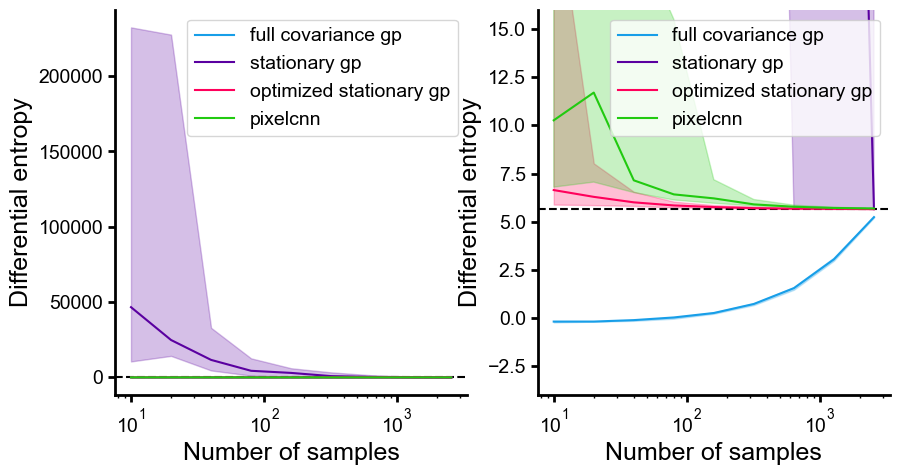

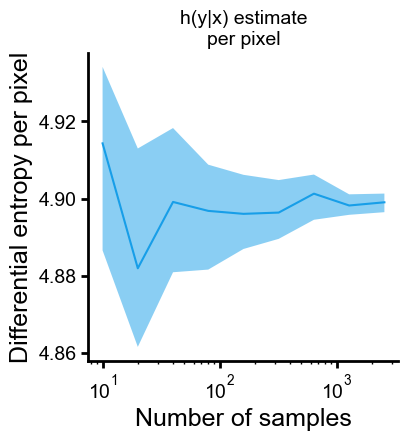

In [4]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5), sharex=True)
ax[0].axhline(h_y_analytic, color='k', linestyle='--')

colors = get_color_cycle()

ax[0].fill_between(num_samples_to_use, full_cov_h_y_estimates_conf_int[:,0], full_cov_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[0])
ax[0].semilogx(num_samples_to_use, full_cov_h_y_estimates_mean, label='full covariance gp', color=colors[0])
ax[0].fill_between(num_samples_to_use, stationary_h_y_estimates_conf_int[:,0], stationary_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[1])
ax[0].semilogx(num_samples_to_use, stationary_h_y_estimates_mean, label='stationary gp', color=colors[1])
ax[0].fill_between(num_samples_to_use, stationary_h_y_estimates_optimized_conf_int[:,0], stationary_h_y_estimates_optimized_conf_int[:,1], alpha=0.25, color=colors[2])
ax[0].semilogx(num_samples_to_use, stationary_h_y_estimates_optimized_mean, label='optimized stationary gp', color=colors[2])
ax[0].fill_between(num_samples_to_use, pixelcnn_h_y_estimates_conf_int[:,0], pixelcnn_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[3])
ax[0].semilogx(num_samples_to_use, pixelcnn_h_y_estimates_mean, label='pixelcnn', color=colors[3])

ax[0].set(xlabel='Number of samples', ylabel='Differential entropy')
ax[0].legend()
clear_spines(ax[0])

# Zoomed in
ax[1].axhline(h_y_analytic, color='k', linestyle='--')

ax[1].fill_between(num_samples_to_use, full_cov_h_y_estimates_conf_int[:,0], full_cov_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[0])
ax[1].semilogx(num_samples_to_use, full_cov_h_y_estimates_mean, label='full covariance gp', color=colors[0])
ax[1].fill_between(num_samples_to_use, stationary_h_y_estimates_conf_int[:,0], stationary_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[1])
ax[1].semilogx(num_samples_to_use, stationary_h_y_estimates_mean, label='stationary gp', color=colors[1])
ax[1].fill_between(num_samples_to_use, stationary_h_y_estimates_optimized_conf_int[:,0], stationary_h_y_estimates_optimized_conf_int[:,1], alpha=0.25, color=colors[2])
ax[1].semilogx(num_samples_to_use, stationary_h_y_estimates_optimized_mean, label='optimized stationary gp', color=colors[2])
ax[1].fill_between(num_samples_to_use, pixelcnn_h_y_estimates_conf_int[:,0], pixelcnn_h_y_estimates_conf_int[:,1], alpha=0.25, color=colors[3])
ax[1].semilogx(num_samples_to_use, pixelcnn_h_y_estimates_mean, label='pixelcnn', color=colors[3])

ax[1].set(xlabel='Number of samples', ylabel='Differential entropy')
ax[1].legend()
clear_spines(ax[1])
ax[1].set(ylim=(-4, 16))

fig.savefig('/home/hpinkard_waller/figures/mi_estimation/' + 'entropy_estimation_consistency' + '.pdf', transparent=True)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.fill_between(num_samples_to_use, h_y_given_x_estimates_conf_int[:, 0], h_y_given_x_estimates_conf_int[:, 1], alpha=0.5)
ax.semilogx(num_samples_to_use, h_y_given_x_estimates_mean)
ax.set(xlabel='Number of samples', title='h(y|x) estimate\nper pixel', ylabel='Differential entropy per pixel')
clear_spines(ax)


fig.savefig('/home/hpinkard_waller/figures/mi_estimation/' + 'conditional_entropy_consistency' + '.pdf', transparent=True)